# GO and pathway analysis of eight catgories of data
<font color='red'> Below is the table of all eight comparisons.

|TGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|

## <font color='blue'> R library load

In [1]:
#install.packages("xlsx", repos = "http://cran.us.r-project.org")
suppressMessages(suppressWarnings(library(readxl)))
#suppressMessages(suppressWarnings(library(xlsx)))
suppressMessages(suppressWarnings(library("openxlsx")))

## <font color='blue'> Global parameters

In [2]:
th_adj_pvalue <- 0.05
th_log2fc <- log2(1.2)

In [3]:
#results <- read_xlsx("./xlsx/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna_protein_coding.xlsx", sheet = "all", rownames=TRUE)
results <- read.xlsx("./xlsx/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna_protein_coding.xlsx", sheet = "all", rowNames = TRUE)

In [4]:
dim(results)
head(results)

[1] 11452    27

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,tgfb.translation,tgfbCX5461.translation,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.7361927,-1.77777696,-1.52337076,-0.04158431,...,-0.5623582,0.4593551,-0.4414281,0.30541555,1.02171324,0.02919136,notSig,up,notSig,protein_coding
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.18299550,-0.57995446,0.36131693,...,-1.1130376,-1.8999308,0.3259794,0.64123254,-0.78689319,0.41800085,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.0822802,-1.73978964,-1.85796767,-0.65750941,...,-2.1409318,-0.6268219,-1.4347083,0.05167993,1.51410985,0.07704533,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.1094487,0.09824498,0.09778162,-0.01120375,...,-0.2992177,-0.2840107,-0.5530121,0.13823240,0.01520704,0.98121037,notSig,notSig,notSig,protein_coding
0610030E20Rik,6,72324300,72330131,5832,+,ensembl_havana,-0.7066802,-0.89024066,-0.91363548,-0.18356050,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,protein_coding
0610040J01Rik,5,63969706,64056968,87263,+,ensembl_havana,-1.1236084,-4.73941679,-3.70502147,-3.61580842,...,-3.6173387,-3.7617905,-0.9502349,0.49047068,-0.14445185,0.95563779,notSig,notSig,notSig,protein_coding


In [5]:
colnames(results)

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "log2FCtgfbVStgfbCX5461.transcription"
[13] "FDRtgfbVStgfbCX5461.transcription"   
[14] "unt.tgfb.DEtranscription"            
[15] "tgfb.tgfbCX5461.DEtranscription"     
[16] "reversible.transcription"            
[17] "unt.translation"                     
[18] "tgfb.translation"                    
[19] "tgfbCX5461.translation"              
[20] "log2FCuntVStgfb.translation"         
[21] "FDRuntVStgfb.translation"            
[22] "log2FCtgfbVStgfbCX5461.translation"  
[23] "FDRtgfbVStgfbCX5461.translation"     
[24] "unt.tgfb.DEtranslation"              
[25] "tgfb.tgfbCX5461.DEtranslation"       
[26] "reversible.translation"              
[27] "biotype"

In [6]:
results.selected <- results[,c('unt.tgfb.DEtranscription','tgfb.tgfbCX5461.DEtranscription','reversible.transcription', 'unt.tgfb.DEtranslation','tgfb.tgfbCX5461.DEtranslation','reversible.translation')]
results.score <- results[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription', 'log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription', 'log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation', 'log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
head(results.score)
dim((results.score))

,log2FCuntVStgfb.transcription,FDRuntVStgfb.transcription,log2FCtgfbVStgfbCX5461.transcription,FDRtgfbVStgfbCX5461.transcription,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik,-0.04158431,8.658629e-01,0.254406206,0.47845885,-0.4414281,0.30541555,1.02171324,0.02919136
0610010F05Rik,0.36131693,8.558582e-03,-0.396958965,0.04148518,0.3259794,0.64123254,-0.78689319,0.41800085
0610010K14Rik,-0.65750941,1.465000e-03,-0.118178034,0.79854067,-1.4347083,0.05167993,1.51410985,0.07704533
0610012G03Rik,-0.01120375,9.284910e-01,-0.000463367,0.99821843,-0.5530121,0.13823240,0.01520704,0.98121037
0610030E20Rik,-0.18356050,2.586286e-01,-0.023394823,0.94973859,NA,NA,NA,NA
0610040J01Rik,-3.61580842,1.100000e-10,1.034395317,0.16393562,-0.9502349,0.49047068,-0.14445185,0.95563779


[1] 11452     8

# <font color='blue'>Gene differentially expressed in transcription
<b>WTG</b>= Whole Transcriptome Group <br>

## <font color='green'> Contol Vs TGFB Transcription

#### Control Vs TGFB Transcription Up (CtrVsTGFbTranscriptionUp)

In [7]:
results.score.up <- results.score[(results.score$log2FCuntVStgfb.transcription >= th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionUp <- rownames(na.omit(results.score.up))
length(CtrVsTGFbTranscriptionUp)

[1] 3158

#### Control Vs TGFB Transcription Down (CtrVsTGFbTranscriptionDn)

In [8]:
results.score.dn <- results.score[(results.score$log2FCuntVStgfb.transcription <= -th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionDn <- rownames(na.omit(results.score.dn))
length(CtrVsTGFbTranscriptionDn) 

[1] 3127

#### Control Vs TGFB Transcription Un-changed (CtrVsTGFbTranscriptionUn)

In [9]:
results.score.un <- results.score[(abs(results.score$log2FCuntVStgfb.transcription) < th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionUn <- rownames(na.omit(results.score.un))
length(CtrVsTGFbTranscriptionUn)

[1] 763

## TGFB Vs CX5461 Transcription

#### TGFB Vs  CX5461 Transcription Up (TGFbVsCX5461TranscriptionUp)

In [10]:
results.score.up <- results.score[(results.score$log2FCtgfbVStgfbCX5461.transcription >= th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionUp <- rownames(na.omit(results.score.up))
length(TGFbVsCX5461TranscriptionUp)

[1] 511

#### TGFB Vs  CX5461 Transcription Down (TGFbVsCX5461TranscriptionDn)

In [11]:
results.score.dn <- results.score[(results.score$log2FCtgfbVStgfbCX5461.transcription < -th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionDn <- rownames(na.omit(results.score.dn))
length(TGFbVsCX5461TranscriptionDn)

[1] 538

#### TGFB Vs  CX5461 Transcription Un-changed (TGFbVsCX5461TranscriptionUn)

In [12]:
results.score.un <- results.score[(abs(results.score$log2FCtgfbVStgfbCX5461.transcription) < th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionUn <- rownames(na.omit(results.score.un))
length(TGFbVsCX5461TranscriptionUn)

[1] 398

# <font color='blue'> Gene differentially expressed in translation
<b>RPG</b>= Ribosome Profiling Group

## <font color='green'> Contol Vs TGFB Translation

#### Control Vs TGFB Translation Up (CtrVsTGFbTranslationUp)

In [13]:
results.score.up <- results.score[(results.score$log2FCuntVStgfb.translation >= th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationUp <- rownames(na.omit(results.score.up))
length(CtrVsTGFbTranslationUp)

[1] 1138

#### Control Vs TGFB Translation Down (CtrVsTGFbTranslationDn)

In [14]:
results.score.dn <- results.score[(results.score$log2FCuntVStgfb.translation < -th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationDn <- rownames(na.omit(results.score.dn))
length(CtrVsTGFbTranslationDn)

[1] 1113

#### Control Vs TGFB Translation Un-changed (CtrVsTGFbTranslationUn)

In [15]:
results.score.un <- results.score[(abs(results.score$log2FCuntVStgfb.translation) < th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationUn <- rownames(na.omit(results.score.un))
length(CtrVsTGFbTranslationUn)

[1] 13

## TGFB Vs CX5461 Translation

#### TGFB Vs CX5461 Translation Up (TGFbVsCX5461TranslationUp)

In [16]:
results.score.up <- results.score[(results.score$log2FCtgfbVStgfbCX5461.translation >= th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationUp <- rownames(na.omit(results.score.up))
length(TGFbVsCX5461TranslationUp)

[1] 658

#### TGFB Vs CX5461 Translation Down (TGFbVsCX5461TranslationDn)

In [17]:
results.score.dn <- results.score[(results.score$log2FCtgfbVStgfbCX5461.translation <= -th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationDn <- rownames(na.omit(results.score.dn))
length(TGFbVsCX5461TranslationDn)

[1] 530

#### TGFB Vs CX5461 Translation Un-changed (TGFbVsCX5461TranslationUn)

In [18]:
results.score.un <- results.score[(abs(results.score$log2FCtgfbVStgfbCX5461.translation) < th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationUn <- rownames(na.omit(results.score.un))
length(TGFbVsCX5461TranslationUn)

[1] 7

# <font color='green'> GO and Pathway analysis

<b> GO and pathways analysis in these eight comparisons.</b><br>
**TGs** =*Transcriptomics/translation groups.*

|TGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|


In [19]:
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(clusterProfiler)))
suppressMessages(suppressWarnings(library(DOSE)))
suppressMessages(suppressWarnings(library(msigdbr)))
suppressMessages(suppressWarnings(library(enrichplot)))
suppressMessages(suppressWarnings(library(org.Mm.eg.db)))

suppressMessages(suppressWarnings(source("./jupyter_common.R")))

# <font color='blue'>Group wise cpmarisons (total eight comparisons) for the RNAseq data

### Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TGS1)

In [20]:
condstr <- "TGS1"
TGS1 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: %d\n", length(TGS1))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: 254


In [21]:
gmt_mus.bp <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.cc <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:CC") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.mf <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:MF") %>% 
  dplyr::select(gs_name, gene_symbol)

set.seed(40)
em.bp <- enricher(TGS1, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS1, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS1, TERM2GENE=gmt_mus.mf, minGSSize = 5)

head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_TISSUE_MIGRATION,GOBP_TISSUE_MIGRATION,GOBP_TISSUE_MIGRATION,18/226,340/16223,1.377234e-06,0.003803921,0.003334357,Acta1/Bcar1/Card10/Dusp10/Edn1/Flt4/Grn/Hmox1/Hyal1/Lgmn/Map2k3/Pkn1/Plk2/Ppm1f/Ptp4a3/Ptpn23/Rras/Wnt7a,18
GOBP_POSITIVE_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,GOBP_POSITIVE_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,GOBP_POSITIVE_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,12/226,165/16223,3.457894e-06,0.004775351,0.004185871,Bcar1/Edn1/Flt4/Grn/Hmox1/Hyal1/Lgmn/Map2k3/Plk2/Ppm1f/Rras/Wnt7a,12
GOBP_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,GOBP_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,GOBP_REGULATION_OF_EPITHELIAL_CELL_MIGRATION,15/226,270/16223,5.995304e-06,0.005188603,0.004548111,Bcar1/Card10/Dusp10/Edn1/Flt4/Grn/Hmox1/Hyal1/Lgmn/Map2k3/Plk2/Ppm1f/Ptpn23/Rras/Wnt7a,15
GOBP_POSITIVE_REGULATION_OF_ENDOTHELIAL_CELL_MIGRATION,GOBP_POSITIVE_REGULATION_OF_ENDOTHELIAL_CELL_MIGRATION,GOBP_POSITIVE_REGULATION_OF_ENDOTHELIAL_CELL_MIGRATION,10/226,122/16223,7.973353e-06,0.005188603,0.004548111,Bcar1/Edn1/Flt4/Grn/Hmox1/Lgmn/Map2k3/Plk2/Rras/Wnt7a,10
GOBP_TRANSFERRIN_TRANSPORT,GOBP_TRANSFERRIN_TRANSPORT,GOBP_TRANSFERRIN_TRANSPORT,6/226,36/16223,9.392837e-06,0.005188603,0.004548111,Atp6ap1/Atp6v0b/Atp6v0d1/Atp6v0e/Mcoln1/Tfr2,6
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,19/226,447/16223,1.676289e-05,0.007716517,0.006763973,Bcar1/Card10/Dusp10/Edn1/Flt4/Grn/Hmox1/Hyal1/Hyal2/Lgmn/Map2k3/Pip5k1a/Pkn1/Plk2/Ppm1f/Ptp4a3/Ptpn23/Rras/Wnt7a,19


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_LYSOSOMAL_LUMEN,GOCC_LYSOSOMAL_LUMEN,GOCC_LYSOSOMAL_LUMEN,11/188,94/13139,9.443369e-08,2.672473e-05,2.395634e-05,Ctsa/Ctsd/Gla/Hspg2/Hyal1/Lgmn/Man2b2/Plbd2/Pld3/Tcn2/Tpp1,11
GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,22/188,428/13139,2.043714e-07,2.891855e-05,2.592289e-05,Ap5b1/Arl8a/Atg9b/Atp6v0b/Atp6v0d1/Clcn7/Ctsa/Ctsd/Flcn/Glipr1/Glmp/Gpr137/Grn/Man2b2/Mcoln1/Mfsd12/Napa/Pld3/Slc35f6/Tmbim1/Tom1/Wdr81,22
GOCC_VACUOLAR_LUMEN,GOCC_VACUOLAR_LUMEN,GOCC_VACUOLAR_LUMEN,13/188,185/13139,2.523714e-06,2.380704e-04,2.134088e-04,Ctsa/Ctsd/Dpp7/Gla/Grn/Hspg2/Hyal1/Lgmn/Man2b2/Plbd2/Pld3/Tcn2/Tpp1,13
GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,19/188,420/13139,9.351581e-06,6.616243e-04,5.930871e-04,Aif1l/Arl2/Bcar1/Cd81/Csrp1/Fat1/Flnb/Flnc/Gsn/Hspg2/Lims2/Nectin2/Pip5k1a/Plec/Rras/Shroom4/Slc4a2/Tgm2/Vcl,19
GOCC_PHAGOPHORE_ASSEMBLY_SITE,GOCC_PHAGOPHORE_ASSEMBLY_SITE,GOCC_PHAGOPHORE_ASSEMBLY_SITE,5/188,31/13139,7.142126e-05,4.042443e-03,3.623689e-03,Atg2a/Atg7/Atg9b/Sqstm1/Wdr45,5
GOCC_COSTAMERE,GOCC_COSTAMERE,GOCC_COSTAMERE,4/188,18/13139,1.061738e-04,5.007864e-03,4.489103e-03,Ahnak2/Flnc/Plec/Vcl,4


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_PROTEIN_TYROSINE_SERINE_THREONINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_SERINE_THREONINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_SERINE_THREONINE_PHOSPHATASE_ACTIVITY,6/203,43/14695,2.570063e-05,0.01133398,0.01017204,Dusp1/Dusp10/Dusp4/Ppm1f/Ptp4a3/Ssh3,6
GOMF_CYTOKINE_ACTIVITY,GOMF_CYTOKINE_ACTIVITY,GOMF_CYTOKINE_ACTIVITY,11/203,211/14695,1.707818e-04,0.03765739,0.03379682,Bmp1/Ccl2/Ccl7/Clcf1/Csf1/Cxcl16/Edn1/Grn/Lif/Wnt7a/Wnt7b,11
GOMF_PROTEIN_TYROSINE_THREONINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_THREONINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_THREONINE_PHOSPHATASE_ACTIVITY,3/203,10/14695,2.901797e-04,0.04265641,0.03828336,Dusp1/Dusp10/Dusp4,3
GOMF_PROTEIN_TYROSINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_PHOSPHATASE_ACTIVITY,GOMF_PROTEIN_TYROSINE_PHOSPHATASE_ACTIVITY,7/203,99/14695,4.406113e-04,0.04857739,0.04359733,Dusp1/Dusp10/Dusp4/Ptp4a3/Ptpn14/Ptpn23/Ssh3,7


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(TGS1, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"0.79% of input gene IDs are fail to map..."
Reading KEGG annotation online:


Reading KEGG annotation online:




[1] 17  9

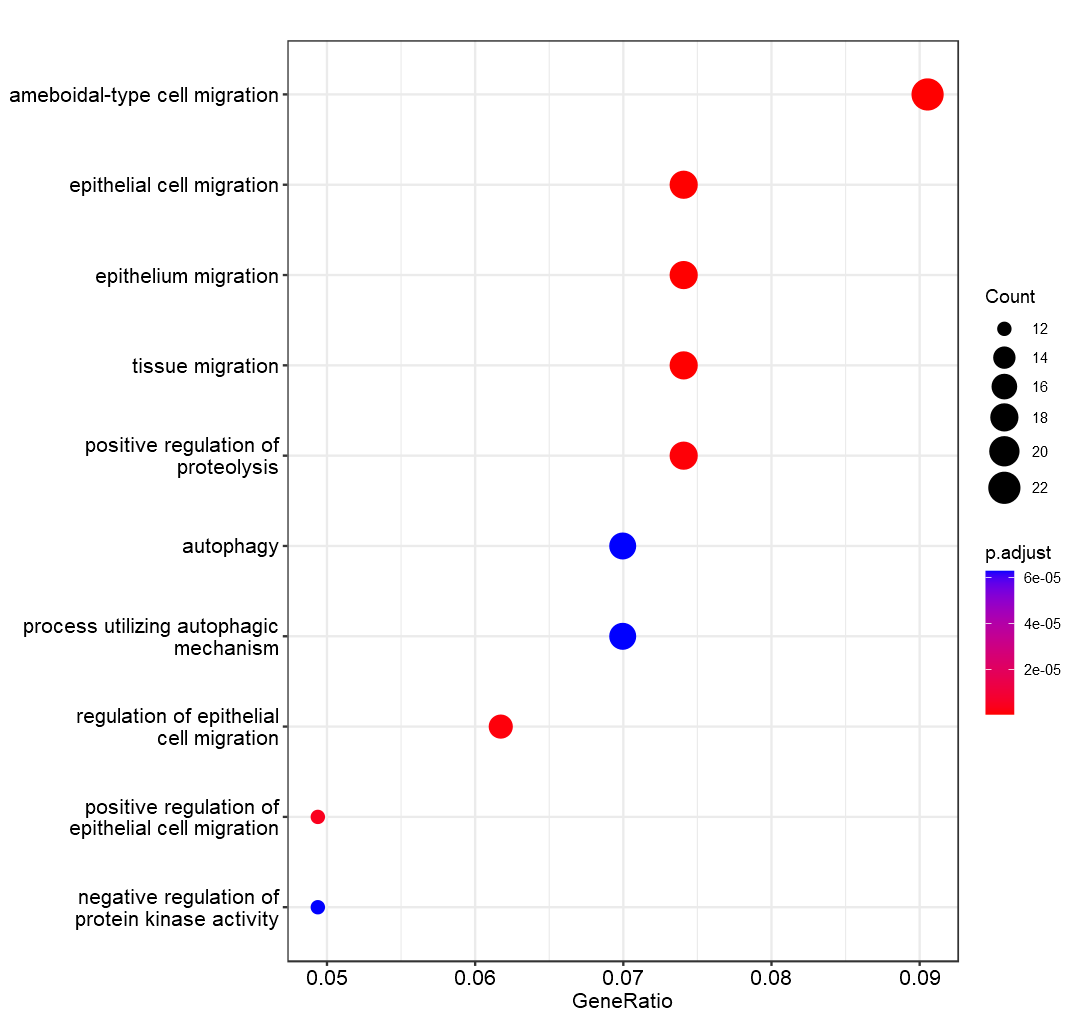

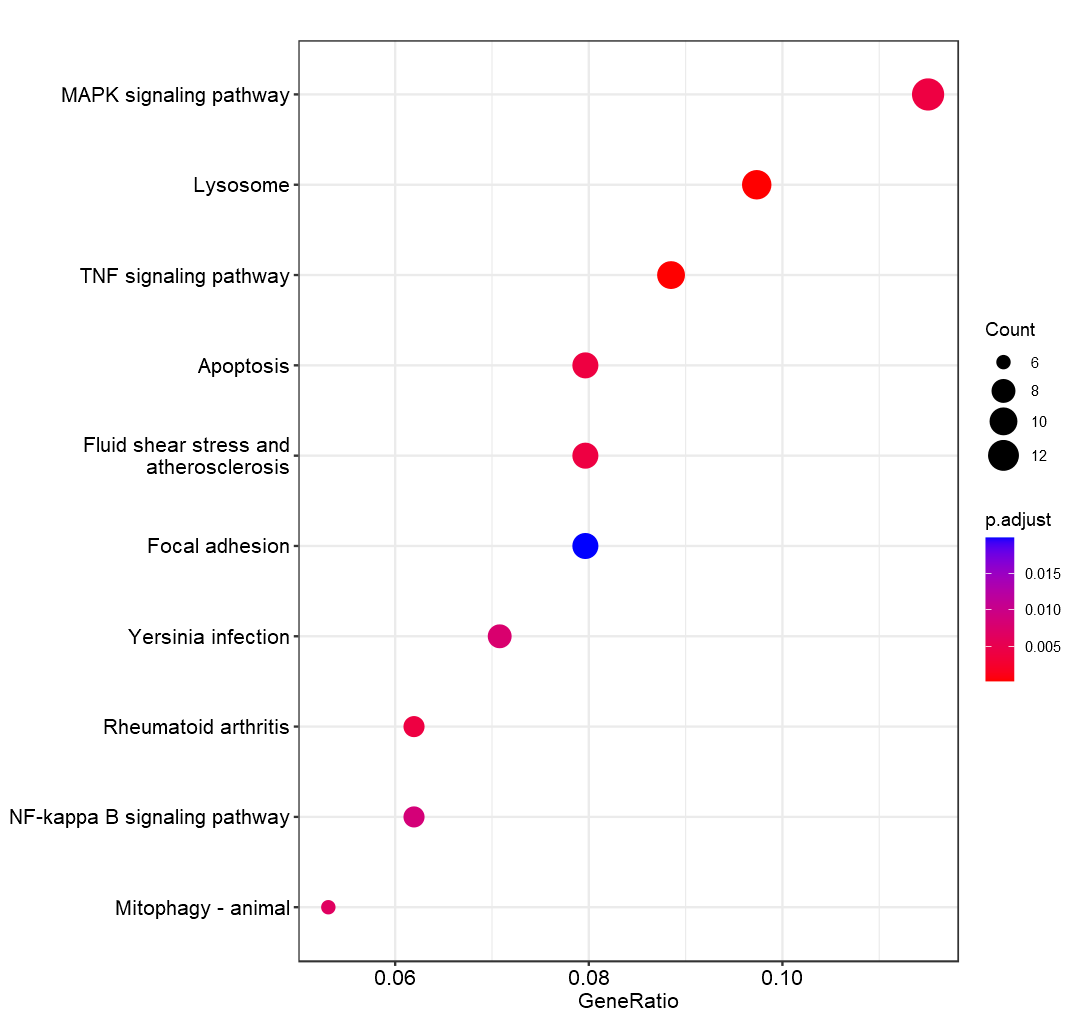

In [22]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TGS1, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS1 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS1, width=9, height=8.5,
    file=sprintf("TGS1.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS1.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Up.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TGS2)

In [23]:
condstr <- "TGS2"
TGS2 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: %d\n", length(TGS2))
set.seed(40)
em.bp <- enricher(TGS2, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS2, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS2, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: 120


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,10/98,309/13139,0.0001006147,0.02082725,0.02001704,Adam10/Ckap4/Col1a1/Dnajc3/Erap1/Hspa5/Ktn1/Pdgfc/Pdia6/Spp1,10


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS2, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"0.83% of input gene IDs are fail to map..."


[1] 1 9

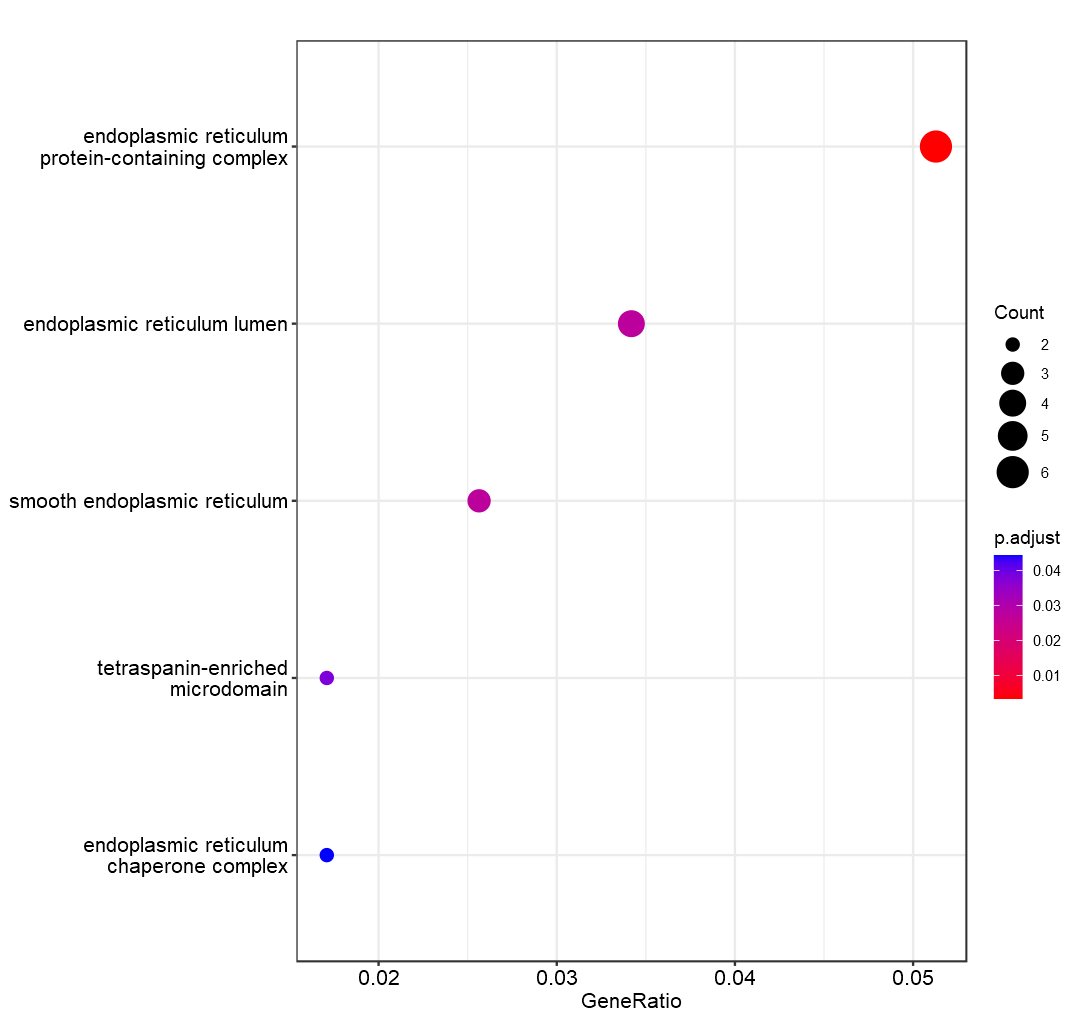

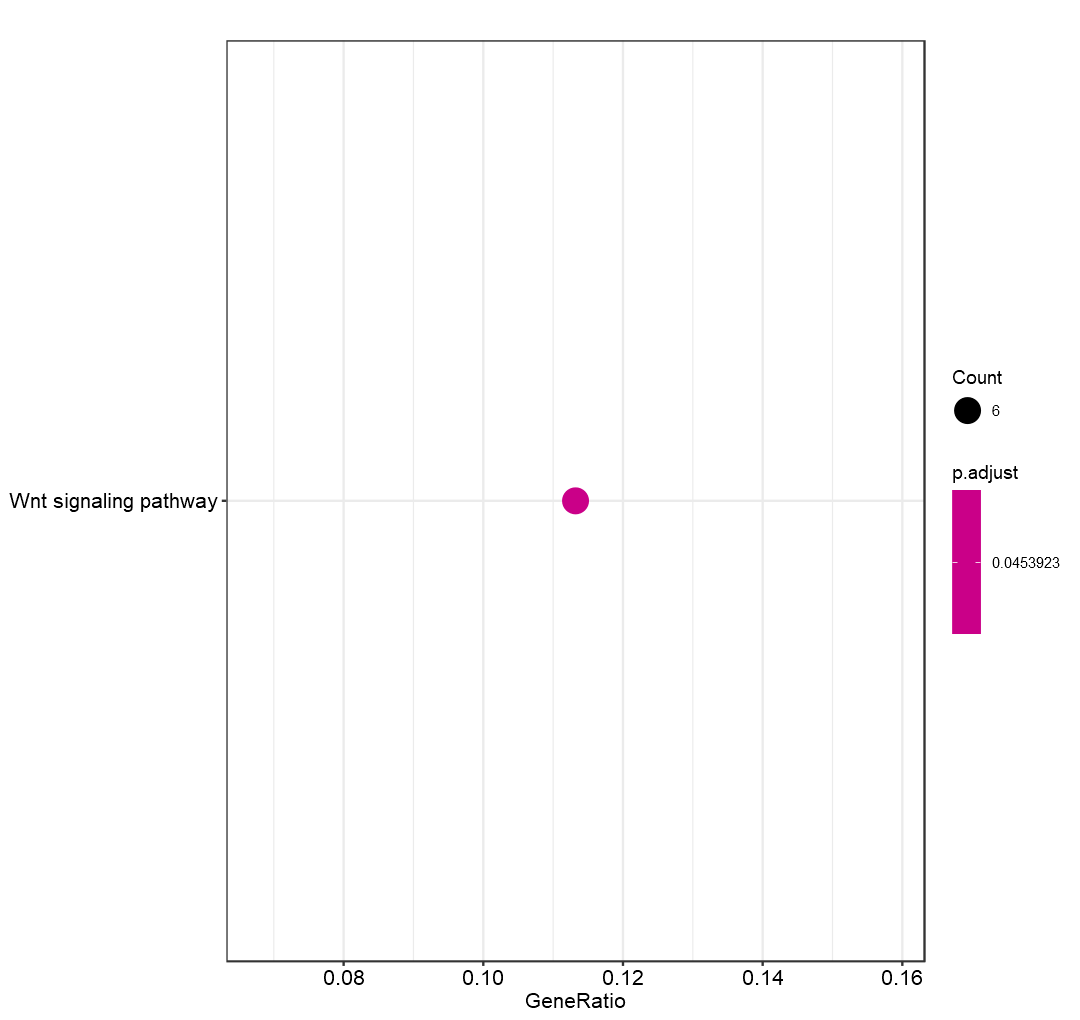

In [24]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS2, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS2 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS2, width=9, height=8.5,
    file=sprintf("TGS2.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS2.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Dn.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TGS3)

In [25]:
condstr <- "TGS3"
TGS3 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: %d\n", length(TGS3))

set.seed(40)
em.bp <- enricher(TGS3, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS3, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS3, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: 196


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_PLATELET_DEGRANULATION,GOBP_PLATELET_DEGRANULATION,GOBP_PLATELET_DEGRANULATION,14/185,129/16223,2.385976e-10,6.606766e-07,5.723830e-07,Actn1/Actn4/Cd63/Clu/Flna/Fn1/Itgb3/Pdgfb/Psap/Tagln2/Thbs1/Timp1/Tln1/Tmsb4x,14
GOBP_CELL_SUBSTRATE_ADHESION,GOBP_CELL_SUBSTRATE_ADHESION,GOBP_CELL_SUBSTRATE_ADHESION,21/185,355/16223,7.221642e-10,9.998364e-07,8.662170e-07,Actn1/Actn4/Atrn/Ccn2/Cd63/Coro1c/Dag1/Dnm2/Flna/Fn1/Ilk/Itga5/Itgb3/P4hb/Pdgfb/Pkd1/Src/Srf/Stk4/Thbs1/Zyx,21
GOBP_ACTIN_FILAMENT_ORGANIZATION,GOBP_ACTIN_FILAMENT_ORGANIZATION,GOBP_ACTIN_FILAMENT_ORGANIZATION,21/185,428/16223,1.984929e-08,1.832090e-05,1.587247e-05,Actn1/Capg/Capzb/Ccn2/Coro1b/Coro1c/Dstn/Flii/Flna/Gas2l1/Hip1/Inppl1/Mical2/Pawr/Plekhg2/Prkci/Src/Srf/Tmsb4x/Tpm1/Zyx,21
GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,11/185,105/16223,3.093260e-08,2.141310e-05,1.855142e-05,Ccn2/Cd63/Flna/Fn1/Ilk/Itga5/Itgb3/Src/Timp1/Tln1/Zyx,11
GOBP_REGULATION_OF_RECEPTOR_MEDIATED_ENDOCYTOSIS,GOBP_REGULATION_OF_RECEPTOR_MEDIATED_ENDOCYTOSIS,GOBP_REGULATION_OF_RECEPTOR_MEDIATED_ENDOCYTOSIS,10/185,106/16223,3.603646e-07,1.683412e-04,1.458439e-04,Abca2/Ap2a1/B2m/Cbl/Cd63/Clu/Dnm2/Hip1/Itgb3/Tnk2,10
GOBP_REGULATION_OF_CELL_MORPHOGENESIS,GOBP_REGULATION_OF_CELL_MORPHOGENESIS,GOBP_REGULATION_OF_CELL_MORPHOGENESIS,16/185,301/16223,3.647697e-07,1.683412e-04,1.458439e-04,Actn4/Capzb/Coro1b/Coro1c/Dag1/Dnm2/Eef2k/Flna/Fn1/Ilk/Mov10/P4hb/Plxna1/Smurf1/Src/Tpm1,16


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_ACTIN_CYTOSKELETON,GOCC_ACTIN_CYTOSKELETON,GOCC_ACTIN_CYTOSKELETON,25/163,492/13139,1.806971e-09,3.342048e-07,2.619280e-07,Actn1/Actn4/Cap1/Capg/Capzb/Cnn2/Coro1b/Coro1c/Dstn/Flii/Flna/Gabarap/Gas2l1/Ilk/Myl12a/Myo9b/Palld/Pawr/Sipa1l1/Smtn/Src/Tmem63b/Tpm1/Vps18/Zyx,25
GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,23/163,420/13139,2.082273e-09,3.342048e-07,2.619280e-07,Actn1/Actn4/Atp6v0c/B2m/Cap1/Cbl/Cnn2/Coro1b/Coro1c/Dag1/Dnm2/Fhl2/Flii/Flna/Ilk/Itga5/Itgb3/P4hb/Palld/Plaur/Src/Tln1/Zyx,23
GOCC_VESICLE_LUMEN,GOCC_VESICLE_LUMEN,GOCC_VESICLE_LUMEN,20/163,347/13139,1.086254e-08,1.162291e-06,9.109285e-07,Actn1/Actn4/Arsa/B2m/Bace1/Cap1/Clu/Cnn2/Cstb/Fn1/Glb1/Gns/Neu1/Pdgfb/S100a11/Thbs1/Timp1/Tmsb4x/Txndc5/Vat1,20
GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,18/163,309/13139,5.286364e-08,4.242307e-06,3.324844e-06,Arsa/B2m/Bace1/Calu/Clu/Col18a1/Col4a2/Dag1/Fn1/Mfge8/P4hb/Pdgfb/Pdia4/Plaur/Prss23/Thbs1/Timp1/Txndc5,18
GOCC_ACTIN_FILAMENT,GOCC_ACTIN_FILAMENT,GOCC_ACTIN_FILAMENT,11/163,112/13139,1.361638e-07,8.741717e-06,6.851190e-06,Actn1/Coro1b/Flna/Gas2l1/Myo9b/Palld/Pawr/Smtn/Src/Tpm1/Vps18,11
GOCC_ACTIN_FILAMENT_BUNDLE,GOCC_ACTIN_FILAMENT_BUNDLE,GOCC_ACTIN_FILAMENT_BUNDLE,9/163,72/13139,2.433431e-07,1.301886e-05,1.020333e-05,Actn1/Actn4/Cnn2/Coro1b/Flna/Ilk/Palld/Tpm1/Zyx,9


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_ACTIN_BINDING,GOMF_ACTIN_BINDING,GOMF_ACTIN_BINDING,29/174,436/14695,3.426992e-14,1.497595e-11,1.331116e-11,Actn1/Actn4/Anxa8/Cap1/Capg/Capzb/Cnn2/Coro1b/Coro1c/Dag1/Dstn/Emd/Epb41l1/Flii/Flna/Gas2l1/Hip1/Inppl1/Mical2/Mrtfa/Myo9b/P4hb/Palld/Pawr/Smtn/Tln1/Tmsb4x/Tpm1/Vps18,29
GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,12/174,141/14695,1.101140e-07,2.312196e-05,2.055161e-05,Actn1/Actn4/Ccn2/Fn1/Itga5/Itgb3/Mfge8/Nisch/P4hb/Src/Thbs1/Tln1,12
GOMF_ACTIN_FILAMENT_BINDING,GOMF_ACTIN_FILAMENT_BINDING,GOMF_ACTIN_FILAMENT_BINDING,14/174,206/14695,1.587320e-07,2.312196e-05,2.055161e-05,Actn1/Actn4/Anxa8/Capg/Capzb/Coro1b/Coro1c/Dstn/Flii/Flna/Gas2l1/Hip1/Tln1/Tpm1,14
GOMF_CADHERIN_BINDING,GOMF_CADHERIN_BINDING,GOMF_CADHERIN_BINDING,15/174,326/14695,7.790267e-06,8.510867e-04,7.564760e-04,Capg/Capzb/Cbl/Cdh6/Cnn2/Coro1b/Ehd4/Emd/Flna/Klc2/Ppp1r13l/S100a11/Src/Tagln2/Tln1,15
GOMF_PROTEIN_DISULFIDE_ISOMERASE_ACTIVITY,GOMF_PROTEIN_DISULFIDE_ISOMERASE_ACTIVITY,GOMF_PROTEIN_DISULFIDE_ISOMERASE_ACTIVITY,4/174,19/14695,6.405585e-05,5.598482e-03,4.976128e-03,Itgb3/P4hb/Pdia4/Txndc5,4
GOMF_VINCULIN_BINDING,GOMF_VINCULIN_BINDING,GOMF_VINCULIN_BINDING,3/174,11/14695,2.510634e-04,1.751530e-02,1.556822e-02,Actn1/Dag1/Tln1,3


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS3, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"1.02% of input gene IDs are fail to map..."


[1] 18  9

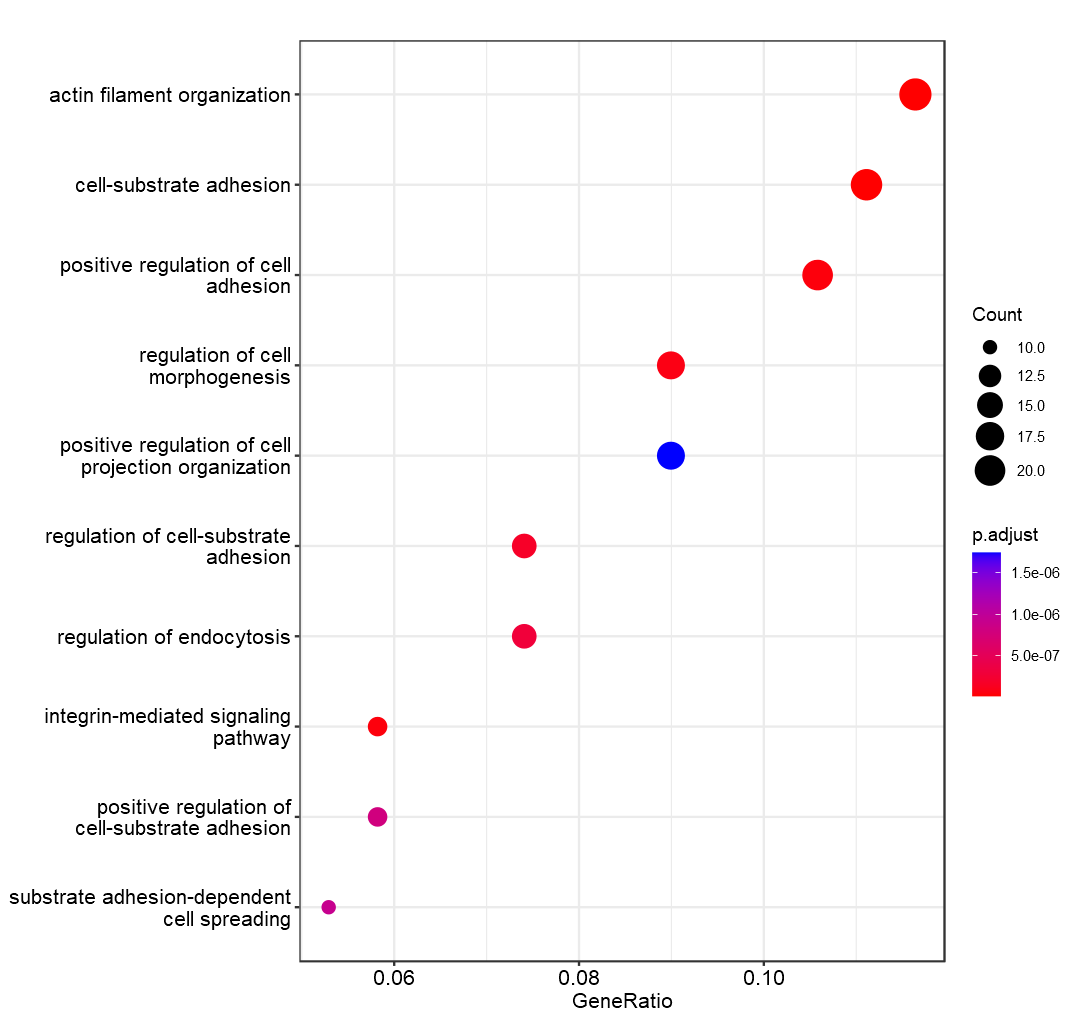

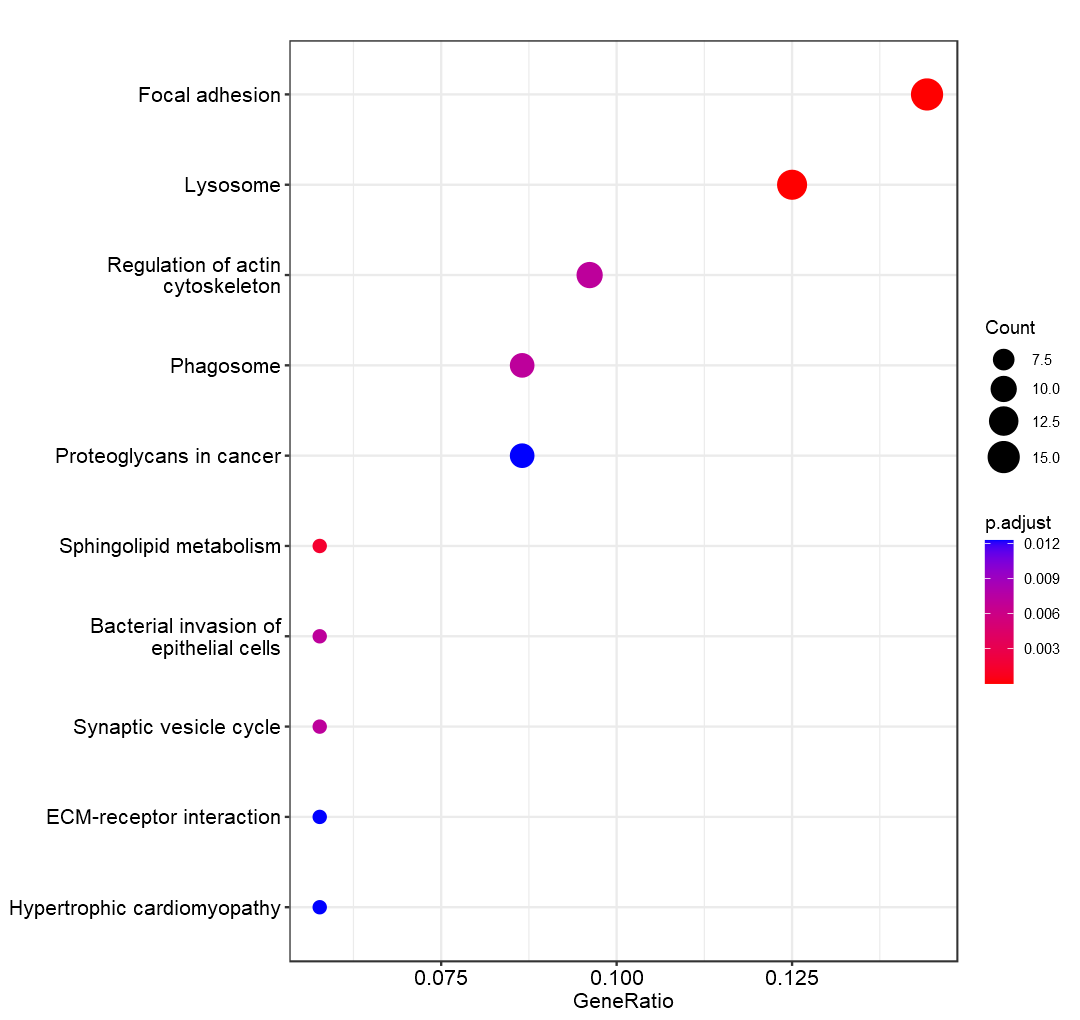

In [26]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS3, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS3 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS3, width=9, height=8.5,
    file=sprintf("TGS3.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Un.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS3.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Un.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TGS4)

In [27]:
condstr <- "TGS4"
TGS4 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: %d\n", length(TGS4))

set.seed(40)
em.bp <- enricher(TGS4, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS4, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS4, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: 136


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,GOBP_NEGATIVE_REGULATION_OF_CELL_GROWTH,10/120,184/16223,1.089183e-06,0.001355113,0.001213392,Apbb1/Bcl6/Cdhr2/Cdkn1a/G6pdx/Osgin1/Psrc1/Sema6b/Sertad3/Sesn2,10
GOBP_NEGATIVE_REGULATION_OF_GROWTH,GOBP_NEGATIVE_REGULATION_OF_GROWTH,GOBP_NEGATIVE_REGULATION_OF_GROWTH,11/120,234/16223,1.297380e-06,0.001355113,0.001213392,Apbb1/Bcl6/Cdhr2/Cdkn1a/Fgfr3/G6pdx/Osgin1/Psrc1/Sema6b/Sertad3/Sesn2,11
GOBP_GLUCOSE_METABOLIC_PROCESS,GOBP_GLUCOSE_METABOLIC_PROCESS,GOBP_GLUCOSE_METABOLIC_PROCESS,9/120,209/16223,2.502914e-05,0.015733243,0.014087815,Aldoa/Dcxr/G6pdx/Gaa/Sesn2/Slc25a1/Slc25a11/Sorbs1/Sord,9
GOBP_MONOSACCHARIDE_METABOLIC_PROCESS,GOBP_MONOSACCHARIDE_METABOLIC_PROCESS,GOBP_MONOSACCHARIDE_METABOLIC_PROCESS,10/120,268/16223,3.012588e-05,0.015733243,0.014087815,Aldoa/Dcxr/G6pdx/Gaa/Galt/Sesn2/Slc25a1/Slc25a11/Sorbs1/Sord,10
GOBP_MONOSACCHARIDE_BIOSYNTHETIC_PROCESS,GOBP_MONOSACCHARIDE_BIOSYNTHETIC_PROCESS,GOBP_MONOSACCHARIDE_BIOSYNTHETIC_PROCESS,6/120,96/16223,7.785057e-05,0.032525970,0.029124310,Aldoa/G6pdx/Sesn2/Slc25a1/Slc25a11/Sord,6


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS4, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"0.74% of input gene IDs are fail to map..."


[1] 2 9

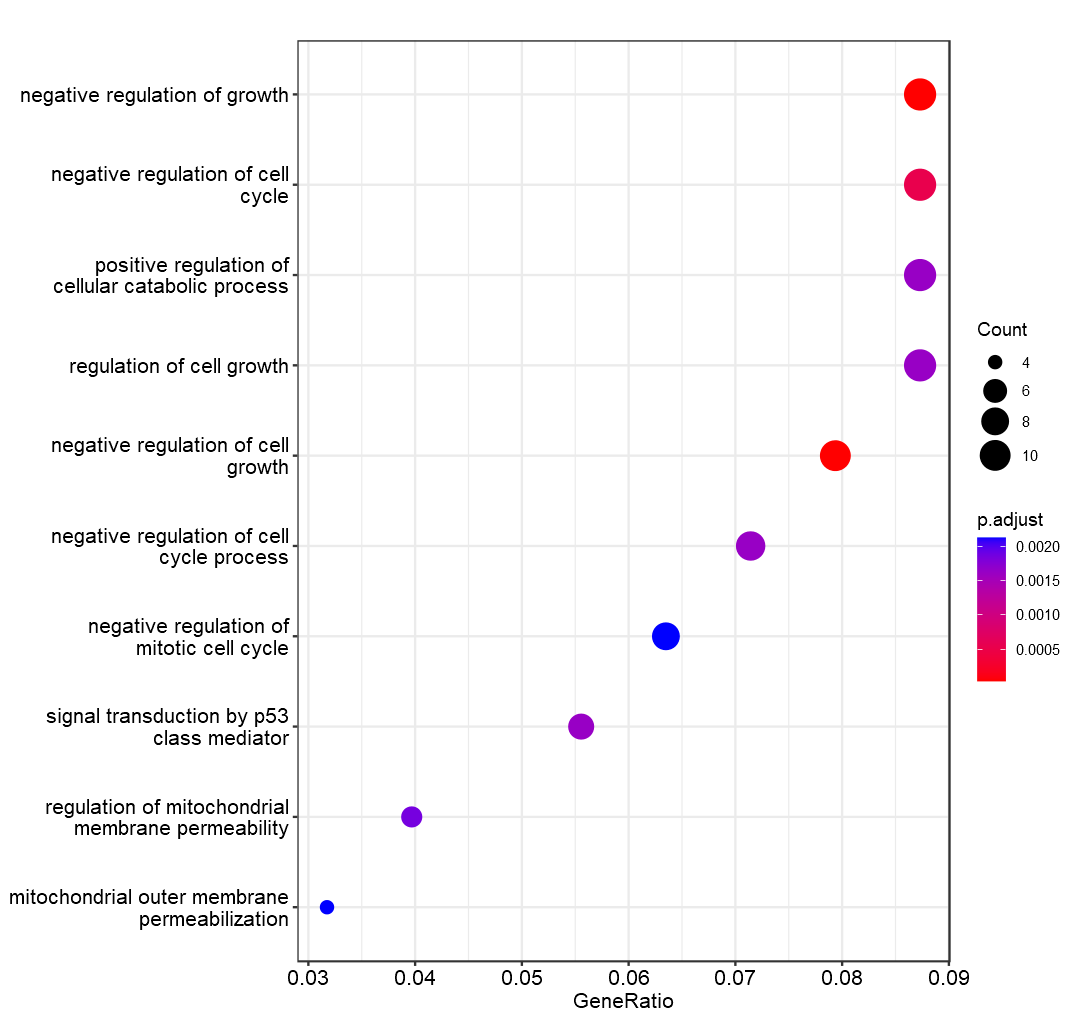

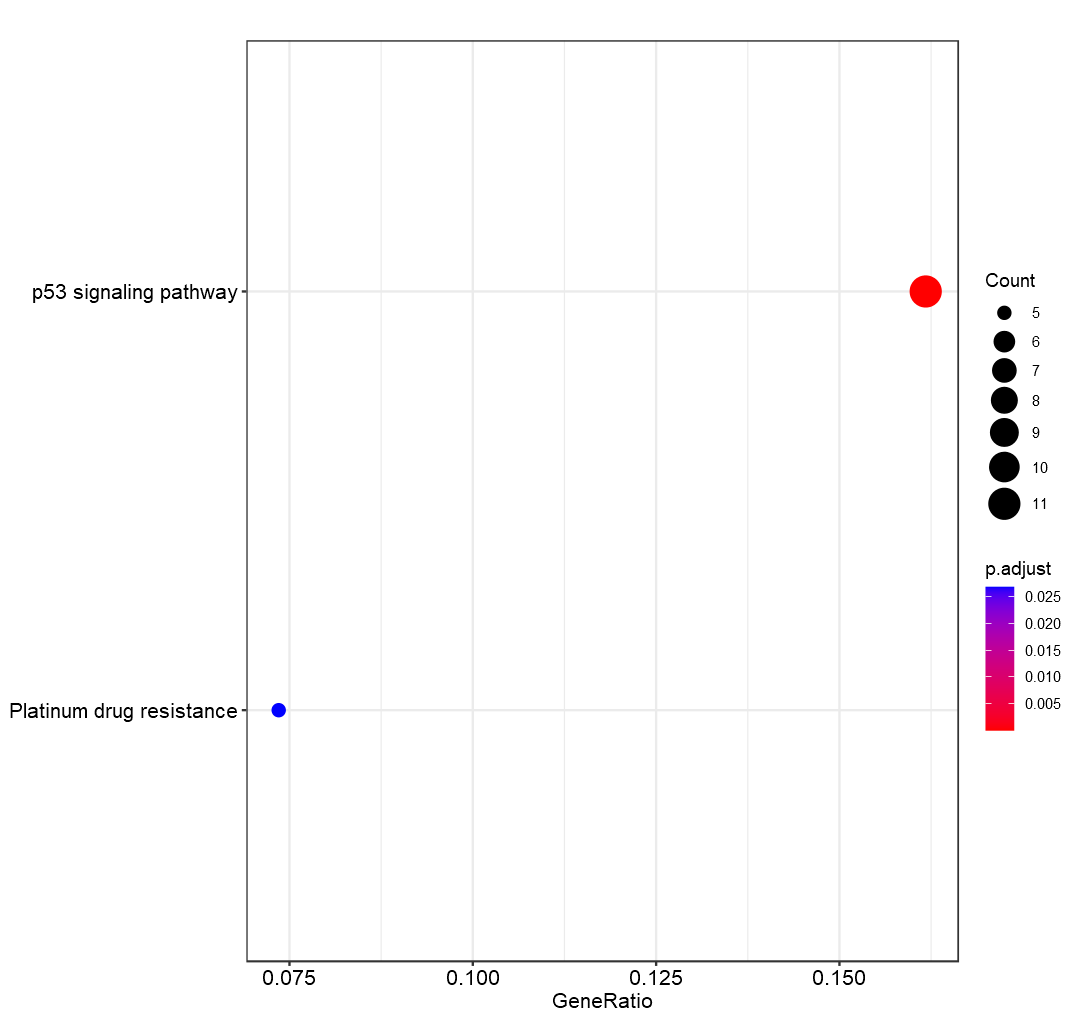

In [28]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS4, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS4 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS4, width=9, height=8.5,
    file=sprintf("TGS4.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS4.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Up.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TGS5)

In [29]:
condstr <- "TGS5"
TGS5 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: %d\n", length(TGS5))

set.seed(40)
em.bp <- enricher(TGS5, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS5, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS5, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: 287


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,72/272,325/16223,5.542601e-61,1.236000e-57,1.022172e-57,Anp32b/Asf1b/Ccnb1/Cenpi/Cenpm/Chaf1b/Chd2/Ctcf/Dhx9/Dna2/Dnmt1/Ercc6l/H1f0/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hmga1/Hmgb1/Hmgb2/Hmgb3/Hnrnpa2b1/Incenp/Knl1/Mcm3/Mcm4/Mcm5/Mcm6/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Nusap1/Parp1/Rad54l/Smc2/Smc4,72
GOBP_DNA_PACKAGING,GOBP_DNA_PACKAGING,GOBP_DNA_PACKAGING,60/272,215/16223,4.400536e-57,4.906598e-54,4.057758e-54,Anp32b/Asf1b/Ccnb1/Cenpi/Cenpm/Chaf1b/Ctcf/Dnmt1/H1f0/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hmga1/Hmgb1/Hmgb2/Incenp/Knl1/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Nusap1/Smc2/Smc4,60
GOBP_NUCLEOSOME_ASSEMBLY,GOBP_NUCLEOSOME_ASSEMBLY,GOBP_NUCLEOSOME_ASSEMBLY,46/272,122/16223,1.323692e-50,9.839444e-48,8.137223e-48,Anp32b/Asf1b/Cenpi/Cenpm/Chaf1b/H1f0/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hmgb2/Knl1,46
GOBP_NEGATIVE_REGULATION_OF_GENE_EXPRESSION_EPIGENETIC,GOBP_NEGATIVE_REGULATION_OF_GENE_EXPRESSION_EPIGENETIC,GOBP_NEGATIVE_REGULATION_OF_GENE_EXPRESSION_EPIGENETIC,45/272,119/16223,1.429780e-49,7.971021e-47,6.592036e-47,Atad2/Cdc45/Dnmt1/Ezh2/H1f0/H1f1/H1f3/H1f4/H1f5/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hmga1/Hmgb1/Suz12,45
GOBP_PROTEIN_DNA_COMPLEX_SUBUNIT_ORGANIZATION,GOBP_PROTEIN_DNA_COMPLEX_SUBUNIT_ORGANIZATION,GOBP_PROTEIN_DNA_COMPLEX_SUBUNIT_ORGANIZATION,58/272,256/16223,2.219403e-49,9.898538e-47,8.186093e-47,Anp32b/Anp32e/Asf1b/Cdc45/Cenpe/Cenpf/Cenpi/Cenpm/Chaf1b/Ctcf/H1f0/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hmga1/Hmgb1/Hmgb2/Knl1/Mcm3/Mcm4/Mcm5/Mcm6/Parp1,58
GOBP_NUCLEOSOME_ORGANIZATION,GOBP_NUCLEOSOME_ORGANIZATION,GOBP_NUCLEOSOME_ORGANIZATION,49/272,160/16223,1.032339e-48,3.836859e-46,3.173083e-46,Anp32b/Anp32e/Asf1b/Cenpi/Cenpm/Chaf1b/Ctcf/H1f0/H1f1/H1f3/H1f4/H1f5/H2ax/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hmga1/Hmgb2/Knl1,49


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,56/253,101/13139,7.548161e-71,1.985166e-68,1.461960e-68,H1f0/H1f1/H1f3/H1f4/H1f5/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Smc2/Smc4,56
GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,59/253,191/13139,7.617400e-56,1.001688e-53,7.376850e-54,Cdc45/Donson/H1f0/H1f1/H1f3/H1f4/H1f5/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Mcm3/Mcm4/Mcm5/Mcm6/Parp1/Pcna/Pola1/Prim1,59
GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,68/253,341/13139,1.407144e-50,1.233596e-48,9.084720e-49,Aurkb/Birc5/Bub1b/Cbx1/Cbx5/Ccnb1/Cdca8/Cdk1/Cenpe/Cenpf/Cenpi/Cenpm/Chek2/Ctcf/Dna2/Ercc6l/Ezh2/H2ax/H2bc3/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hjurp/Hnrnpa2b1/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mcm3/Mcm4/Mcm5/Mcm6/Msh2/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nuf2/Nup107/Nup160/Parp1/Pcna/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Ska1/Smc1a/Smc3/Smc4/Spag5/Spc24/Ttk,68
GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,43/253,196/13139,1.542903e-33,1.014459e-31,7.470899e-32,Aurkb/Birc5/Bub1b/Cbx1/Cbx5/Ccnb1/Cdca8/Cenpe/Cenpf/Cenpi/Cenpm/Ctcf/Ercc6l/Hjurp/Incenp/Kif22/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nuf2/Nup107/Nup160/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Ska1/Smc1a/Smc3/Smc4/Spag5/Spc24/Ttk,43
GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,42/253,215/13139,1.467870e-30,7.720998e-29,5.686066e-29,Add3/Aurkb/Birc5/Brca1/Bub1b/Ccnb1/Cenpe/Cenpf/Cenpm/Ctcf/Ercc6l/Fancd2/H2ax/Hjurp/Hmgb1/Hmgb2/Incenp/Kif2c/Knl1/Knstrn/Kntc1/Mad2l1/Mki67/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nuf2/Nup107/Phf6/Plk1/Pmf1/Rad21/Sgo1/Sgo2a/Ska1/Smc1a/Smc2/Smc3/Spag5/Spc24,42
GOCC_NUCLEAR_CHROMOSOME,GOCC_NUCLEAR_CHROMOSOME,GOCC_NUCLEAR_CHROMOSOME,44/253,244/13139,1.893806e-30,8.301184e-29,6.113340e-29,Add3/Anp32e/Birc5/Brca1/Bub1b/Ccnb1/Dhx9/H2ax/H3c1/H3c10/H3c11/H3c6/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Incenp/Mcm3/Mcm4/Mcm5/Mcm6/Ncapd2/Ndc80/Nek2/Nuf2/Pcna/Plk1/Pmf1/Pola1/Prim1/Rad21/Smc1a/Smc2/Smc3/Tipin/Wdhd1,44


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,GOMF_PROTEIN_HETERODIMERIZATION_ACTIVITY,48/256,305/14695,2.755815e-32,1.198779e-29,1.009498e-29,Bard1/Fzd4/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc22/H2bc3/H2bc6/H2bc7/H2bc8/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Smc1a/Smc3,48
GOMF_TUBULIN_BINDING,GOMF_TUBULIN_BINDING,GOMF_TUBULIN_BINDING,28/256,362/14695,3.797042e-11,5.785528e-09,4.872024e-09,Birc5/Brca1/Ccdc88c/Cenpe/Cenpf/Eml4/Gas2l3/Kif11/Kif14/Kif15/Kif20a/Kif20b/Kif22/Kif23/Kif2c/Kif4/Knstrn/Nusap1/Phf6/Plk1/Prc1/Racgap1/Ska1/Smc3/Spag5/Stmn1/Tiam1/Tpx2,28
GOMF_MICROTUBULE_BINDING,GOMF_MICROTUBULE_BINDING,GOMF_MICROTUBULE_BINDING,24/256,265/14695,3.990020e-11,5.785528e-09,4.872024e-09,Birc5/Ccdc88c/Cenpe/Cenpf/Eml4/Gas2l3/Kif11/Kif14/Kif15/Kif20a/Kif20b/Kif22/Kif23/Kif2c/Kif4/Knstrn/Nusap1/Plk1/Prc1/Racgap1/Ska1/Spag5/Tiam1/Tpx2,24
GOMF_HISTONE_BINDING,GOMF_HISTONE_BINDING,GOMF_HISTONE_BINDING,21/256,229/14695,5.548081e-10,6.033538e-08,5.080874e-08,Anp32b/Anp32e/Asf1b/Atad2/Cbx5/Chaf1b/Chd2/Cks2/Dek/H2ax/Hjurp/Msh6/Ncapd2/Ncapd3/Ncapg2/Phf6/Suz12/Tbl1xr1/Uhrf1/Usp49/Vrk1,21
GOMF_DNA_REPLICATION_ORIGIN_BINDING,GOMF_DNA_REPLICATION_ORIGIN_BINDING,GOMF_DNA_REPLICATION_ORIGIN_BINDING,8/256,23/14695,2.974852e-09,2.588121e-07,2.179470e-07,Cdc45/Cdc6/Dhx9/Mcm3/Mcm4/Mcm5/Mcm6/Pola1,8
GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,14/256,115/14695,1.236510e-08,8.964700e-07,7.549221e-07,Cdc45/Dhx9/Hmgb1/Hmgb2/Hnrnpa1/Hnrnpa2b1/Mcm3/Mcm4/Mcm5/Mcm6/Msh2/Pola1/Smc2/Smc4,14


'select()' returned 1:1 mapping between keys and columns



[1] 18  9

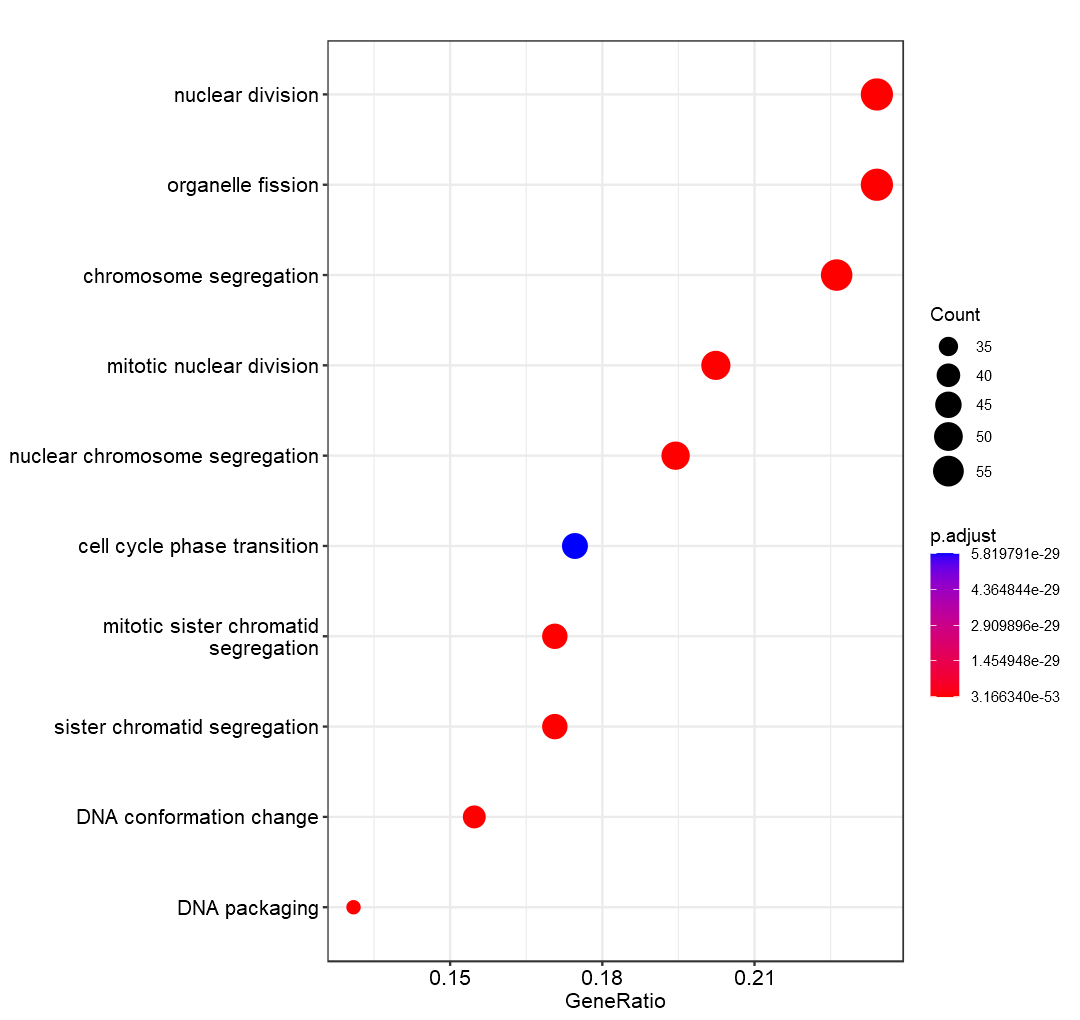

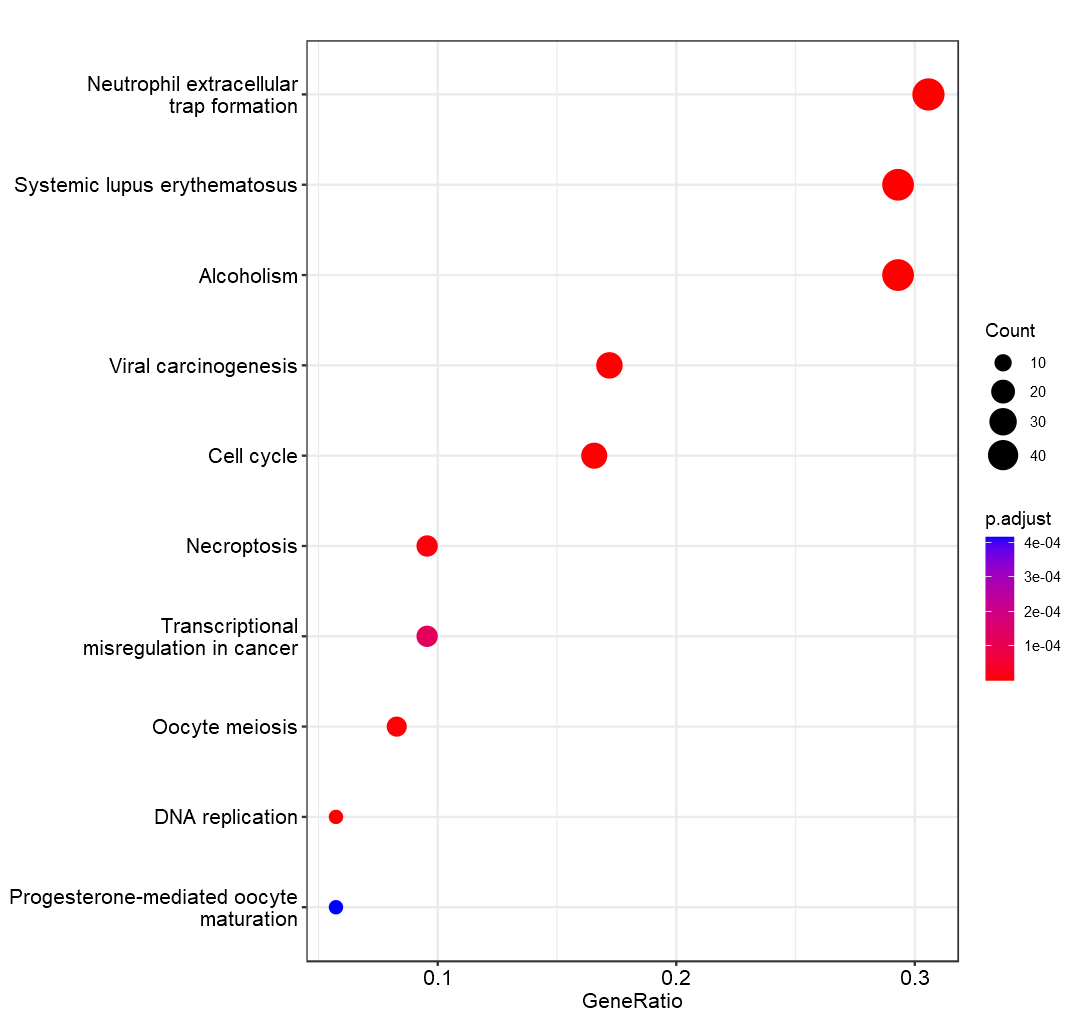

In [30]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS5, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS5 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS5, width=9, height=8.5,
    file=sprintf("TGS5.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS5.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Dn.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TGS6)

In [31]:
condstr <- "TGS6"
TGS6 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: %d\n", length(TGS6))
set.seed(40)
em.bp <- enricher(TGS6, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS6, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS6, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: 65


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_STEROL_BIOSYNTHETIC_PROCESS,GOBP_STEROL_BIOSYNTHETIC_PROCESS,GOBP_STEROL_BIOSYNTHETIC_PROCESS,6/63,77/16223,5.140723e-07,0.0005783536,0.0004766562,Cyp51/Hmgcr/Lss/Msmo1/Scd2/Srebf2,6
GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS,GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS,GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS,5/63,47/16223,1.016439e-06,0.0005783536,0.0004766562,Cyp51/Hmgcr/Lss/Scd2/Srebf2,5
GOBP_REGULATION_OF_CHOLESTEROL_METABOLIC_PROCESS,GOBP_REGULATION_OF_CHOLESTEROL_METABOLIC_PROCESS,GOBP_REGULATION_OF_CHOLESTEROL_METABOLIC_PROCESS,5/63,60/16223,3.481470e-06,0.0013206378,0.0010884176,Cyp51/Hmgcr/Lss/Scd2/Srebf2,5
GOBP_RNA_SPLICING,GOBP_RNA_SPLICING,GOBP_RNA_SPLICING,10/63,441/16223,7.006822e-06,0.0015405168,0.0012696332,Cdc5l/Fus/Hnrnpf/Nono/Polr2l/Sf3b3/Sfpq/Srsf1/Srsf2/Tmbim6,10
GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,9/63,350/16223,7.747459e-06,0.0015405168,0.0012696332,Cdc5l/Fus/Hnrnpf/Nono/Polr2l/Sf3b3/Sfpq/Srsf1/Srsf2,9
GOBP_MITOCHONDRIAL_TRANSPORT,GOBP_MITOCHONDRIAL_TRANSPORT,GOBP_MITOCHONDRIAL_TRANSPORT,8/63,265/16223,8.122233e-06,0.0015405168,0.0012696332,Atp5pb/Cpt1a/Hspd1/Ndufa13/Sfxn1/Srebf2/Vdac1/Ywhaq,8


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_HETEROCHROMATIN,GOCC_HETEROCHROMATIN,GOCC_HETEROCHROMATIN,6/60,72/13139,8.681539e-07,0.000158004,0.0001361631,Baz1b/Cbx3/Macroh2a1/Mbd3/Pml/Tcp1,6
GOCC_PERICENTRIC_HETEROCHROMATIN,GOCC_PERICENTRIC_HETEROCHROMATIN,GOCC_PERICENTRIC_HETEROCHROMATIN,3/60,20/13139,9.765899e-05,0.008886968,0.0076585210,Baz1b/Cbx3/Macroh2a1,3
GOCC_PARASPECKLES,GOCC_PARASPECKLES,GOCC_PARASPECKLES,2/60,6/13139,3.040078e-04,0.018443139,0.0158937404,Nono/Sfpq,2
GOCC_NUCLEAR_REPLICATION_FORK,GOCC_NUCLEAR_REPLICATION_FORK,GOCC_NUCLEAR_REPLICATION_FORK,3/60,34/13139,4.898395e-04,0.022287697,0.0192068643,Baz1b/Cdc5l/Rpa1,3
GOCC_CATALYTIC_STEP_2_SPLICEOSOME,GOCC_CATALYTIC_STEP_2_SPLICEOSOME,GOCC_CATALYTIC_STEP_2_SPLICEOSOME,4/60,86/13139,6.310410e-04,0.022969893,0.0197947602,Cdc5l/Hnrnpf/Sf3b3/Srsf1,4
GOCC_DNA_REPLICATION_FACTOR_A_COMPLEX,GOCC_DNA_REPLICATION_FACTOR_A_COMPLEX,GOCC_DNA_REPLICATION_FACTOR_A_COMPLEX,2/60,12/13139,1.314232e-03,0.039865039,0.0343544874,Cdc5l/Rpa1,2


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_NADP_BINDING,GOMF_NADP_BINDING,GOMF_NADP_BINDING,4/59,49/14695,0.0000433904,0.008547909,0.00689679,Gapdh/Hmgcr/Me1/Por,4
GOMF_NUCLEOSOME_BINDING,GOMF_NUCLEOSOME_BINDING,GOMF_NUCLEOSOME_BINDING,4/59,67/14695,0.0001487491,0.014651785,0.01182164,Hmgn1/Macroh2a1/Mbd3/Ssrp1,4
GOMF_NUCLEOSOMAL_DNA_BINDING,GOMF_NUCLEOSOMAL_DNA_BINDING,GOMF_NUCLEOSOMAL_DNA_BINDING,3/59,37/14695,0.0004334914,0.028465936,0.02296744,Hmgn1/Macroh2a1/Mbd3,3
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_INCORPORATION_OR_REDUCTION_OF_MOLECULAR_OXYGEN_NAD_P_H_AS_ONE_DONOR_AND_INCORPORATION_OF_ONE_ATOM_OF_OXYGEN,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_INCORPORATION_OR_REDUCTION_OF_MOLECULAR_OXYGEN_NAD_P_H_AS_ONE_DONOR_AND_INCORPORATION_OF_ONE_ATOM_OF_OXYGEN,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_INCORPORATION_OR_REDUCTION_OF_MOLECULAR_OXYGEN_NAD_P_H_AS_ONE_DONOR_AND_INCORPORATION_OF_ONE_ATOM_OF_OXYGEN,3/59,46/14695,0.0008254697,0.040654384,0.03280156,Cyp51/Msmo1/Por,3
GOMF_NAD_BINDING,GOMF_NAD_BINDING,GOMF_NAD_BINDING,3/59,52/14695,0.0011814344,0.045282606,0.03653579,Ahcy/Gapdh/Me1,3
GOMF_S100_PROTEIN_BINDING,GOMF_S100_PROTEIN_BINDING,GOMF_S100_PROTEIN_BINDING,2/59,14/14695,0.0013980936,0.045282606,0.03653579,Ezr/S100a6,2


'select()' returned 1:1 mapping between keys and columns



[1] 11  9

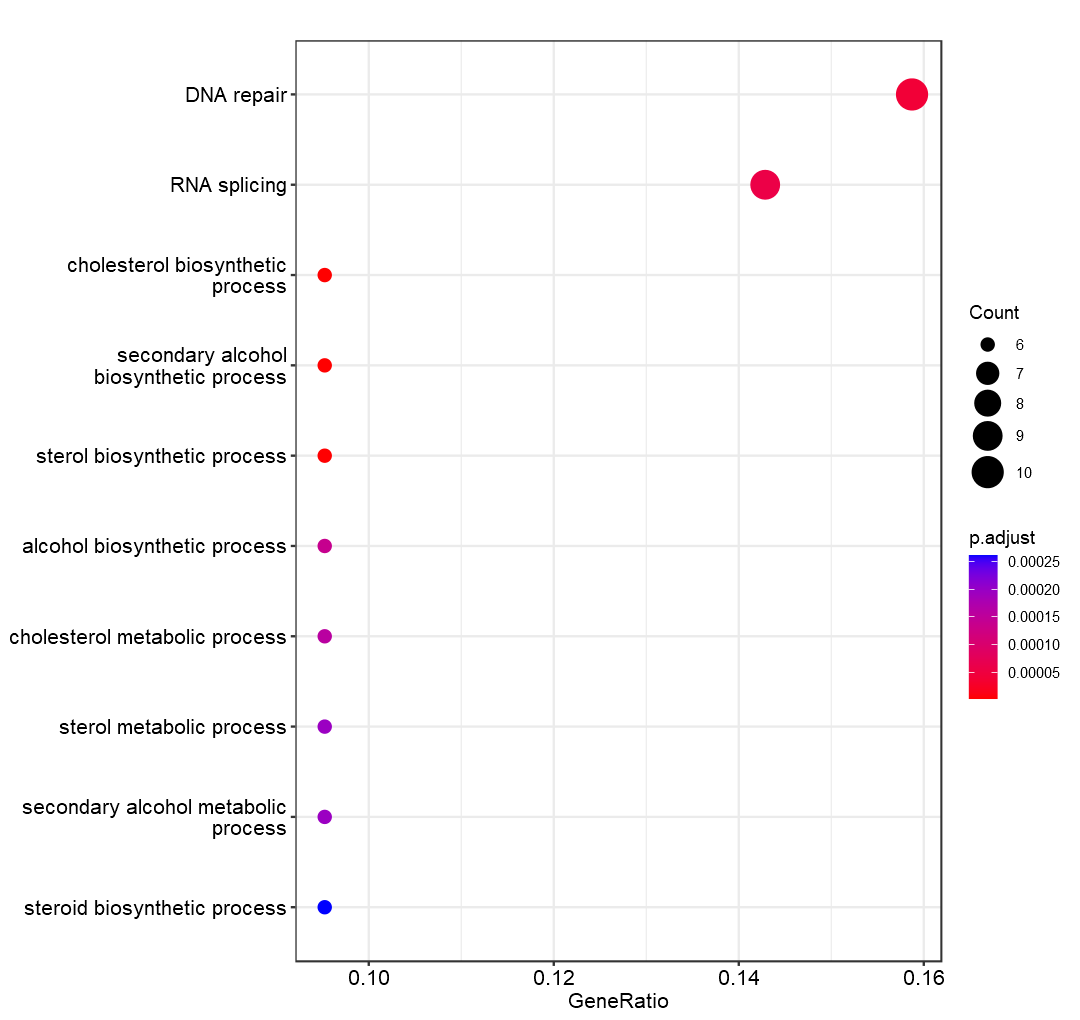

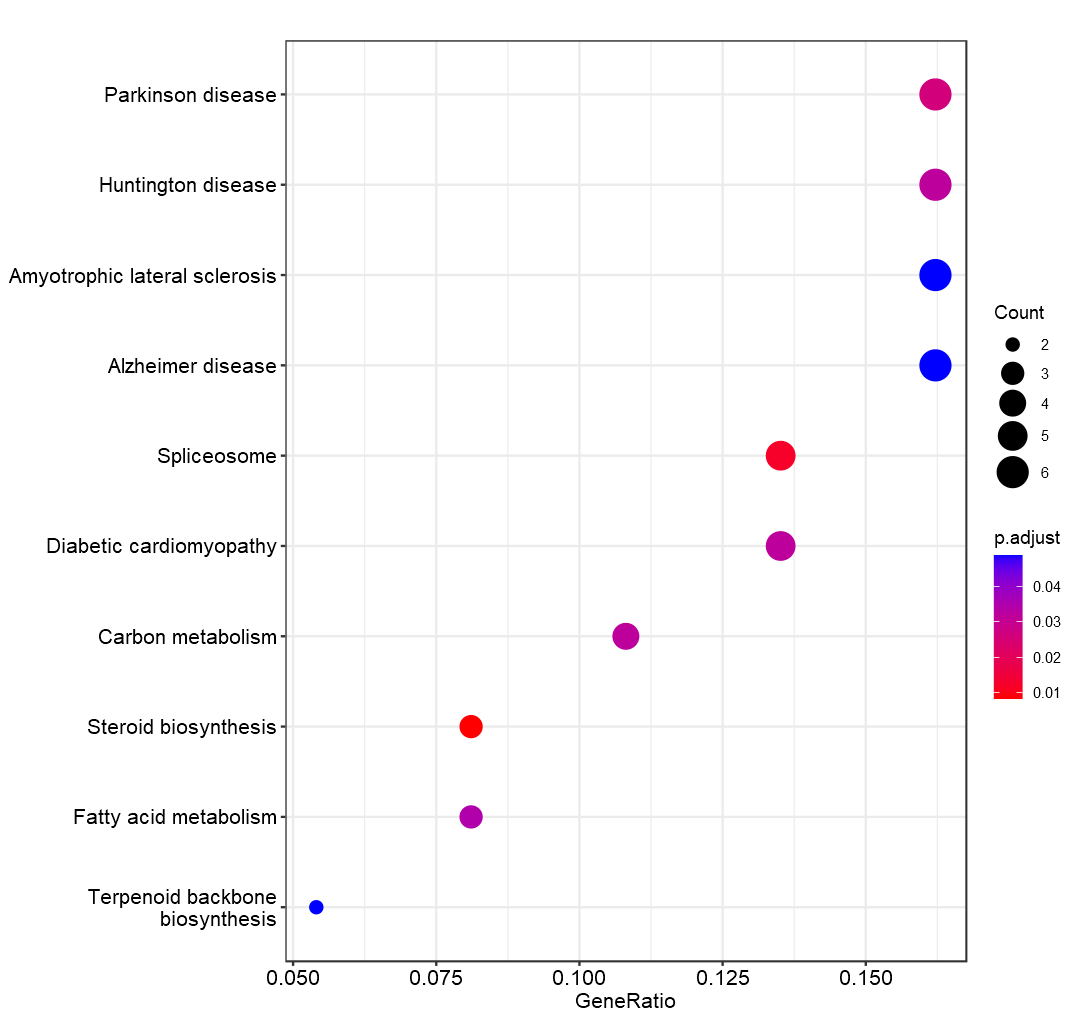

In [32]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TGS6, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS6 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS6, width=9, height=8.5,
    file=sprintf("TGS6.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Un.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS6.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Un.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TGS7)

In [33]:
condstr <- "TGS7"
TGS7 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionUp)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: %d\n", length(TGS7))
set.seed(40)
em.bp <- enricher(TGS7, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS7, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS7, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: 23


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_BASEMENT_MEMBRANE,GOCC_BASEMENT_MEMBRANE,GOCC_BASEMENT_MEMBRANE,3/17,92/13139,0.0002104142,0.01557065,0.01218188,Agrn/Itgb4/Lamb2,3
GOCC_PROTEIN_COMPLEX_INVOLVED_IN_CELL_ADHESION,GOCC_PROTEIN_COMPLEX_INVOLVED_IN_CELL_ADHESION,GOCC_PROTEIN_COMPLEX_INVOLVED_IN_CELL_ADHESION,2/17,36/13139,0.0009673435,0.03340915,0.02613802,Itga3/Itgb4,2
GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,4/17,420/13139,0.0017592574,0.03340915,0.02613802,Itga3/Itgb4/Map2k2/Pxn,4
GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,4/17,423/13139,0.0018058998,0.03340915,0.02613802,Agrn/Itgb4/Lamb2/Lgals3,4


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_LAMININ_BINDING,GOMF_LAMININ_BINDING,GOMF_LAMININ_BINDING,3/21,28/14695,8.052792e-06,0.0006361705,0.000449261,Agrn/Itga3/Lgals3,3
GOMF_EXTRACELLULAR_MATRIX_BINDING,GOMF_EXTRACELLULAR_MATRIX_BINDING,GOMF_EXTRACELLULAR_MATRIX_BINDING,3/21,54/14695,5.953150e-05,0.0023514943,0.001660616,Agrn/Itga3/Lgals3,3
GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,3/21,141/14695,1.013277e-03,0.0266829485,0.018843388,Itga3/Itgb4/Lamb2,3


'select()' returned 1:1 mapping between keys and columns



[1] 7 9

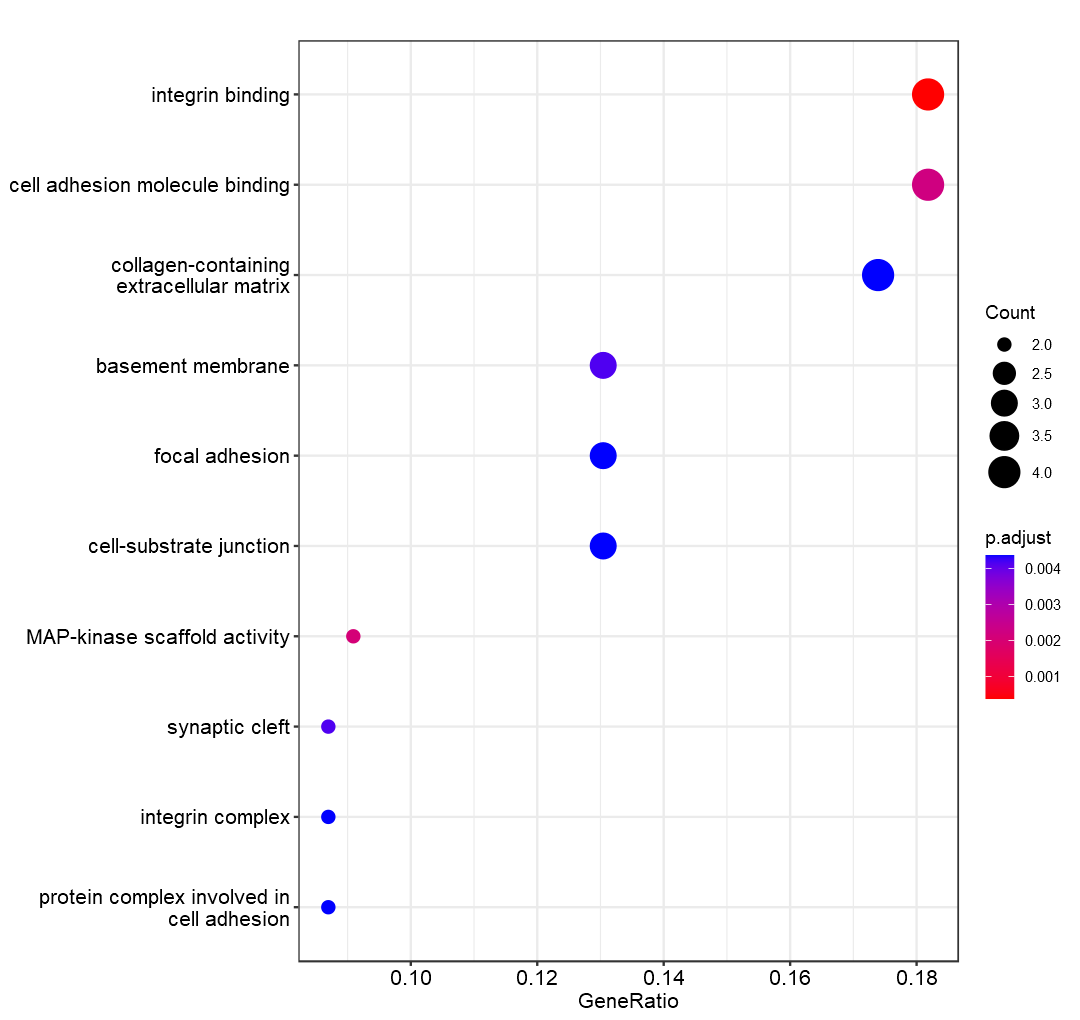

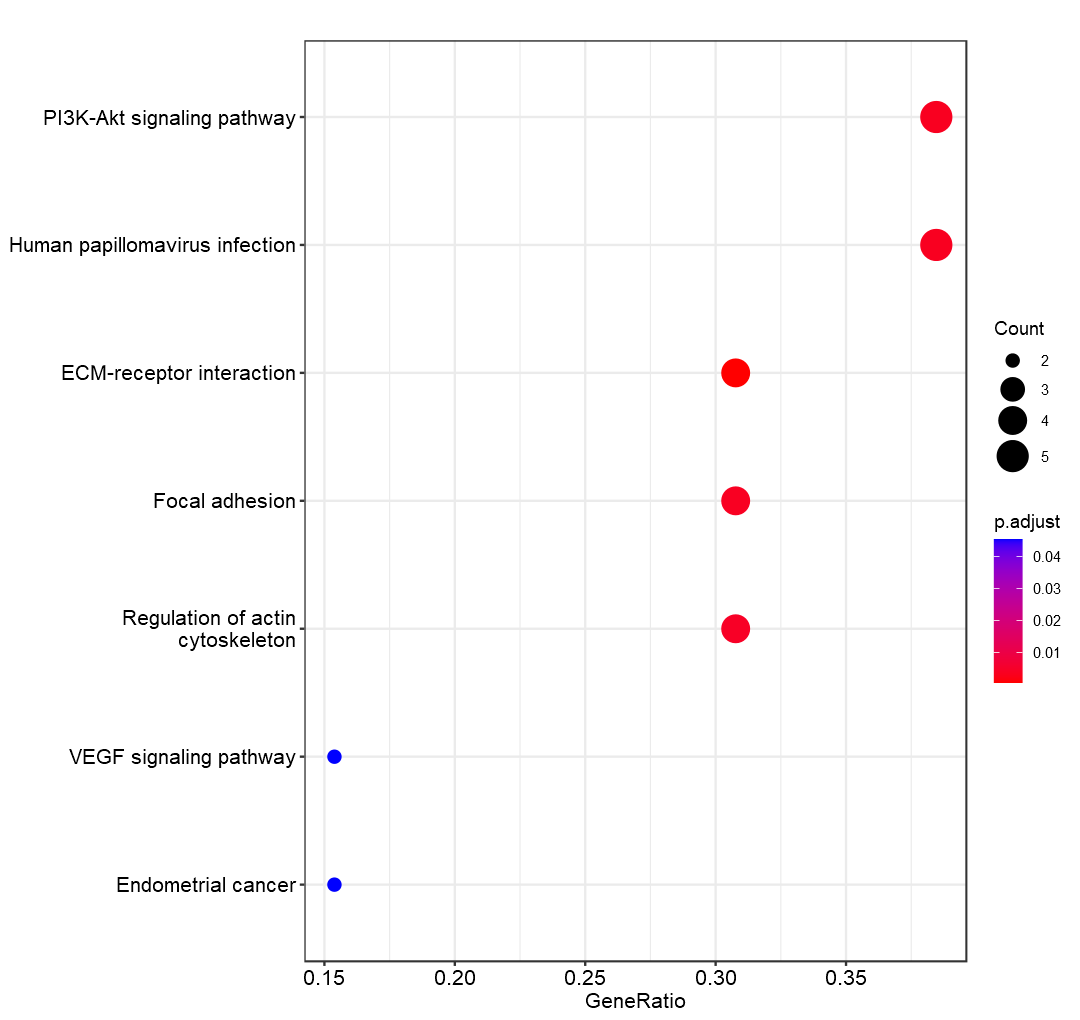

In [34]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS7, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS7 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS7, width=9, height=8.5,
    file=sprintf("TGS7.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS7.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Up.KEGG.Top10"))

### Transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TGS8)

In [35]:
condstr <- "TGS8"
TGS8 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionDn)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: %d\n", length(TGS8))
set.seed(40)
em.bp <- enricher(TGS8, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TGS8, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TGS8, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: 29


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_REGULATION_OF_POLYAMINE_TRANSMEMBRANE_TRANSPORT,GOBP_REGULATION_OF_POLYAMINE_TRANSMEMBRANE_TRANSPORT,GOBP_REGULATION_OF_POLYAMINE_TRANSMEMBRANE_TRANSPORT,2/28,5/16223,2.863475e-05,0.007209368,0.004888030,Oaz1/Oaz2,2
GOBP_MRNA_EXPORT_FROM_NUCLEUS,GOBP_MRNA_EXPORT_FROM_NUCLEUS,GOBP_MRNA_EXPORT_FROM_NUCLEUS,4/28,110/16223,3.613718e-05,0.007209368,0.004888030,Nup153/Nup85/Srsf3/Srsf7,4
GOBP_POLYAMINE_TRANSPORT,GOBP_POLYAMINE_TRANSPORT,GOBP_POLYAMINE_TRANSPORT,2/28,7/16223,6.000457e-05,0.007980608,0.005410938,Oaz1/Oaz2,2
GOBP_RNA_EXPORT_FROM_NUCLEUS,GOBP_RNA_EXPORT_FROM_NUCLEUS,GOBP_RNA_EXPORT_FROM_NUCLEUS,4/28,137/16223,8.514027e-05,0.008242228,0.005588319,Nup153/Nup85/Srsf3/Srsf7,4
GOBP_MRNA_TRANSPORT,GOBP_MRNA_TRANSPORT,GOBP_MRNA_TRANSPORT,4/28,144/16223,1.032861e-04,0.008242228,0.005588319,Nup153/Nup85/Srsf3/Srsf7,4
GOBP_POLYAMINE_BIOSYNTHETIC_PROCESS,GOBP_POLYAMINE_BIOSYNTHETIC_PROCESS,GOBP_POLYAMINE_BIOSYNTHETIC_PROCESS,2/28,13/16223,2.214499e-04,0.012879974,0.008732762,Oaz1/Oaz2,2


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_PRERIBOSOME,GOCC_PRERIBOSOME,GOCC_PRERIBOSOME,4/24,75/13139,9.542624e-06,0.0008302083,0.000532378,Heatr1/Las1l/Nop56/Rrp1b,4
GOCC_PRERIBOSOME_LARGE_SUBUNIT_PRECURSOR,GOCC_PRERIBOSOME_LARGE_SUBUNIT_PRECURSOR,GOCC_PRERIBOSOME_LARGE_SUBUNIT_PRECURSOR,2/24,23/13139,7.902940e-04,0.0271155784,0.017388090,Las1l/Rrp1b,2
GOCC_SNO_S_RNA_CONTAINING_RIBONUCLEOPROTEIN_COMPLEX,GOCC_SNO_S_RNA_CONTAINING_RIBONUCLEOPROTEIN_COMPLEX,GOCC_SNO_S_RNA_CONTAINING_RIBONUCLEOPROTEIN_COMPLEX,2/24,25/13139,9.350199e-04,0.0271155784,0.017388090,Nop56/Snrpf,2
GOCC_FIBRILLAR_CENTER,GOCC_FIBRILLAR_CENTER,GOCC_FIBRILLAR_CENTER,3/24,140/13139,2.034066e-03,0.0356381663,0.022853271,Acaca/Heatr1/Nop56,3
GOCC_SMALL_SUBUNIT_PROCESSOME,GOCC_SMALL_SUBUNIT_PROCESSOME,GOCC_SMALL_SUBUNIT_PROCESSOME,2/24,37/13139,2.048170e-03,0.0356381663,0.022853271,Heatr1/Nop56,2


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_ORNITHINE_DECARBOXYLASE_REGULATOR_ACTIVITY,GOMF_ORNITHINE_DECARBOXYLASE_REGULATOR_ACTIVITY,GOMF_ORNITHINE_DECARBOXYLASE_REGULATOR_ACTIVITY,2/26,5/14695,3.000436e-05,0.002490361,0.001895012,Oaz1/Oaz2,2
GOMF_STRUCTURAL_CONSTITUENT_OF_NUCLEAR_PORE,GOMF_STRUCTURAL_CONSTITUENT_OF_NUCLEAR_PORE,GOMF_STRUCTURAL_CONSTITUENT_OF_NUCLEAR_PORE,2/26,25/14695,8.807487e-04,0.036551070,0.027813116,Nup153/Nup85,2
GOMF_SNORNA_BINDING,GOMF_SNORNA_BINDING,GOMF_SNORNA_BINDING,2/26,32/14695,1.445132e-03,0.039981988,0.030423833,Heatr1/Nop56,2


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS8, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"3.45% of input gene IDs are fail to map..."


[1] 2 9

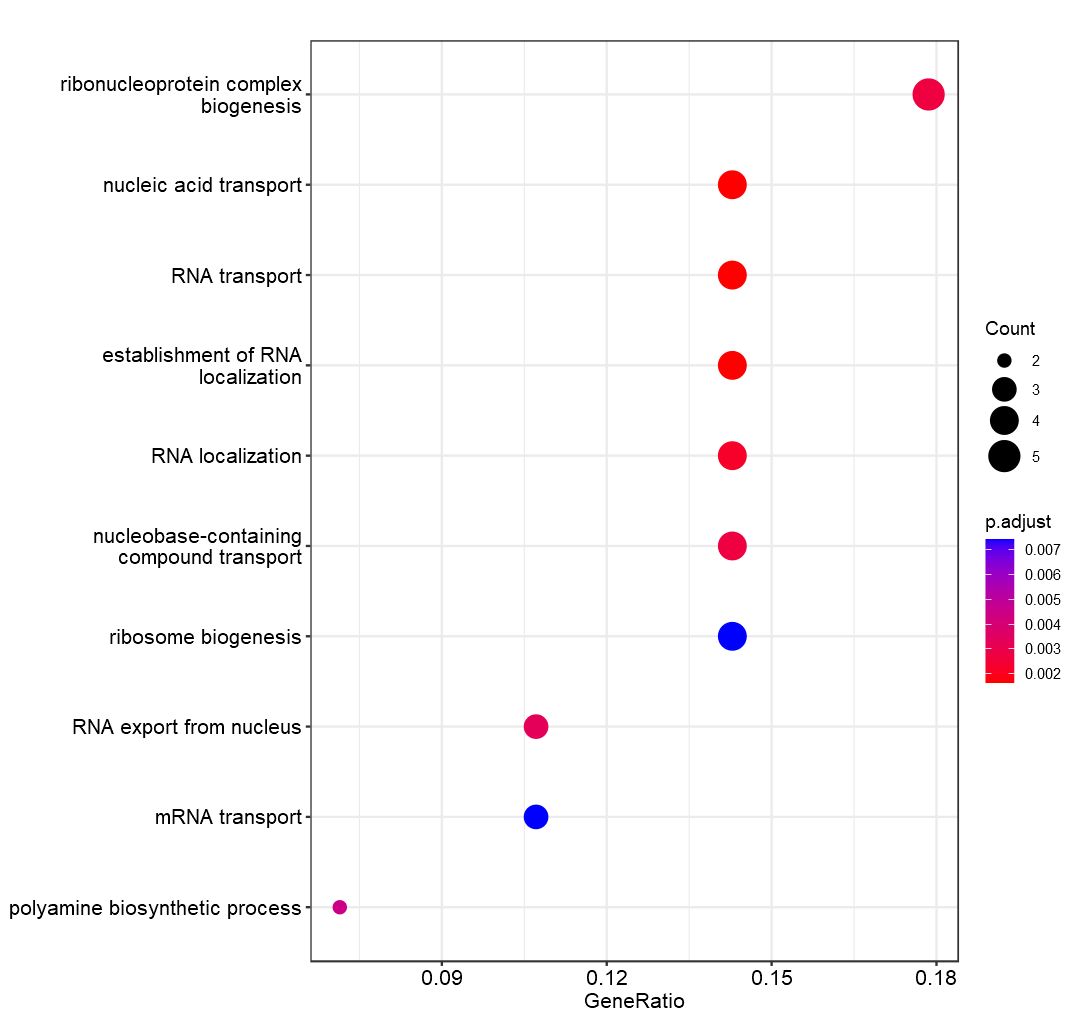

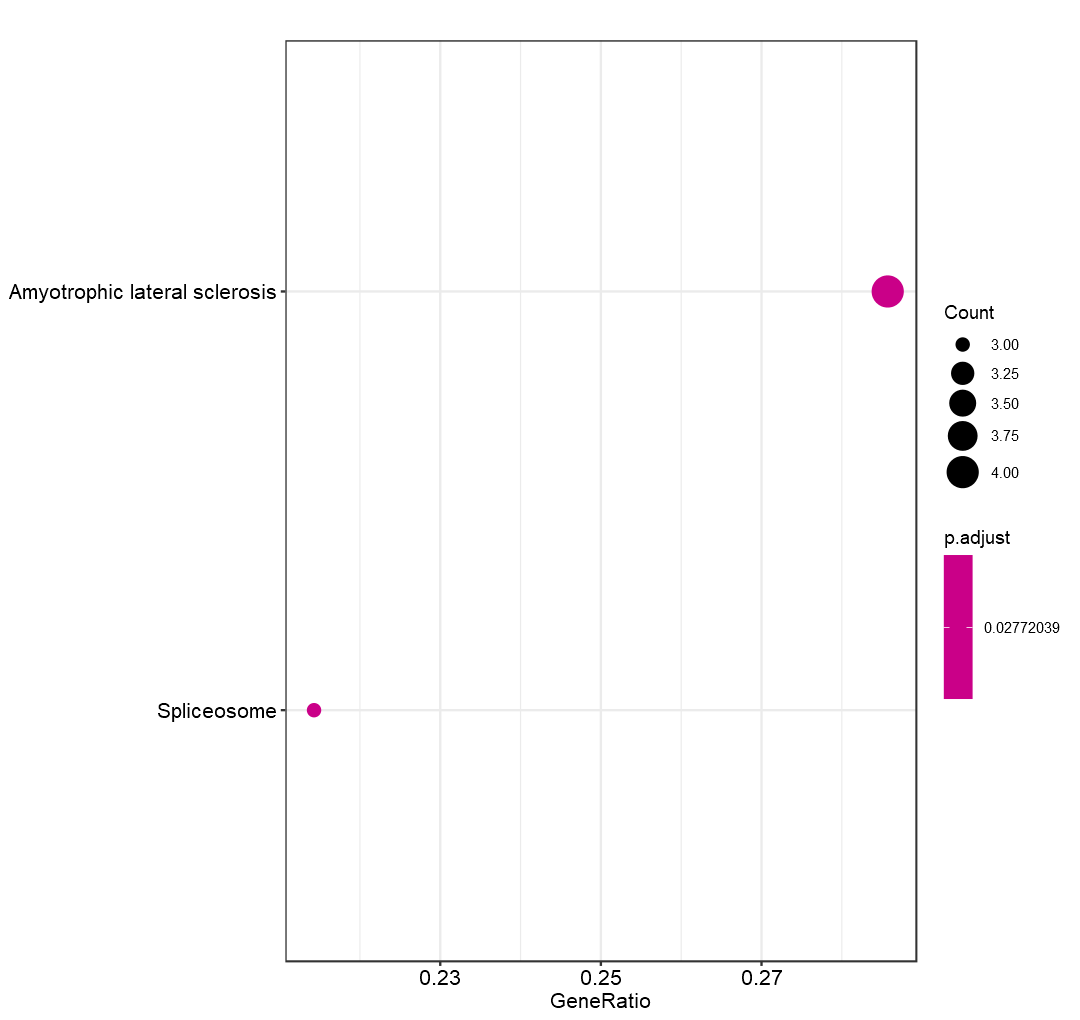

In [36]:
n_top_egmt <- 10

################################################
entrez.id <- bitr(TGS8, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TGS8 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TGS8, width=9, height=8.5,
    file=sprintf("TGS8.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TGS8.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Dn.KEGG.Top10"))

# <font color='blue'> Group wise cpmarisons (total eight) for the Riboprofiling/translational data

**TrGs** = *Translation Groups*

|TrGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|

### Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TrGS1)

In [37]:
condstr <- "TrGS1"
TrGS1 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS1))
set.seed(40)
em.bp <- enricher(TrGS1, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS1, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS1, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 65


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_REGULATION_OF_EPITHELIAL_CELL_DIFFERENTIATION,GOBP_REGULATION_OF_EPITHELIAL_CELL_DIFFERENTIATION,GOBP_REGULATION_OF_EPITHELIAL_CELL_DIFFERENTIATION,7/59,149/16223,1.094928e-06,0.001338080,0.001034081,Cebpb/Ctsl/F11r/Hes1/Lif/Maff/Sox9,7
GOBP_RECEPTOR_SIGNALING_PATHWAY_VIA_STAT,GOBP_RECEPTOR_SIGNALING_PATHWAY_VIA_STAT,GOBP_RECEPTOR_SIGNALING_PATHWAY_VIA_STAT,7/59,160/16223,1.765277e-06,0.001338080,0.001034081,Ccl2/Clcf1/Csf2/Gadd45a/Hes1/Lif/Pias1,7
GOBP_ACTIVATION_OF_MAPKKK_ACTIVITY,GOBP_ACTIVATION_OF_MAPKKK_ACTIVITY,GOBP_ACTIVATION_OF_MAPKKK_ACTIVITY,3/59,12/16223,9.820537e-06,0.003721983,0.002876383,Gadd45a/Gadd45b/Gadd45g,3
GOBP_POSITIVE_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_POSITIVE_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_POSITIVE_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,3/59,12/16223,9.820537e-06,0.003721983,0.002876383,Clcf1/Hes1/Lif,3
GOBP_METANEPHRIC_TUBULE_DEVELOPMENT,GOBP_METANEPHRIC_TUBULE_DEVELOPMENT,GOBP_METANEPHRIC_TUBULE_DEVELOPMENT,3/59,21/16223,5.800247e-05,0.017051809,0.013177797,Hes1/Lif/Sox9,3
GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,3/59,24/16223,8.758612e-05,0.017051809,0.013177797,Clcf1/Hes1/Lif,3


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_VESICLE_LUMEN,GOCC_VESICLE_LUMEN,GOCC_VESICLE_LUMEN,7/46,347/13139,0.0001859678,0.02186549,0.01865715,B2m/Cstb/Cyb5r3/Ftl1/Gla/Timp1/Tmsb4x,7
GOCC_HFE_TRANSFERRIN_RECEPTOR_COMPLEX,GOCC_HFE_TRANSFERRIN_RECEPTOR_COMPLEX,GOCC_HFE_TRANSFERRIN_RECEPTOR_COMPLEX,2/46,8/13139,0.0003312952,0.02186549,0.01865715,B2m/Tfr2,2


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


**TrGs** = *Translation Groups*

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS1, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"1.54% of input gene IDs are fail to map..."


[1] 21  9

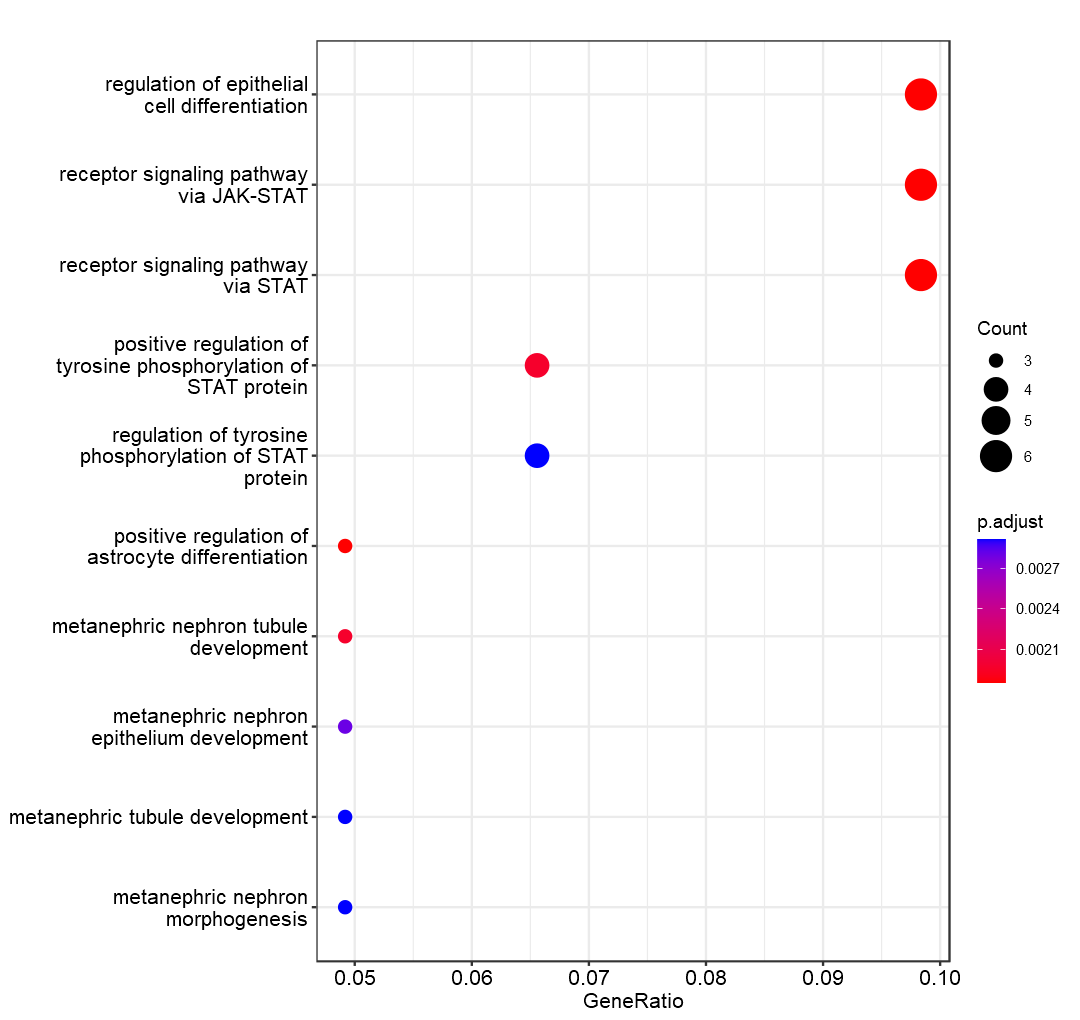

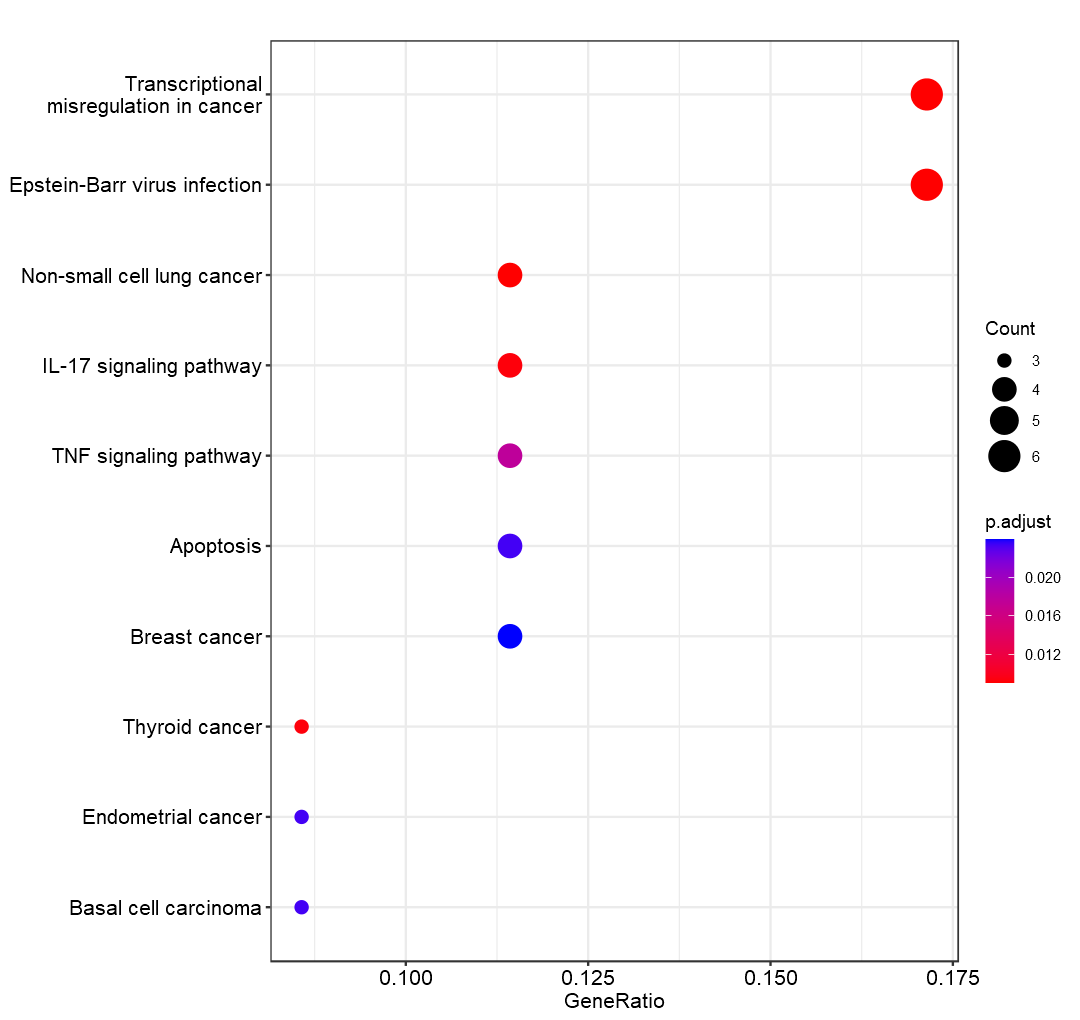

In [38]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS1, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS1 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS1, width=9, height=8.5,
    file=sprintf("TrGS1.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS1.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Up.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TrGS2)

In [39]:
condstr <- "TrGS2"
TrGS2 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: %d\n", length(TrGS2))
set.seed(40)
em.bp <- enricher(TrGS2, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS2, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS2, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: 301


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_EXTERNAL_ENCAPSULATING_STRUCTURE_ORGANIZATION,GOBP_EXTERNAL_ENCAPSULATING_STRUCTURE_ORGANIZATION,GOBP_EXTERNAL_ENCAPSULATING_STRUCTURE_ORGANIZATION,37/283,408/16223,1.550561e-16,5.265703e-13,4.563544e-13,Adam12/Agrn/Capn1/Ccn1/Ccn2/Clasp1/Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Efemp2/Ets1/Fbln2/Fn1/Hspg2/Itga2/Itga5/Itgb3/Itgb6/Lamb3/Loxl2/Loxl4/Lrp1/Ltbp3/Nfkb2/Pdgfb/Pxdn/Qsox1/Serpine1/Smpd3/Sparc/Spp1/Thbs1,37
GOBP_CELL_SUBSTRATE_ADHESION,GOBP_CELL_SUBSTRATE_ADHESION,GOBP_CELL_SUBSTRATE_ADHESION,31/283,355/16223,1.467111e-13,2.491155e-10,2.158970e-10,Actg1/Actn1/Atrn/Calr/Ccn1/Ccn2/Clasp1/Col1a1/Dlc1/Efemp2/Fbln2/Flna/Fn1/Itga2/Itga5/Itgb3/Itgb6/Jag1/Jup/Lamb3/Lrp1/Myadm/P4hb/Pdgfb/Pkhd1/Ptprk/Rab1a/Serpine1/Thbs1/Ttyh1/Vcl,31
GOBP_REGULATION_OF_CELL_SUBSTRATE_ADHESION,GOBP_REGULATION_OF_CELL_SUBSTRATE_ADHESION,GOBP_REGULATION_OF_CELL_SUBSTRATE_ADHESION,21/283,216/16223,2.034914e-10,2.303523e-07,1.996358e-07,Actg1/Calr/Ccn1/Clasp1/Col1a1/Dlc1/Efemp2/Fbln2/Flna/Fn1/Itga5/Jag1/Jup/Lrp1/Myadm/P4hb/Pdgfb/Pkhd1/Serpine1/Thbs1/Vcl,21
GOBP_PLATELET_DEGRANULATION,GOBP_PLATELET_DEGRANULATION,GOBP_PLATELET_DEGRANULATION,16/283,129/16223,8.766089e-10,7.442410e-07,6.449996e-07,Actn1/Anxa5/Calm1/Clu/Flna/Fn1/Itgb3/Pcyox1l/Pdgfb/Qsox1/Selp/Serpine1/Sparc/Thbs1/Tln1/Vcl,16
GOBP_MORPHOGENESIS_OF_AN_EPITHELIAL_SHEET,GOBP_MORPHOGENESIS_OF_AN_EPITHELIAL_SHEET,GOBP_MORPHOGENESIS_OF_AN_EPITHELIAL_SHEET,11/283,58/16223,4.126768e-09,2.802901e-06,2.429146e-06,Ccn1/Clasp1/Col5a1/Dll4/Flna/Hbegf/Itga5/Jag1/Megf8/Mrtfa/Notch2,11
GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,GOBP_AMEBOIDAL_TYPE_CELL_MIGRATION,27/283,447/16223,2.128384e-08,1.204665e-05,1.044028e-05,Akap12/Amotl2/Angpt4/Anxa1/Anxa6/Calr/Card10/Cdh2/Clasp1/Dll4/Ets1/Fn1/Hbegf/Itga2/Itgb3/Jup/Kank2/Loxl2/Megf8/Myh9/Pdgfb/Plxnd1/Rhob/Rtn4/Sparc/Thbs1/Tpbg,27


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,GOCC_CELL_SUBSTRATE_JUNCTION,40/252,420/13139,2.785567e-17,1.197794e-14,9.705501e-15,Actb/Actg1/Actn1/Add1/Akap12/Anxa1/Anxa5/Anxa6/Calr/Capn1/Cd81/Cdh2/Clasp1/Dlc1/Fhl2/Flna/Fzd2/Gnb2/Hsp90b1/Hspg2/Itga2/Itga5/Itgb3/Itgb6/Jup/Lpp/Lrp1/Marcks/Mcam/Msn/Myh9/P4hb/Pabpc1/Rhob/Tes/Tgm2/Tln1/Tns1/Vcl/Vim,40
GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,38/252,423/13139,1.310448e-15,2.817463e-13,2.282938e-13,Agrn/Angpt4/Angptl4/Anxa1/Anxa5/Anxa6/Atrn/Calr/Ccn1/Ccn2/Cdh2/Clu/Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Efemp2/F3/Fbln2/Fn1/Hsp90b1/Hspg2/Lamb3/Loxl2/Ltbp1/Ltbp3/Ltbp4/Mfge8/Ncam1/Pdgfb/Pxdn/Serpine1/Sparc/Tgm2/Thbs1,38
GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,27/252,309/13139,4.435108e-11,6.356988e-09,5.150950e-09,Calr/Ccn1/Cdh2/Clu/Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Cp/Fn1/H6pd/Hsp90b1/Ltbp1/Mfge8/P4hb/Pdgfb/Pdia4/Pdia6/Qsox1/Rcn2/Spp1/Thbs1/Tmem132a,27
GOCC_BASEMENT_MEMBRANE,GOCC_BASEMENT_MEMBRANE,GOCC_BASEMENT_MEMBRANE,13/252,92/13139,2.028121e-08,2.180231e-06,1.766600e-06,Agrn/Atrn/Col18a1/Col4a1/Col4a2/Col5a1/Col7a1/Efemp2/Fn1/Hspg2/Lamb3/Loxl2/Sparc,13
GOCC_ACTIN_FILAMENT_BUNDLE,GOCC_ACTIN_FILAMENT_BUNDLE,GOCC_ACTIN_FILAMENT_BUNDLE,11/252,72/13139,1.117902e-07,9.613955e-06,7.790010e-06,Acta1/Actn1/Cryab/Fhod1/Flna/Lpp/Marcks/Mst1r/Myh9/Ror1/Septin11,11
GOCC_PLATELET_ALPHA_GRANULE,GOCC_PLATELET_ALPHA_GRANULE,GOCC_PLATELET_ALPHA_GRANULE,11/252,94/13139,1.760953e-06,1.262016e-04,1.022588e-04,Actn1/Clu/Fn1/Itgb3/Pcyox1l/Pdgfb/Qsox1/Selp/Serpine1/Sparc/Thbs1,11


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,GOMF_INTEGRIN_BINDING,20/265,141/14695,8.877232e-13,5.202058e-10,4.447961e-10,Actn1/Calr/Ccn1/Ccn2/Cd81/Col5a1/Fn1/Itga2/Itga5/Itgb3/Itgb6/Ltbp4/Mfge8/Myh9/Nisch/Nrg1/P4hb/Spp1/Thbs1/Tln1,20
GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT,GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT,GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT,20/265,164/14695,1.548903e-11,4.538285e-09,3.880409e-09,Agrn/Ccn1/Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Efemp2/Fbln2/Fn1/Hspg2/Lamb3/Ltbp1/Ltbp4/Mfge8/Pxdn/Sparc/Thbs1,20
GOMF_GROWTH_FACTOR_BINDING,GOMF_GROWTH_FACTOR_BINDING,GOMF_GROWTH_FACTOR_BINDING,15/265,136/14695,2.302084e-08,4.496738e-06,3.844884e-06,Ccn1/Ccn2/Col1a1/Col4a1/Col5a1/Glg1/Itgb3/Lrrc32/Ltbp1/Ltbp3/Ltbp4/Pdgfb/Pxdn/Thbs1/Vasn,15
GOMF_EXTRACELLULAR_MATRIX_BINDING,GOMF_EXTRACELLULAR_MATRIX_BINDING,GOMF_EXTRACELLULAR_MATRIX_BINDING,9/265,54/14695,4.608337e-07,6.751214e-05,5.772549e-05,Adgrg1/Agrn/Ccn1/Fbln2/Itga2/Itgb3/Sparc/Spp1/Thbs1,9
GOMF_TRANSFORMING_GROWTH_FACTOR_BETA_BINDING,GOMF_TRANSFORMING_GROWTH_FACTOR_BETA_BINDING,GOMF_TRANSFORMING_GROWTH_FACTOR_BETA_BINDING,6/265,24/14695,3.329677e-06,3.902381e-04,3.336687e-04,Lrrc32/Ltbp1/Ltbp3/Ltbp4/Thbs1/Vasn,6
GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT_CONFERRING_TENSILE_STRENGTH,GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT_CONFERRING_TENSILE_STRENGTH,GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT_CONFERRING_TENSILE_STRENGTH,7/265,40/14695,6.422396e-06,6.272540e-04,5.363264e-04,Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1,7


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(TrGS2, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"2.99% of input gene IDs are fail to map..."


[1] 18  9

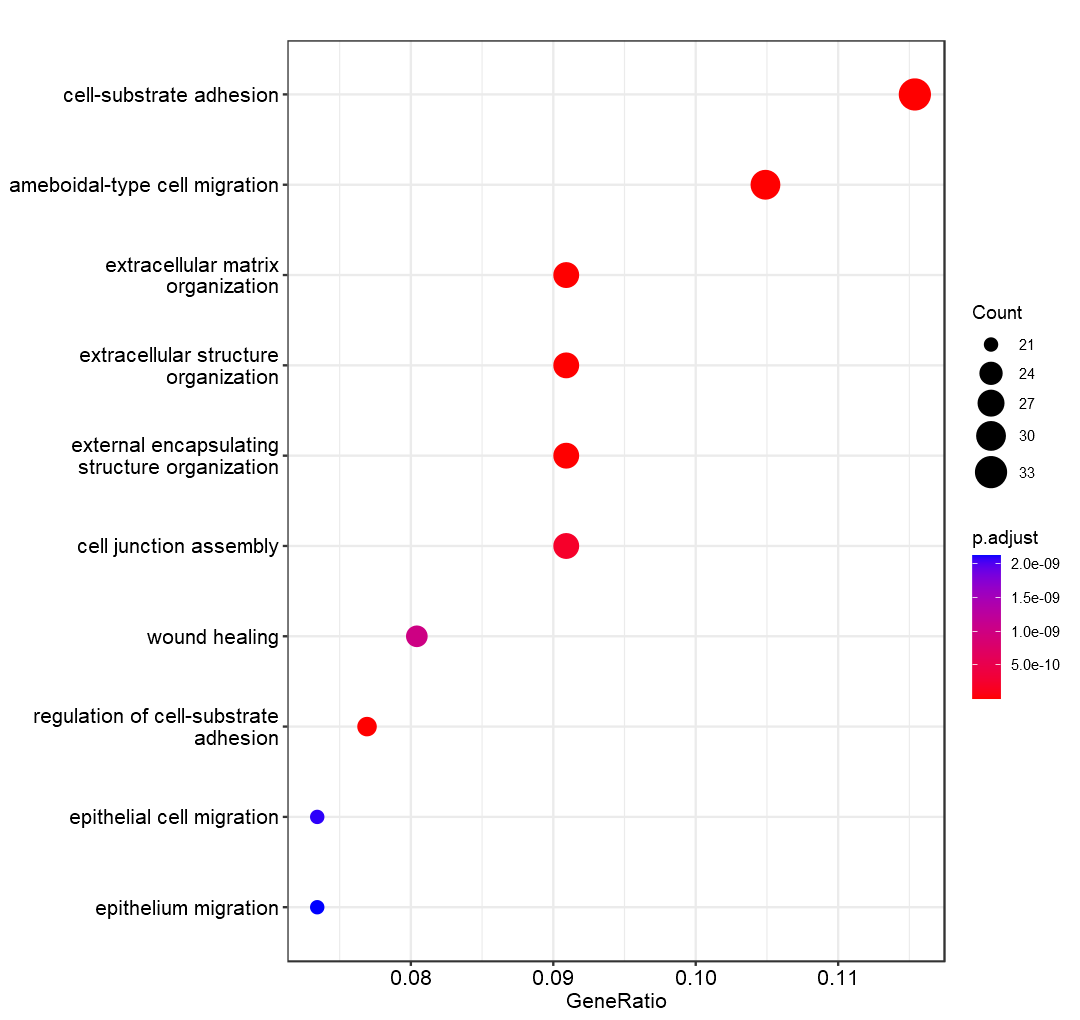

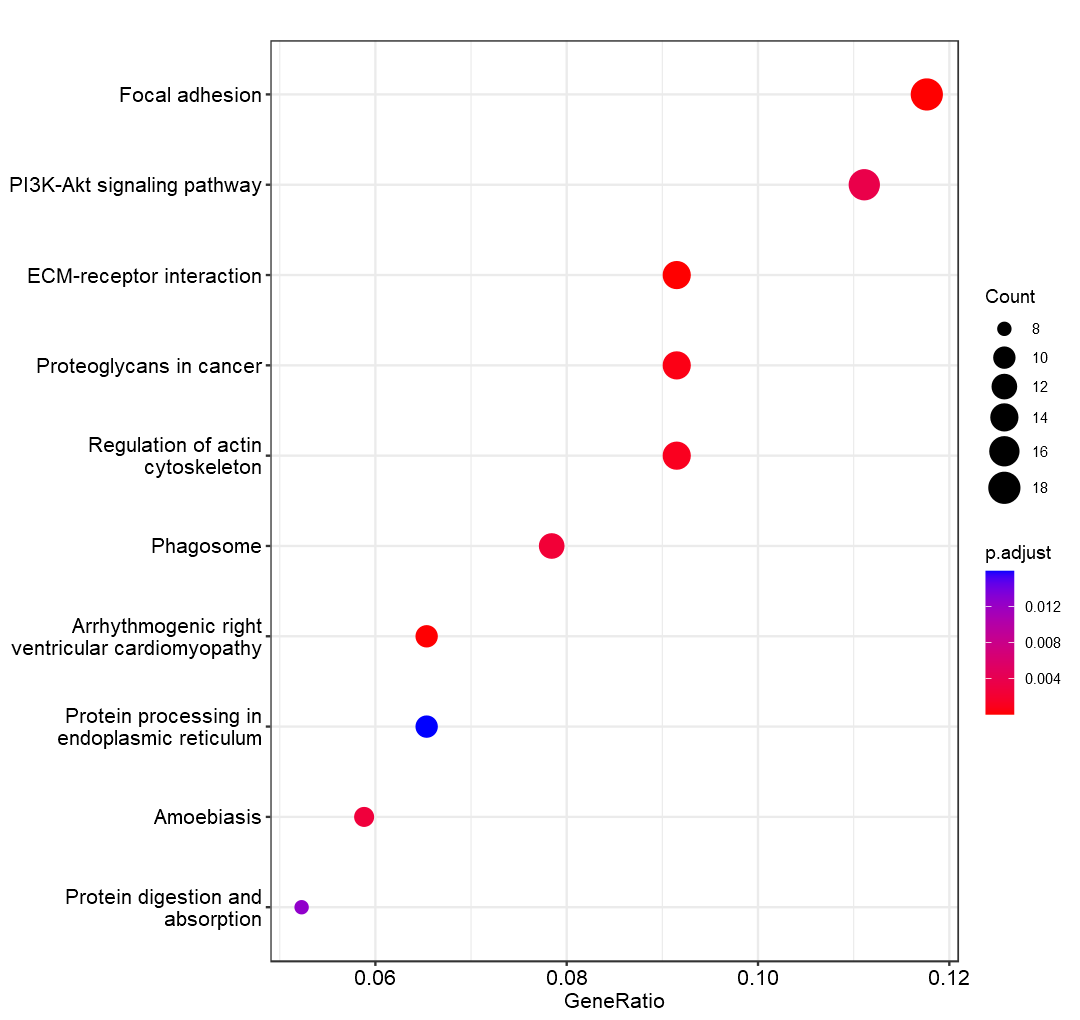

In [40]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS2, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS2 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS2, width=9, height=8.5,
    file=sprintf("TrGS2.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS2.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Dn.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TrGS3)

In [41]:
condstr <- "TrGS3"
TrGS3 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: %d\n", length(TrGS3))
set.seed(40)
em.bp <- enricher(TrGS3, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS3, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS3, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: 4


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_MULTI_MULTICELLULAR_ORGANISM_PROCESS,GOBP_MULTI_MULTICELLULAR_ORGANISM_PROCESS,GOBP_MULTI_MULTICELLULAR_ORGANISM_PROCESS,2/4,193/16223,0.000831634,0.04420929,0.01700974,Igfbp7/Junb,2
GOBP_EMBRYONIC_PROCESS_INVOLVED_IN_FEMALE_PREGNANCY,GOBP_EMBRYONIC_PROCESS_INVOLVED_IN_FEMALE_PREGNANCY,GOBP_EMBRYONIC_PROCESS_INVOLVED_IN_FEMALE_PREGNANCY,1/4,5/16223,0.001232362,0.04420929,0.01700974,Junb,1
GOBP_RESPONSE_TO_CORTISOL,GOBP_RESPONSE_TO_CORTISOL,GOBP_RESPONSE_TO_CORTISOL,1/4,5/16223,0.001232362,0.04420929,0.01700974,Igfbp7,1
GOBP_RESPONSE_TO_ISOLATION_STRESS,GOBP_RESPONSE_TO_ISOLATION_STRESS,GOBP_RESPONSE_TO_ISOLATION_STRESS,1/4,6/16223,0.001478697,0.04420929,0.01700974,Lgals1,1
GOBP_PLASMA_CELL_DIFFERENTIATION,GOBP_PLASMA_CELL_DIFFERENTIATION,GOBP_PLASMA_CELL_DIFFERENTIATION,1/4,7/16223,0.001724987,0.04420929,0.01700974,Lgals1,1
GOBP_POSITIVE_REGULATION_OF_HOMOTYPIC_CELL_CELL_ADHESION,GOBP_POSITIVE_REGULATION_OF_HOMOTYPIC_CELL_CELL_ADHESION,GOBP_POSITIVE_REGULATION_OF_HOMOTYPIC_CELL_CELL_ADHESION,1/4,9/16223,0.002217431,0.04420929,0.01700974,Lgals1,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,GOCC_ENDOPLASMIC_RETICULUM_LUMEN,2/4,309/13139,0.003205852,0.01386617,0.002085138,Igfbp7/Lgals1,2
GOCC_TRANSCRIPTION_REGULATOR_COMPLEX,GOCC_TRANSCRIPTION_REGULATOR_COMPLEX,GOCC_TRANSCRIPTION_REGULATOR_COMPLEX,2/4,400/13139,0.005325891,0.01386617,0.002085138,Ankrd1/Junb,2
GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,2/4,423/13139,0.005942644,0.01386617,0.002085138,Igfbp7/Lgals1,2


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_OLIGOSACCHARIDE_BINDING,GOMF_OLIGOSACCHARIDE_BINDING,GOMF_OLIGOSACCHARIDE_BINDING,1/4,13/14695,0.003534286,0.02991096,0.009942702,Lgals1,1
GOMF_TITIN_BINDING,GOMF_TITIN_BINDING,GOMF_TITIN_BINDING,1/4,13/14695,0.003534286,0.02991096,0.009942702,Ankrd1,1
GOMF_R_SMAD_BINDING,GOMF_R_SMAD_BINDING,GOMF_R_SMAD_BINDING,1/4,22/14695,0.005975605,0.02991096,0.009942702,Ankrd1,1
GOMF_LAMININ_BINDING,GOMF_LAMININ_BINDING,GOMF_LAMININ_BINDING,1/4,28/14695,0.007600658,0.02991096,0.009942702,Lgals1,1
GOMF_INSULIN_LIKE_GROWTH_FACTOR_BINDING,GOMF_INSULIN_LIKE_GROWTH_FACTOR_BINDING,GOMF_INSULIN_LIKE_GROWTH_FACTOR_BINDING,1/4,29/14695,0.007871306,0.02991096,0.009942702,Igfbp7,1
GOMF_RNA_POLYMERASE_II_TRANSCRIPTION_FACTOR_BINDING,GOMF_RNA_POLYMERASE_II_TRANSCRIPTION_FACTOR_BINDING,GOMF_RNA_POLYMERASE_II_TRANSCRIPTION_FACTOR_BINDING,1/4,52/14695,0.014080950,0.03968160,0.013190561,Ankrd1,1


'select()' returned 1:1 mapping between keys and columns



[1] 3 9

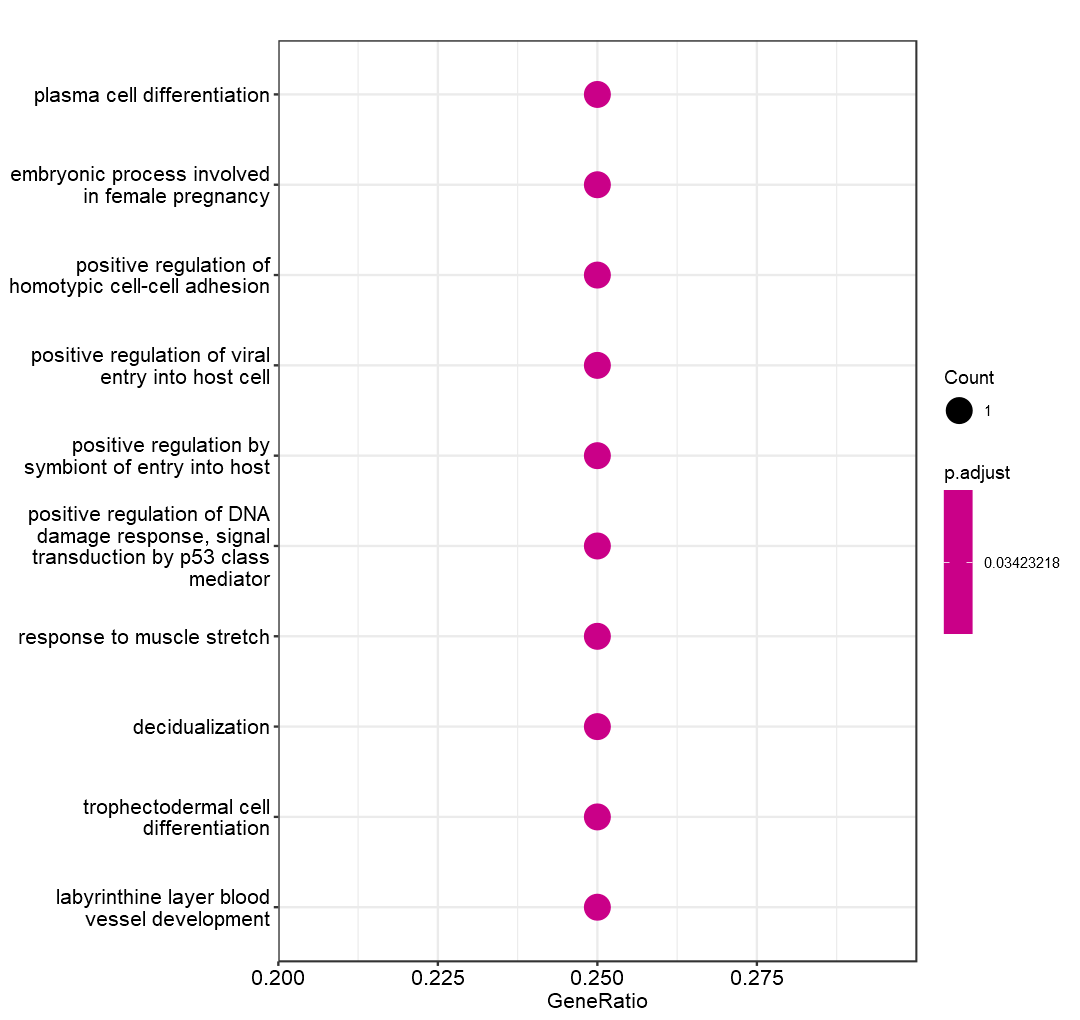

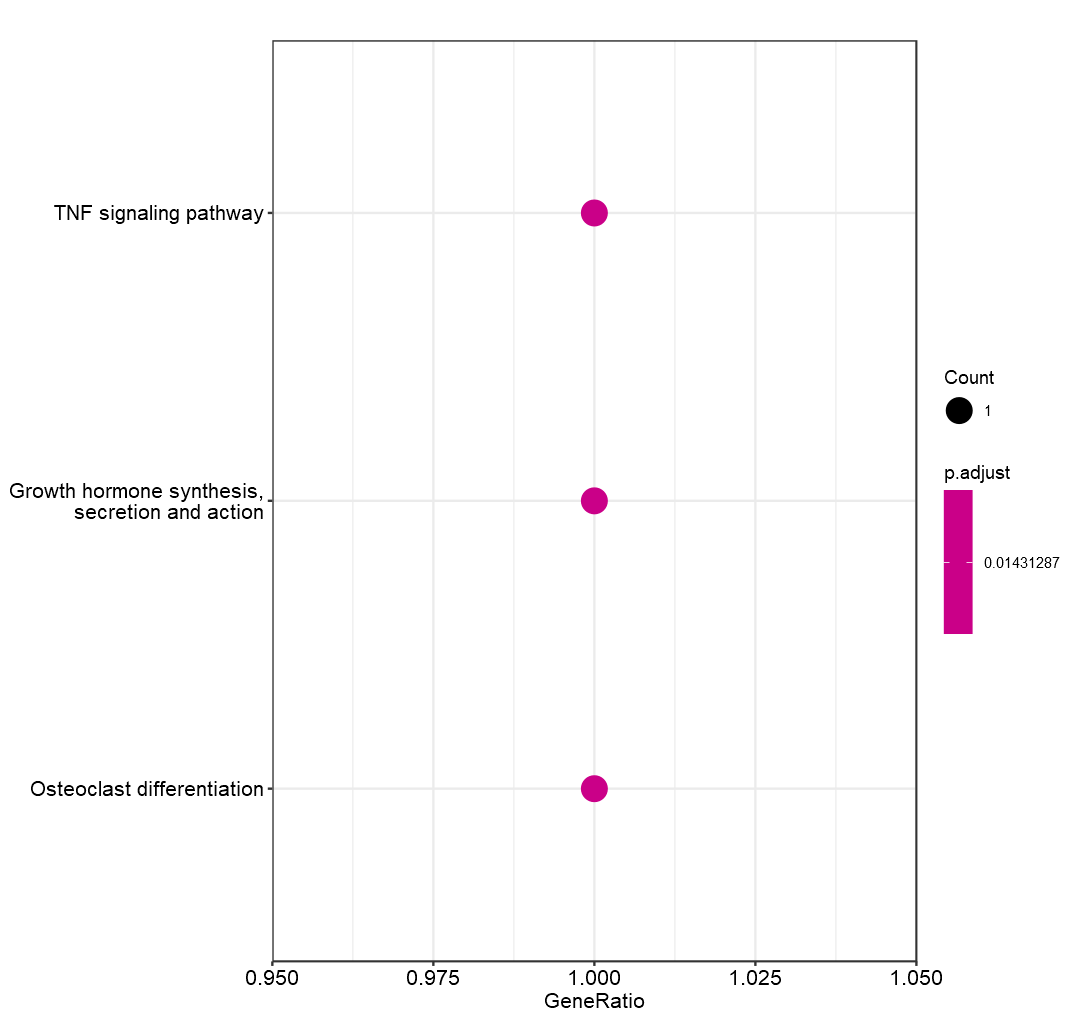

In [42]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS3, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS3 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS3, width=9, height=8.5,
    file=sprintf("TrGS3.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Un.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS3.Plot.CtrVsTGFb_Up_TGFbVsCX5461_Un.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TrGS4)

In [43]:
condstr <- "TrGS4"
TrGS4 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS4))
set.seed(40)
em.bp <- enricher(TrGS4, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS4, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS4, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 262


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,GOBP_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,GOBP_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,44/248,98/16223,1.851659e-54,4.386580e-51,3.950855e-51,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa/Ssr2,44
GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,43/248,111/16223,9.369222e-50,1.109784e-46,9.995480e-47,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,43
GOBP_NUCLEAR_TRANSCRIBED_MRNA_CATABOLIC_PROCESS_NONSENSE_MEDIATED_DECAY,GOBP_NUCLEAR_TRANSCRIBED_MRNA_CATABOLIC_PROCESS_NONSENSE_MEDIATED_DECAY,GOBP_NUCLEAR_TRANSCRIBED_MRNA_CATABOLIC_PROCESS_NONSENSE_MEDIATED_DECAY,43/248,118/16223,2.280088e-48,1.800509e-45,1.621662e-45,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,43
GOBP_TRANSLATIONAL_INITIATION,GOBP_TRANSLATIONAL_INITIATION,GOBP_TRANSLATIONAL_INITIATION,49/248,186/16223,3.393352e-47,2.009713e-44,1.810085e-44,Eif2s3x/Eif3k/Eif4ebp1/Eif5/Npm1/Ppp1ca/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,49
GOBP_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,GOBP_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,GOBP_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM,44/248,138/16223,1.752800e-46,8.304765e-44,7.479842e-44,Bcap31/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,44
GOBP_PROTEIN_TARGETING_TO_MEMBRANE,GOBP_PROTEIN_TARGETING_TO_MEMBRANE,GOBP_PROTEIN_TARGETING_TO_MEMBRANE,47/248,195/16223,2.961044e-43,1.169119e-40,1.052989e-40,Naca/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa/Ssr2/Stom/Vps37b,47


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_RIBOSOME,GOCC_RIBOSOME,GOCC_RIBOSOME,57/234,215/13139,9.393759e-52,3.212666e-49,2.837904e-49,Btf3/Chchd1/Mrpl12/Mrpl13/Mrpl28/Mrpl43/Mrpl57/Mrps18a/Mrps18b/Mrps26/Mrps6/Ndufa7/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,57
GOCC_CYTOSOLIC_RIBOSOME,GOCC_CYTOSOLIC_RIBOSOME,GOCC_CYTOSOLIC_RIBOSOME,44/234,100/13139,3.384597e-51,5.787661e-49,5.112523e-49,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,44
GOCC_RIBOSOMAL_SUBUNIT,GOCC_RIBOSOMAL_SUBUNIT,GOCC_RIBOSOMAL_SUBUNIT,53/234,180/13139,9.827550e-51,1.120341e-48,9.896515e-49,Mrpl12/Mrpl13/Mrpl28/Mrpl43/Mrpl57/Mrps18a/Mrps18b/Mrps26/Mrps6/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,53
GOCC_CYTOSOLIC_SMALL_RIBOSOMAL_SUBUNIT,GOCC_CYTOSOLIC_SMALL_RIBOSOMAL_SUBUNIT,GOCC_CYTOSOLIC_SMALL_RIBOSOMAL_SUBUNIT,25/234,43/13139,2.303257e-33,1.969285e-31,1.739565e-31,Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,25
GOCC_SMALL_RIBOSOMAL_SUBUNIT,GOCC_SMALL_RIBOSOMAL_SUBUNIT,GOCC_SMALL_RIBOSOMAL_SUBUNIT,29/234,71/13139,1.131258e-32,7.737808e-31,6.835183e-31,Mrps18a/Mrps18b/Mrps26/Mrps6/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,29
GOCC_LARGE_RIBOSOMAL_SUBUNIT,GOCC_LARGE_RIBOSOMAL_SUBUNIT,GOCC_LARGE_RIBOSOMAL_SUBUNIT,25/234,111/13139,6.197889e-21,3.532797e-19,3.120692e-19,Mrpl12/Mrpl13/Mrpl28/Mrpl43/Mrpl57/Mrps18a/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2,25


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,54/229,153/14695,8.958790e-60,3.467052e-57,3.112001e-57,Mrpl12/Mrpl13/Mrpl28/Mrpl43/Mrpl57/Mrps18a/Mrps18b/Mrps6/Ndufa7/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl36/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps12/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27a/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,54
GOMF_RRNA_BINDING,GOMF_RRNA_BINDING,GOMF_RRNA_BINDING,15/229,61/14695,1.832724e-14,3.546321e-12,3.183152e-12,Mdm2/Mrps18a/Mrps6/Rpl11/Rpl23/Rpl3/Rpl37/Rpl8/Rplp0/Rps11/Rps14/Rps3/Rps4x/Rps5/Rps9,15
GOMF_ELECTRON_TRANSFER_ACTIVITY,GOMF_ELECTRON_TRANSFER_ACTIVITY,GOMF_ELECTRON_TRANSFER_ACTIVITY,19/229,133/14695,2.164859e-13,2.792669e-11,2.506679e-11,Cox4i1/Cox5b/Cox6a1/Cox7a2/Cox7b/Cox8a/Ndufa2/Ndufa5/Ndufa6/Ndufa7/Ndufa8/Ndufb2/Ndufb8/Ndufb9/Ndufs3/Ndufv3/Sdhd/Uqcr10/Uqcrq,19
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H_QUINONE_OR_SIMILAR_COMPOUND_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H_QUINONE_OR_SIMILAR_COMPOUND_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H_QUINONE_OR_SIMILAR_COMPOUND_AS_ACCEPTOR,11/229,57/14695,1.017463e-09,9.843951e-08,8.835860e-08,Dcxr/Ndufa2/Ndufa5/Ndufa6/Ndufa7/Ndufa8/Ndufb2/Ndufb8/Ndufb9/Ndufs3/Ndufv3,11
GOMF_NAD_P_H_DEHYDROGENASE_QUINONE_ACTIVITY,GOMF_NAD_P_H_DEHYDROGENASE_QUINONE_ACTIVITY,GOMF_NAD_P_H_DEHYDROGENASE_QUINONE_ACTIVITY,10/229,47/14695,2.170131e-09,1.679682e-07,1.507670e-07,Ndufa2/Ndufa5/Ndufa6/Ndufa7/Ndufa8/Ndufb2/Ndufb8/Ndufb9/Ndufs3/Ndufv3,10
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_NAD_P_H,12/229,98/14695,3.835716e-08,2.474037e-06,2.220678e-06,Cyb5r1/Dcxr/Ndufa2/Ndufa5/Ndufa6/Ndufa7/Ndufa8/Ndufb2/Ndufb8/Ndufb9/Ndufs3/Ndufv3,12


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS4, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"0.38% of input gene IDs are fail to map..."


[1] 20  9

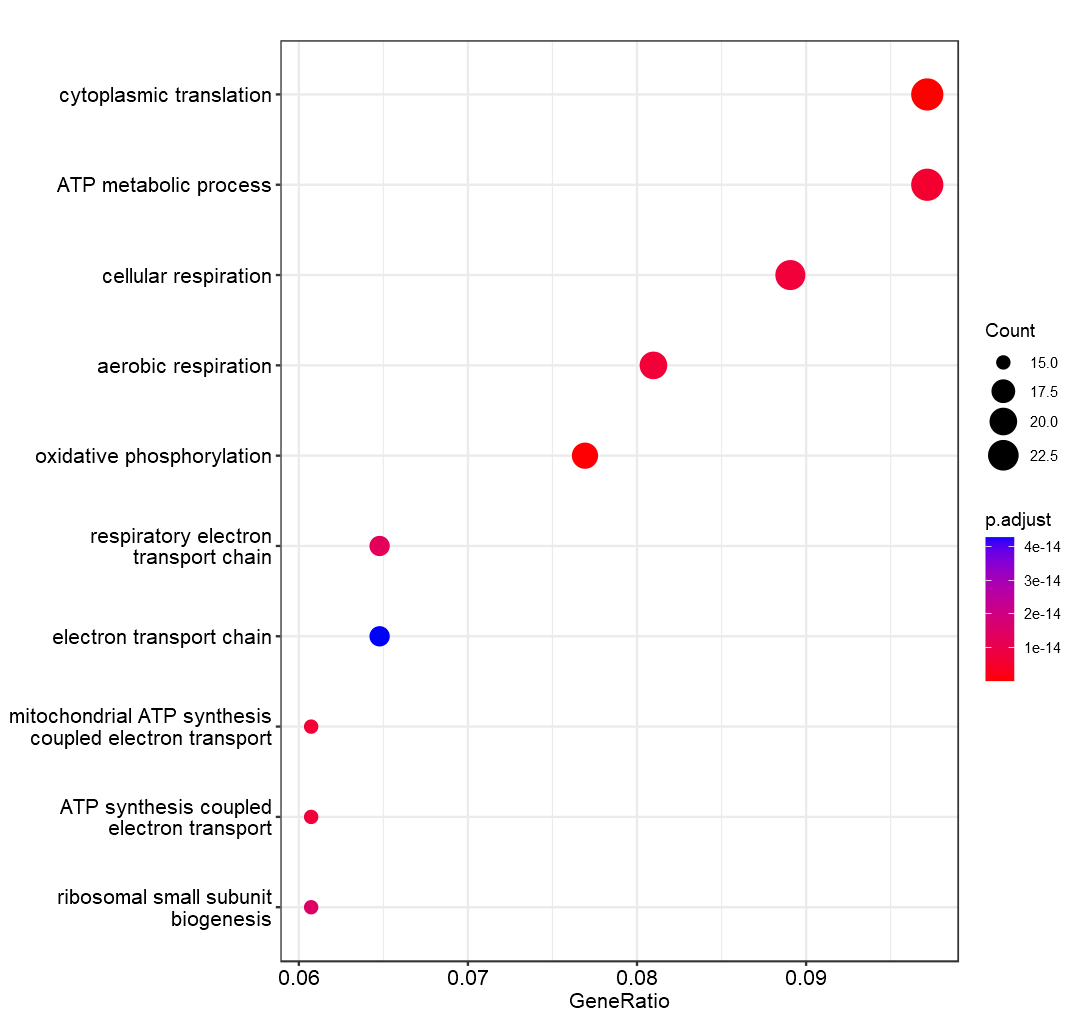

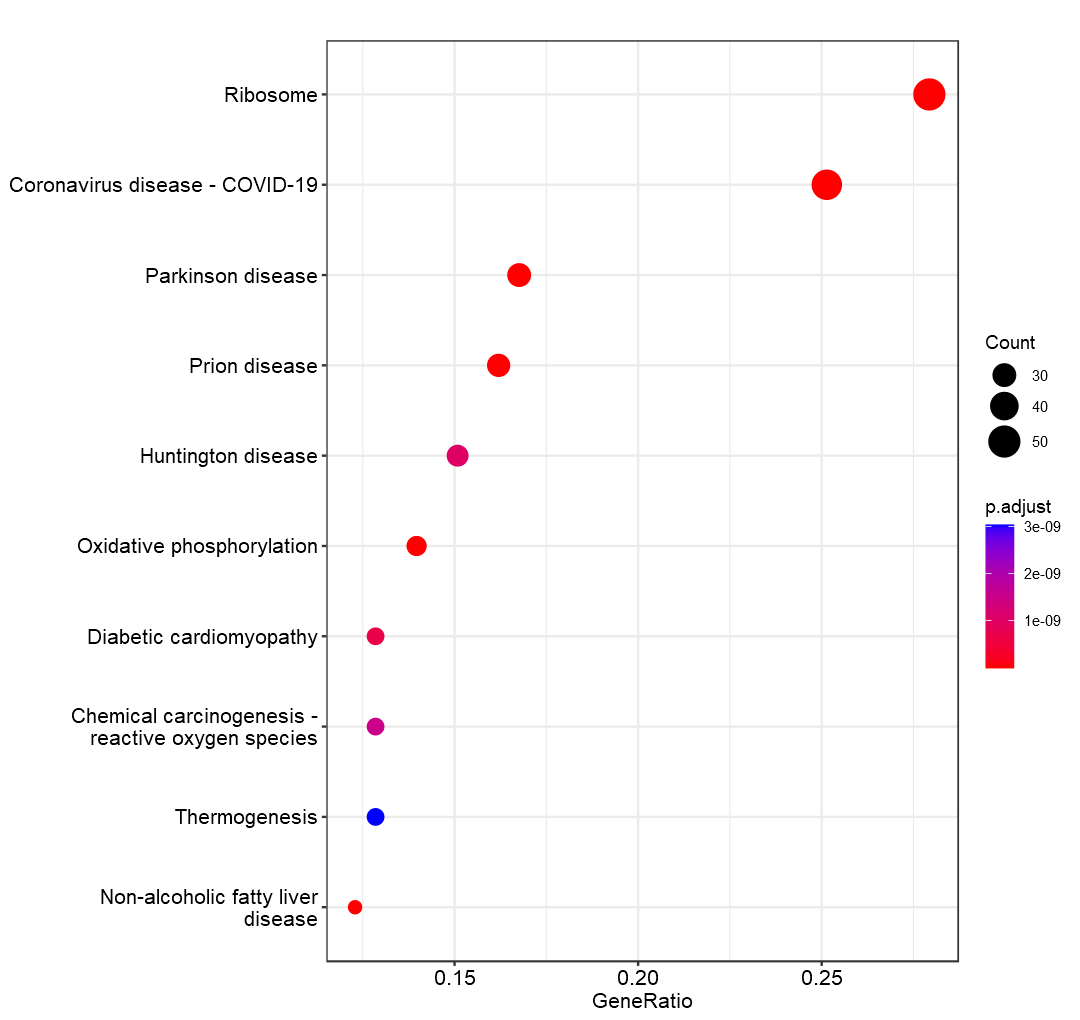

In [44]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS4, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS4 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS4, width=9, height=8.5,
    file=sprintf("TrGS4.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS4.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Up.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TrGS5)

In [45]:
condstr <- "TrGS5"
TrGS5 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: %d\n", length(TrGS5))
set.seed(40)
em.bp <- enricher(TrGS5, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS5, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS5, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: 41


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_FRUCTOSE_METABOLIC_PROCESS,GOBP_FRUCTOSE_METABOLIC_PROCESS,GOBP_FRUCTOSE_METABOLIC_PROCESS,3/39,15/16223,5.728866e-06,0.007785529,0.005602228,Aldh1a1/Aldoa/Aldoc,3
GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,GOBP_REGULATION_OF_ASTROCYTE_DIFFERENTIATION,3/39,24/16223,2.510513e-05,0.010883074,0.007831126,Epha4/Ldlr/Notch1,3
GOBP_STEROL_BIOSYNTHETIC_PROCESS,GOBP_STEROL_BIOSYNTHETIC_PROCESS,GOBP_STEROL_BIOSYNTHETIC_PROCESS,4/39,77/16223,3.401245e-05,0.010883074,0.007831126,Lbr/Scd1/Scd2/Srebf2,4
GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS,GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS,GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS,7/39,415/16223,5.164626e-05,0.010883074,0.007831126,Abhd2/Acox2/Aldh1a1/Aldoa/Aldoc/Crot/Glul,7
GOBP_STEROL_METABOLIC_PROCESS,GOBP_STEROL_METABOLIC_PROCESS,GOBP_STEROL_METABOLIC_PROCESS,5/39,171/16223,5.286102e-05,0.010883074,0.007831126,Lbr/Ldlr/Scd1/Scd2/Srebf2,5
GOBP_POSITIVE_REGULATION_OF_PROTEIN_CATABOLIC_PROCESS_IN_THE_VACUOLE,GOBP_POSITIVE_REGULATION_OF_PROTEIN_CATABOLIC_PROCESS_IN_THE_VACUOLE,GOBP_POSITIVE_REGULATION_OF_PROTEIN_CATABOLIC_PROCESS_IN_THE_VACUOLE,2/39,5/16223,5.605704e-05,0.010883074,0.007831126,Ldlr/Rnf128,2


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_OXIDATION_OF_A_PAIR_OF_DONORS_RESULTING_IN_THE_REDUCTION_OF_MOLECULAR_OXYGEN_TO_TWO_MOLECULES_OF_WATER,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_OXIDATION_OF_A_PAIR_OF_DONORS_RESULTING_IN_THE_REDUCTION_OF_MOLECULAR_OXYGEN_TO_TWO_MOLECULES_OF_WATER,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_PAIRED_DONORS_WITH_OXIDATION_OF_A_PAIR_OF_DONORS_RESULTING_IN_THE_REDUCTION_OF_MOLECULAR_OXYGEN_TO_TWO_MOLECULES_OF_WATER,2/39,5/14695,6.828885e-05,0.01218924,0.008275853,Scd1/Scd2,2
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS_NAD_OR_NADP_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS_NAD_OR_NADP_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS_NAD_OR_NADP_AS_ACCEPTOR,3/39,37/14695,1.261598e-04,0.01218924,0.008275853,Aldh18a1/Aldh1a1/Pdha1,3
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_THE_ALDEHYDE_OR_OXO_GROUP_OF_DONORS,3/39,45/14695,2.270430e-04,0.01218924,0.008275853,Aldh18a1/Aldh1a1/Pdha1,3
GOMF_CARBON_CARBON_LYASE_ACTIVITY,GOMF_CARBON_CARBON_LYASE_ACTIVITY,GOMF_CARBON_CARBON_LYASE_ACTIVITY,3/39,49/14695,2.926335e-04,0.01218924,0.008275853,Aldoa/Aldoc/Me1,3
GOMF_ALDEHYDE_LYASE_ACTIVITY,GOMF_ALDEHYDE_LYASE_ACTIVITY,GOMF_ALDEHYDE_LYASE_ACTIVITY,2/39,10/14695,3.047310e-04,0.01218924,0.008275853,Aldoa/Aldoc,2
GOMF_AMINOACYL_TRNA_EDITING_ACTIVITY,GOMF_AMINOACYL_TRNA_EDITING_ACTIVITY,GOMF_AMINOACYL_TRNA_EDITING_ACTIVITY,2/39,13/14695,5.255485e-04,0.01751828,0.011893992,Lars2/Vars,2


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS5, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), :
"2.44% of input gene IDs are fail to map..."


[1] 4 9

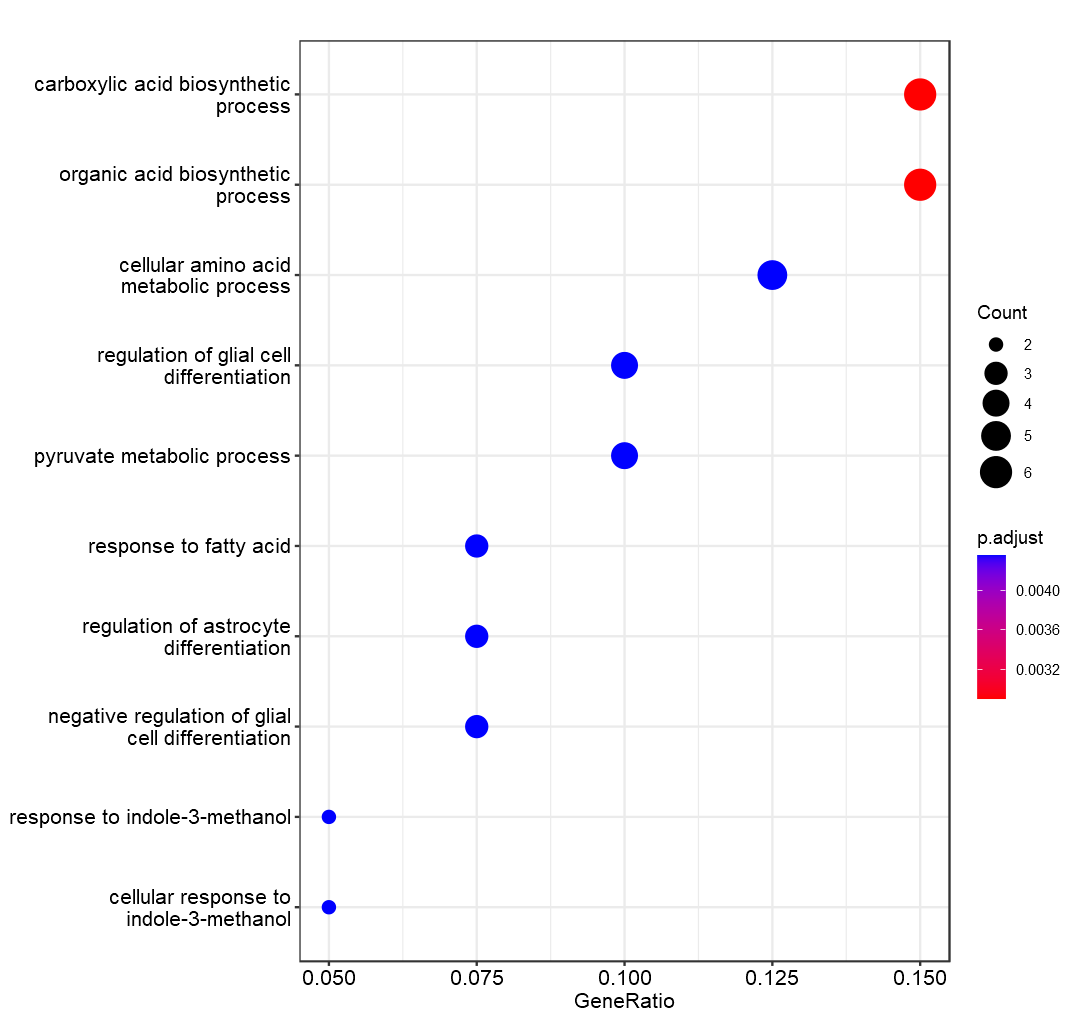

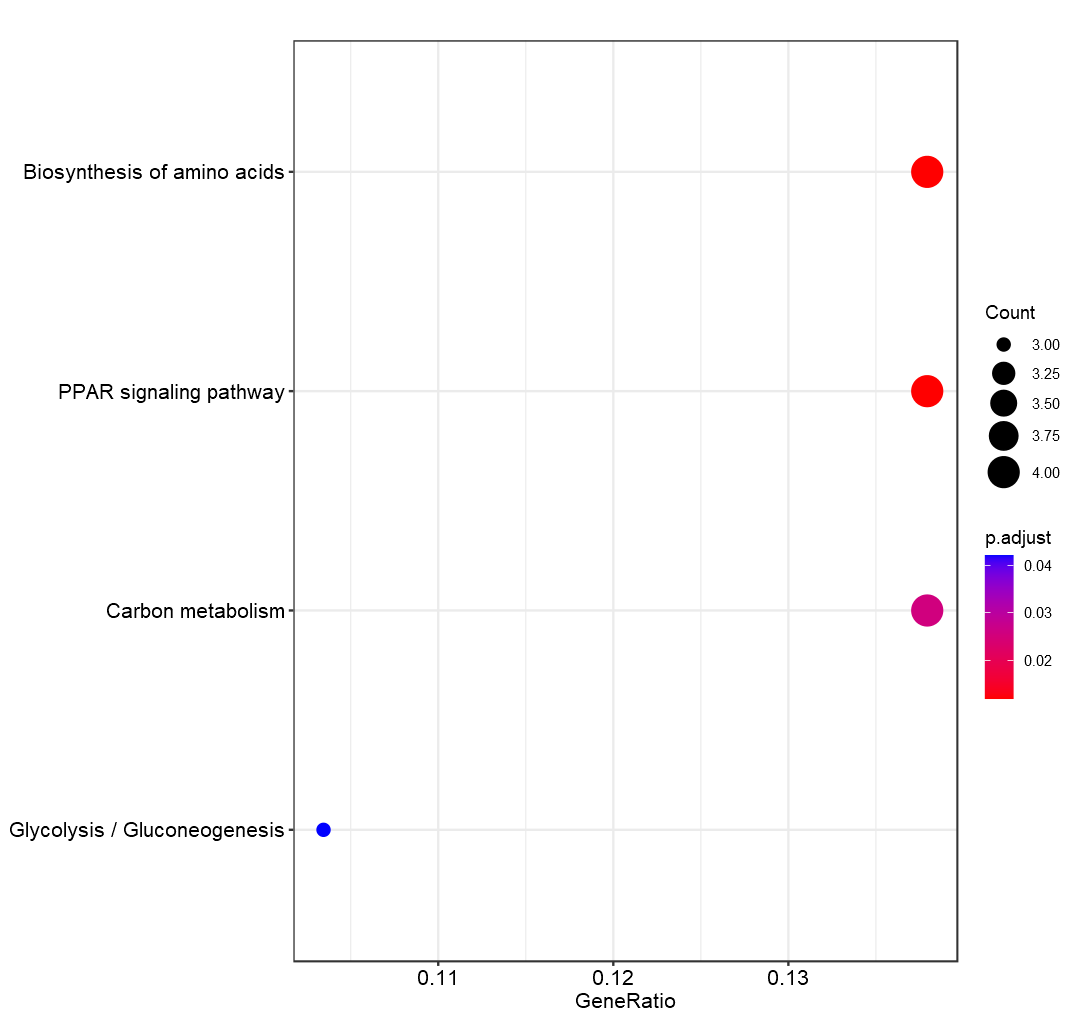

In [46]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS5, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS5 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS5, width=9, height=8.5,
    file=sprintf("TrGS5.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS5.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Dn.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TrGS6)

In [47]:
condstr <- "TrGS6"
TrGS6 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: %d\n", length(TrGS6))
set.seed(40)
em.bp <- enricher(TrGS6, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS6, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS6, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: 2


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_PYRUVATE_BIOSYNTHETIC_PROCESS,GOBP_PYRUVATE_BIOSYNTHETIC_PROCESS,GOBP_PYRUVATE_BIOSYNTHETIC_PROCESS,1/2,6/16223,0.0007395766,0.01897778,0.001816056,Pkm,1
GOBP_RESPONSE_TO_MUSCLE_INACTIVITY,GOBP_RESPONSE_TO_MUSCLE_INACTIVITY,GOBP_RESPONSE_TO_MUSCLE_INACTIVITY,1/2,11/16223,0.0013556814,0.01897778,0.001816056,Pkm,1
GOBP_POSITIVE_REGULATION_OF_CYTOPLASMIC_TRANSLATION,GOBP_POSITIVE_REGULATION_OF_CYTOPLASMIC_TRANSLATION,GOBP_POSITIVE_REGULATION_OF_CYTOPLASMIC_TRANSLATION,1/2,12/16223,0.0014788795,0.01897778,0.001816056,Pkm,1
GOBP_RESPONSE_TO_GRAVITY,GOBP_RESPONSE_TO_GRAVITY,GOBP_RESPONSE_TO_GRAVITY,1/2,12/16223,0.0014788795,0.01897778,0.001816056,Pkm,1
GOBP_RESPONSE_TO_INACTIVITY,GOBP_RESPONSE_TO_INACTIVITY,GOBP_RESPONSE_TO_INACTIVITY,1/2,14/16223,0.0017252531,0.01897778,0.001816056,Pkm,1
GOBP_REGULATION_OF_CYTOPLASMIC_TRANSLATION,GOBP_REGULATION_OF_CYTOPLASMIC_TRANSLATION,GOBP_REGULATION_OF_CYTOPLASMIC_TRANSLATION,1/2,21/16223,0.0025873210,0.02371711,0.002269580,Pkm,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,2/2,423/13139,0.001034097,0.01344326,0.003265569,Pkm/S100a6,2
GOCC_ROUGH_ENDOPLASMIC_RETICULUM,GOCC_ROUGH_ENDOPLASMIC_RETICULUM,GOCC_ROUGH_ENDOPLASMIC_RETICULUM,1/2,76/13139,0.011535592,0.04617183,0.011215829,Pkm,1
GOCC_EXTRINSIC_COMPONENT_OF_CYTOPLASMIC_SIDE_OF_PLASMA_MEMBRANE,GOCC_EXTRINSIC_COMPONENT_OF_CYTOPLASMIC_SIDE_OF_PLASMA_MEMBRANE,GOCC_EXTRINSIC_COMPONENT_OF_CYTOPLASMIC_SIDE_OF_PLASMA_MEMBRANE,1/2,100/13139,0.015164507,0.04617183,0.011215829,S100a6,1
GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,1/2,126/13139,0.019088301,0.04617183,0.011215829,Pkm,1
GOCC_EXTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,GOCC_EXTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,GOCC_EXTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,1/2,169/13139,0.025560464,0.04617183,0.011215829,S100a6,1
GOCC_RUFFLE,GOCC_RUFFLE,GOCC_RUFFLE,1/2,174/13139,0.026311651,0.04617183,0.011215829,S100a6,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_THYROID_HORMONE_BINDING,GOMF_THYROID_HORMONE_BINDING,GOMF_THYROID_HORMONE_BINDING,1/2,7/14695,0.0009525105,0.005304857,0.0004295431,Pkm,1
GOMF_POTASSIUM_ION_BINDING,GOMF_POTASSIUM_ION_BINDING,GOMF_POTASSIUM_ION_BINDING,1/2,11/14695,0.0014965984,0.005304857,0.0004295431,Pkm,1
GOMF_S100_PROTEIN_BINDING,GOMF_S100_PROTEIN_BINDING,GOMF_S100_PROTEIN_BINDING,1/2,14/14695,0.0019045671,0.005304857,0.0004295431,S100a6,1
GOMF_ALKALI_METAL_ION_BINDING,GOMF_ALKALI_METAL_ION_BINDING,GOMF_ALKALI_METAL_ION_BINDING,1/2,16/14695,0.0021765000,0.005304857,0.0004295431,Pkm,1
GOMF_TROPOMYOSIN_BINDING,GOMF_TROPOMYOSIN_BINDING,GOMF_TROPOMYOSIN_BINDING,1/2,16/14695,0.0021765000,0.005304857,0.0004295431,S100a6,1
GOMF_MHC_CLASS_II_PROTEIN_COMPLEX_BINDING,GOMF_MHC_CLASS_II_PROTEIN_COMPLEX_BINDING,GOMF_MHC_CLASS_II_PROTEIN_COMPLEX_BINDING,1/2,18/14695,0.0024483957,0.005304857,0.0004295431,Pkm,1


'select()' returned 1:1 mapping between keys and columns



[1] 9 9

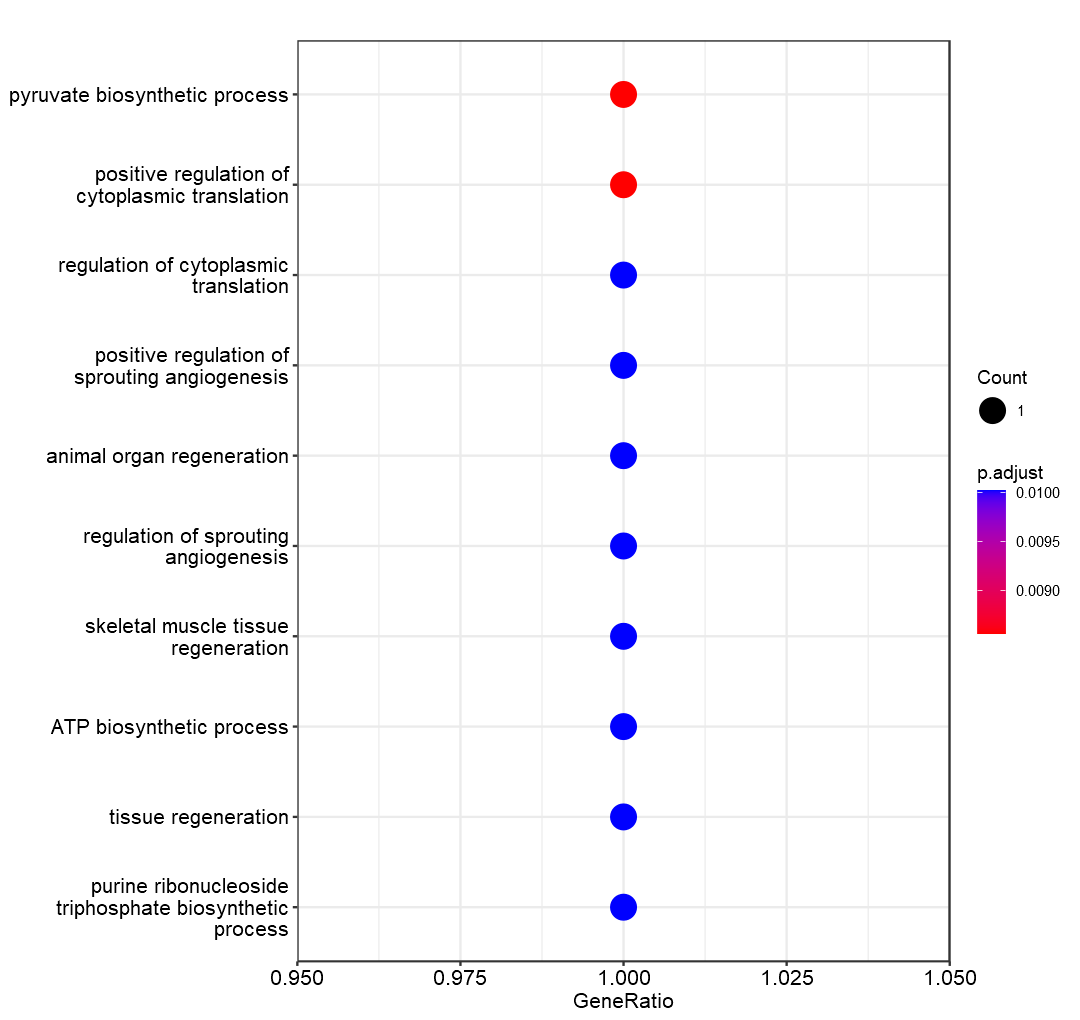

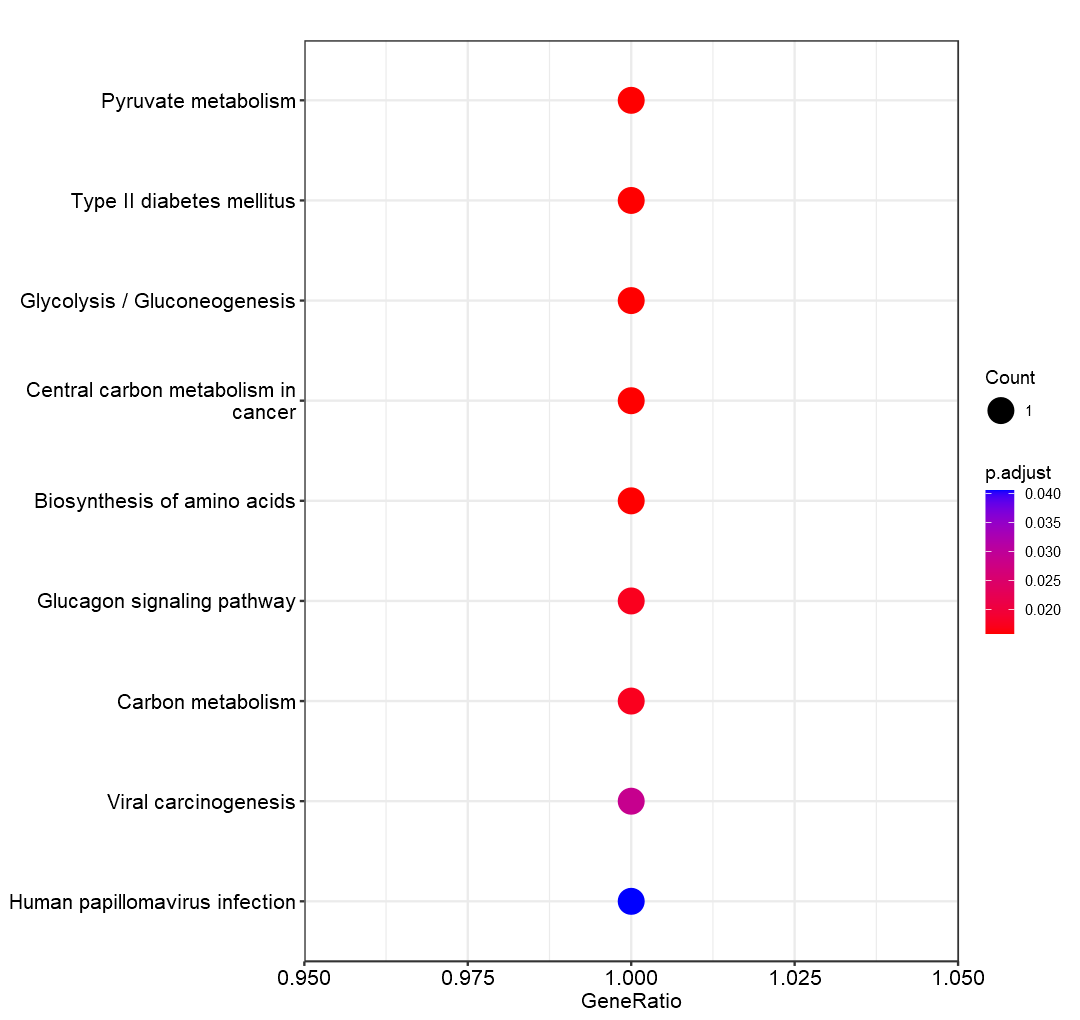

In [48]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS6, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS6 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS6, width=9, height=8.5,
    file=sprintf("TrGS6.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Un.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS6.Plot.CtrVsTGFb_Dn_TGFbVsCX5461_Un.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TrGS7)

In [49]:
condstr <- "TrGS7"
TrGS7 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: %d\n", length(TrGS7))
set.seed(40)
em.bp <- enricher(TrGS7, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS7, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS7, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: 1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
GOBP_SEQUESTERING_OF_IRON_ION,GOBP_SEQUESTERING_OF_IRON_ION,GOBP_SEQUESTERING_OF_IRON_ION,1/1,7/16223,0.0004314862,0.005177834,NA,Fth1,1
GOBP_SEQUESTERING_OF_METAL_ION,GOBP_SEQUESTERING_OF_METAL_ION,GOBP_SEQUESTERING_OF_METAL_ION,1/1,15/16223,0.0009246132,0.005547679,NA,Fth1,1
GOBP_NEGATIVE_REGULATION_OF_FIBROBLAST_PROLIFERATION,GOBP_NEGATIVE_REGULATION_OF_FIBROBLAST_PROLIFERATION,GOBP_NEGATIVE_REGULATION_OF_FIBROBLAST_PROLIFERATION,1/1,32/16223,0.0019725082,0.007890033,NA,Fth1,1
GOBP_CELLULAR_IRON_ION_HOMEOSTASIS,GOBP_CELLULAR_IRON_ION_HOMEOSTASIS,GOBP_CELLULAR_IRON_ION_HOMEOSTASIS,1/1,67/16223,0.0041299390,0.008770617,NA,Fth1,1
GOBP_IRON_ION_TRANSPORT,GOBP_IRON_ION_TRANSPORT,GOBP_IRON_ION_TRANSPORT,1/1,77/16223,0.0047463478,0.008770617,NA,Fth1,1
GOBP_FIBROBLAST_PROLIFERATION,GOBP_FIBROBLAST_PROLIFERATION,GOBP_FIBROBLAST_PROLIFERATION,1/1,81/16223,0.0049929113,0.008770617,NA,Fth1,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
GOCC_AUTOLYSOSOME,GOCC_AUTOLYSOSOME,GOCC_AUTOLYSOSOME,1/1,10/13139,0.0007610929,0.00426212,NA,Fth1,1
GOCC_SECONDARY_LYSOSOME,GOCC_SECONDARY_LYSOSOME,GOCC_SECONDARY_LYSOSOME,1/1,16/13139,0.0012177487,0.00426212,NA,Fth1,1
GOCC_TERTIARY_GRANULE_LUMEN,GOCC_TERTIARY_GRANULE_LUMEN,GOCC_TERTIARY_GRANULE_LUMEN,1/1,57/13139,0.0043382297,0.01012254,NA,Fth1,1
GOCC_AUTOPHAGOSOME,GOCC_AUTOPHAGOSOME,GOCC_AUTOPHAGOSOME,1/1,96/13139,0.0073064921,0.01278636,NA,Fth1,1
GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,GOCC_FICOLIN_1_RICH_GRANULE_LUMEN,1/1,126/13139,0.0095897709,0.01342568,NA,Fth1,1
GOCC_TERTIARY_GRANULE,GOCC_TERTIARY_GRANULE,GOCC_TERTIARY_GRANULE,1/1,162/13139,0.0123297055,0.01400411,NA,Fth1,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS_OXYGEN_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS_OXYGEN_AS_ACCEPTOR,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS_OXYGEN_AS_ACCEPTOR,1/1,9/14695,0.0006124532,0.001701259,NA,Fth1,1
GOMF_FERRIC_IRON_BINDING,GOMF_FERRIC_IRON_BINDING,GOMF_FERRIC_IRON_BINDING,1/1,10/14695,0.0006805036,0.001701259,NA,Fth1,1
GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS,GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_METAL_IONS,1/1,18/14695,0.0012249064,0.002041511,NA,Fth1,1
GOMF_FERROUS_IRON_BINDING,GOMF_FERROUS_IRON_BINDING,GOMF_FERROUS_IRON_BINDING,1/1,26/14695,0.0017693093,0.002211637,NA,Fth1,1
GOMF_IRON_ION_BINDING,GOMF_IRON_ION_BINDING,GOMF_IRON_ION_BINDING,1/1,154/14695,0.0104797550,0.010479755,NA,Fth1,1


'select()' returned 1:1 mapping between keys and columns



[1] 3 9

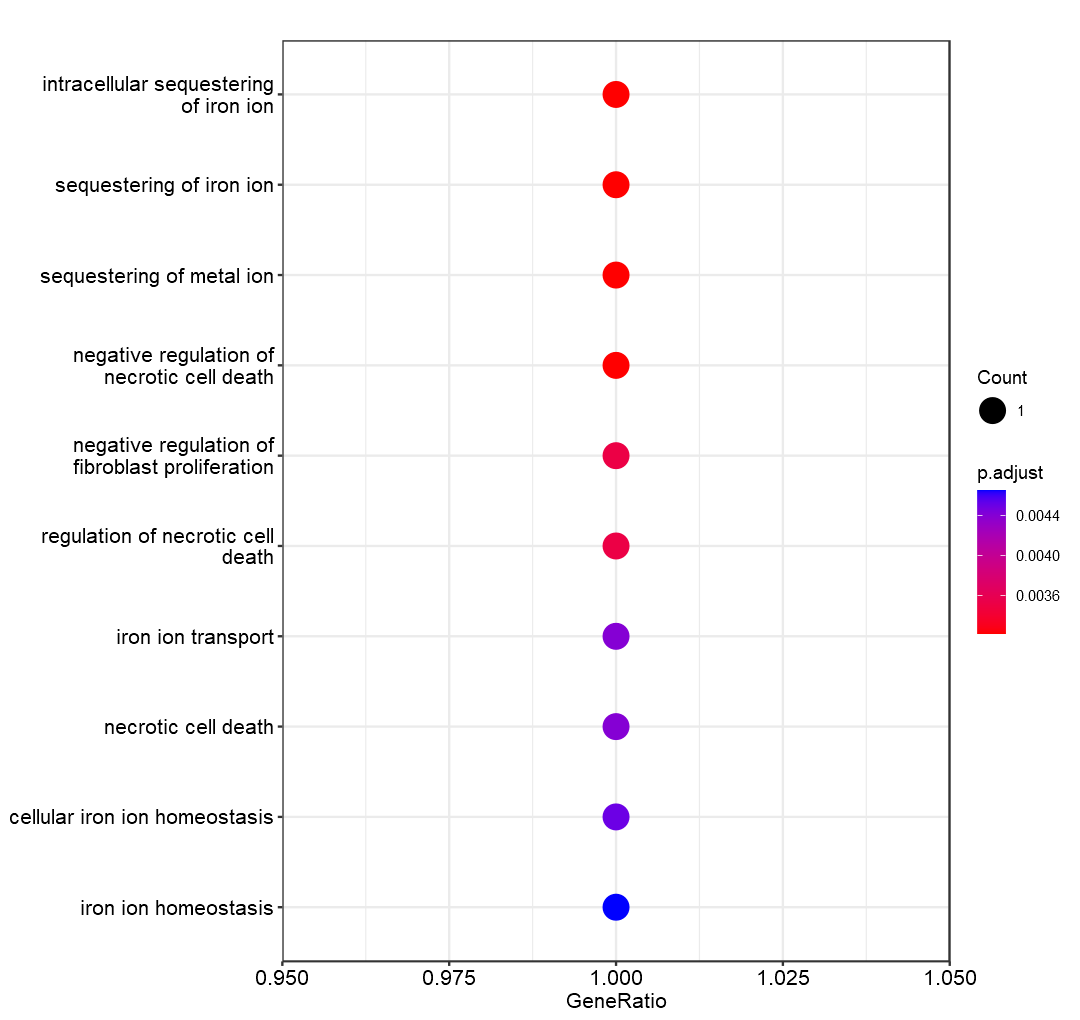

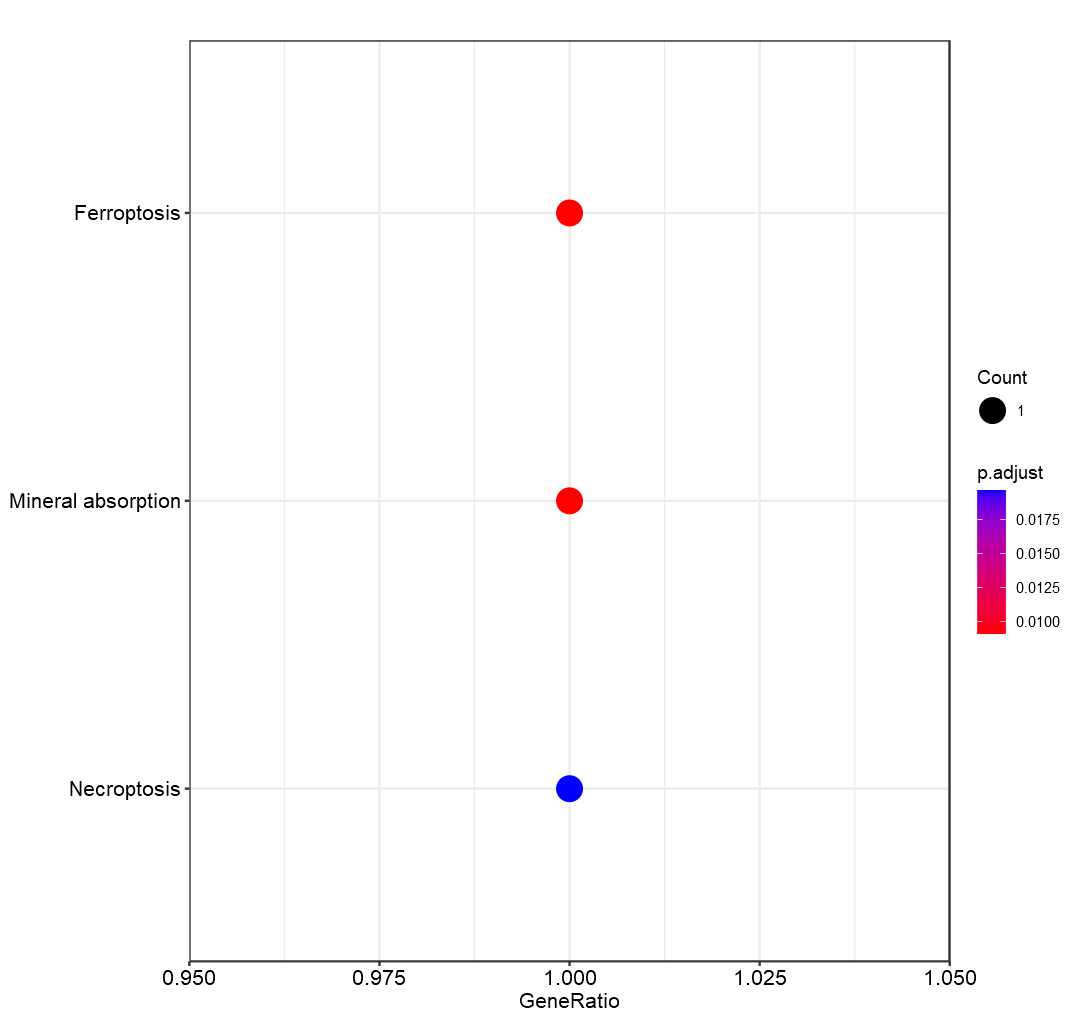

In [50]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS7, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS7 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS7, width=9, height=8.5,
    file=sprintf("TrGS7.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Up.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS7.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Up.KEGG.Top10"))

### Translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TrGS8)

In [51]:
condstr <- "TrGS8"
TrGS8 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: %d\n", length(TrGS8))
set.seed(40)
em.bp <- enricher(TrGS8, TERM2GENE=gmt_mus.bp, minGSSize = 5)
em.cc <- enricher(TrGS8, TERM2GENE=gmt_mus.cc, minGSSize = 5)
em.mf <- enricher(TrGS8, TERM2GENE=gmt_mus.mf, minGSSize = 5)
head(em.bp); head(em.cc); head(em.mf)

write.table(em.bp, file = sprintf('table/Table.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.cc, file = sprintf('table/Table.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
write.table(em.mf, file = sprintf('table/Table.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: 5


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_RESPONSE_TO_INTERLEUKIN_4,GOBP_RESPONSE_TO_INTERLEUKIN_4,GOBP_RESPONSE_TO_INTERLEUKIN_4,2/5,35/16223,4.503429e-05,0.01184402,0.005167093,Fasn/Hsp90ab1,2
GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,2/5,200/16223,1.475748e-03,0.04208772,0.018361261,Hsp90ab1/Lmna,2
GOBP_ENERGY_COUPLED_PROTON_TRANSMEMBRANE_TRANSPORT_AGAINST_ELECTROCHEMICAL_GRADIENT,GOBP_ENERGY_COUPLED_PROTON_TRANSMEMBRANE_TRANSPORT_AGAINST_ELECTROCHEMICAL_GRADIENT,GOBP_ENERGY_COUPLED_PROTON_TRANSMEMBRANE_TRANSPORT_AGAINST_ELECTROCHEMICAL_GRADIENT,1/5,5/16223,1.540262e-03,0.04208772,0.018361261,Ndufs7,1
GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLARITY,GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLARITY,GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLARITY,2/5,211/16223,1.640734e-03,0.04208772,0.018361261,Hsp90ab1/Lmna,2
GOBP_PROTEIN_FOLDING,GOBP_PROTEIN_FOLDING,GOBP_PROTEIN_FOLDING,2/5,214/16223,1.687206e-03,0.04208772,0.018361261,Ganab/Hsp90ab1,2
GOBP_CHROMOSOME_ATTACHMENT_TO_THE_NUCLEAR_ENVELOPE,GOBP_CHROMOSOME_ATTACHMENT_TO_THE_NUCLEAR_ENVELOPE,GOBP_CHROMOSOME_ATTACHMENT_TO_THE_NUCLEAR_ENVELOPE,1/5,6/16223,1.848087e-03,0.04208772,0.018361261,Lmna,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_PIGMENT_GRANULE,GOCC_PIGMENT_GRANULE,GOCC_PIGMENT_GRANULE,3/5,105/13139,4.902298e-06,0.0002206034,0.0001083666,Fasn/Ganab/Hsp90ab1,3
GOCC_GLYCOGEN_GRANULE,GOCC_GLYCOGEN_GRANULE,GOCC_GLYCOGEN_GRANULE,1/5,7/13139,2.661393e-03,0.0277766686,0.0136446793,Fasn,1
GOCC_ARYL_HYDROCARBON_RECEPTOR_COMPLEX,GOCC_ARYL_HYDROCARBON_RECEPTOR_COMPLEX,GOCC_ARYL_HYDROCARBON_RECEPTOR_COMPLEX,1/5,8/13139,3.041129e-03,0.0277766686,0.0136446793,Hsp90ab1,1
GOCC_SPERM_HEAD_PLASMA_MEMBRANE,GOCC_SPERM_HEAD_PLASMA_MEMBRANE,GOCC_SPERM_HEAD_PLASMA_MEMBRANE,1/5,8/13139,3.041129e-03,0.0277766686,0.0136446793,Hsp90ab1,1
GOCC_DENDRITIC_GROWTH_CONE,GOCC_DENDRITIC_GROWTH_CONE,GOCC_DENDRITIC_GROWTH_CONE,1/5,9/13139,3.420749e-03,0.0277766686,0.0136446793,Hsp90ab1,1
GOCC_NUCLEAR_LAMINA,GOCC_NUCLEAR_LAMINA,GOCC_NUCLEAR_LAMINA,1/5,10/13139,3.800254e-03,0.0277766686,0.0136446793,Lmna,1


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_PURINE_DEOXYRIBONUCLEOTIDE_BINDING,GOMF_PURINE_DEOXYRIBONUCLEOTIDE_BINDING,GOMF_PURINE_DEOXYRIBONUCLEOTIDE_BINDING,1/4,5/14695,0.001360451,0.01504137,0.001899962,Hsp90ab1,1
GOMF_ALPHA_GLUCOSIDASE_ACTIVITY,GOMF_ALPHA_GLUCOSIDASE_ACTIVITY,GOMF_ALPHA_GLUCOSIDASE_ACTIVITY,1/4,6/14695,0.001632375,0.01504137,0.001899962,Ganab,1
GOMF_ATP_DEPENDENT_PROTEIN_BINDING,GOMF_ATP_DEPENDENT_PROTEIN_BINDING,GOMF_ATP_DEPENDENT_PROTEIN_BINDING,1/4,6/14695,0.001632375,0.01504137,0.001899962,Hsp90ab1,1
GOMF_PYRIMIDINE_NUCLEOTIDE_BINDING,GOMF_PYRIMIDINE_NUCLEOTIDE_BINDING,GOMF_PYRIMIDINE_NUCLEOTIDE_BINDING,1/4,6/14695,0.001632375,0.01504137,0.001899962,Hsp90ab1,1
GOMF_DEOXYRIBONUCLEOTIDE_BINDING,GOMF_DEOXYRIBONUCLEOTIDE_BINDING,GOMF_DEOXYRIBONUCLEOTIDE_BINDING,1/4,7/14695,0.001904243,0.01504137,0.001899962,Hsp90ab1,1
GOMF_TPR_DOMAIN_BINDING,GOMF_TPR_DOMAIN_BINDING,GOMF_TPR_DOMAIN_BINDING,1/4,7/14695,0.001904243,0.01504137,0.001899962,Hsp90ab1,1


'select()' returned 1:1 mapping between keys and columns



[1] 0 9

ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


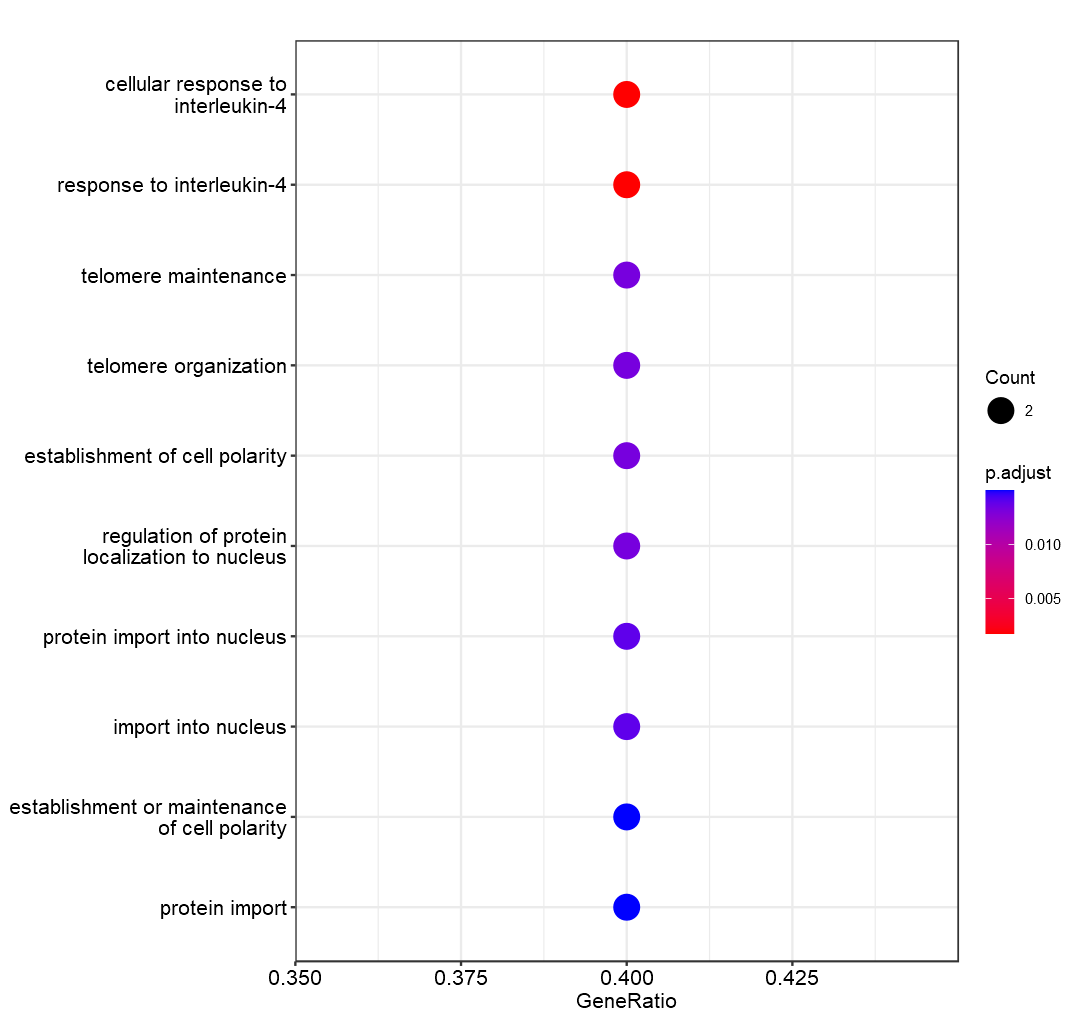

In [52]:
n_top_egmt <- 10
################################################
entrez.id <- bitr(TrGS8, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05, minGSSize = 5, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)
gg.TrGS8 <- dotplot(egmt_rna_only_up, showCategory=n_top_egmt)
print_figure(gg.TrGS8, width=9, height=8.5,
    file=sprintf("TrGS8.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Dn.enricher.go.Top10"))

##############################
### KEGG Pathway analysis
##############################
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", , minGSSize = 5, qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("TrGS8.Plot.CtrVsTGFb_Un_TGFbVsCX5461_Dn.KEGG.Top10"))

# <font color='blue'> KEGG Hallmark (H) pathway analysis by using <u>*msigdbr*</u> and <u>*ClusterProfiler*</u> </font>

### <font color='green'> Making <u>*msigdbr*</u> hallmark pathways data as table for the <u>*clusterProfiler*</u>  <u>enricher</u> function

In [53]:
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

In [54]:
condstr ="TGS1"
################################################
gsea_h_gene_sets <- enricher(gene = TGS1, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,24/96,200/4402,2.287716e-12,8.922091e-11,7.224365e-11,Atf3/Bhlhe40/Ccl2/Ccn1/Clcf1/Csf1/Dusp1/Dusp4/Edn1/Ehd1/F3/Fosl2/Gadd45b/Jun/Lamb3/Lif/Map2k3/Nfkbia/Phlda1/Plk2/Ppp1r15a/Rela/Sqstm1/Tnfaip3,24
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,17/96,200/4402,9.888748e-07,1.928306e-05,1.561381e-05,Aen/Atf3/Blcap/Cd81/Ctsd/Hmox1/Jun/Lif/Ndrg1/Phlda3/Plk2/Pmm1/Ppp1r15a/Ptpn14/Rhbdf2/Tcn2/Zmat3,17
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,15/96,201/4402,2.287200e-05,2.973360e-04,2.407579e-04,Angptl4/Atf3/Bhlhe40/Ccn1/Dusp1/Eno3/F3/Fosl2/Hmox1/Jun/Ndrg1/Plin2/Ppp1r15a/Tgm2/Tnfaip3,15
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,13/96,199/4402,3.253534e-04,3.172196e-03,2.568579e-03,Bhlhe40/Cd81/Csf1/Ecm1/Eno3/Gadd45b/Lif/Myo1c/Ndrg1/Phlda1/Plec/Plin2/Tgm2,13
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,11/96,201/4402,3.978183e-03,3.102983e-02,2.512536e-02,Acta1/Atp6ap1/Bhlhe40/Eno3/Fst/Gadd45b/Gnao1/Gsn/Mapre3/Myo1c/Ptp4a3,11


[1] 5 9

In [55]:
condstr ="TGS2"
################################################
gsea_h_gene_sets <- enricher(gene = TGS2, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


[1] 0 9

In [56]:
condstr ="TGS3"
################################################
gsea_h_gene_sets <- enricher(gene = TGS3, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,18/81,207/4402,2.004544e-08,7.617268e-07,6.963153e-07,Basp1/Calu/Capg/Ccn2/Cdh6/Col4a2/Flna/Fn1/Inhba/Itga5/Itgb3/Plaur/Sat1/Slc6a8/Thbs1/Timp1/Tnfrsf12a/Tpm1,18
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,11/81,197/4402,8.425858e-04,8.707289e-03,7.959572e-03,Clu/Col4a2/Ctsb/Dusp5/Dyrk2/Fn1/Maff/Pdgfb/Plaur/Src/Timp1,11
HALLMARK_COAGULATION,HALLMARK_COAGULATION,HALLMARK_COAGULATION,9/81,139/4402,9.089535e-04,8.707289e-03,7.959572e-03,Clu/Ctsb/Fn1/Itgb3/Maff/Pdgfb/Prss23/Thbs1/Timp1,9
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,11/81,199/4402,9.165568e-04,8.707289e-03,7.959572e-03,Actn1/Actn4/Cap1/Cdh6/Cnn2/Inppl1/Nectin1/Pcdh1/Pkd1/Src/Zyx,11


[1] 4 9

In [57]:
condstr ="TGS4"
################################################
gsea_h_gene_sets <- enricher(gene = TGS4, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,17/51,200/4402,2.883444e-11,9.803710e-10,8.195052e-10,Bax/Ccng1/Cdkn1a/Dcxr/Ddit3/Epha2/Ephx1/Eps8l2/Mdm2/Ninj1/Osgin1/Perp/Pidd1/Sertad3/Slc19a2/Txnip/Zfp36l1,17
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,7/51,161/4402,2.290728e-03,3.894238e-02,3.255246e-02,Bax/Bcl2l1/Cdkn1a/Ddit3/Gpx4/Igf2r/Txnip,7


[1] 2 9

In [58]:
condstr ="TGS5"
################################################
gsea_h_gene_sets <- enricher(gene = TGS5, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,73/156,200/4402,1.780927e-60,7.123708e-59,6.748776e-59,Anp32e/Asf1b/Atad2/Aurkb/Bard1/Birc5/Brca1/Bub1b/Cbx5/Ccnb2/Cdca3/Cdca8/Cdk1/Cenpe/Cenpm/Chek2/Cks2/Ctcf/Dck/Dek/Dnmt1/Donson/Dut/E2f8/Espl1/Ezh2/H2ax/H2az1/Hmga1/Hmgb2/Hmgb3/Hmmr/Kif22/Kif2c/Kif4/Kpna2/Lbr/Lig1/Lmnb1/Mad2l1/Mcm3/Mcm4/Mcm5/Mcm6/Melk/Mki67/Msh2/Mxd3/Mybl2/Ncapd2/Nup107/Paics/Pcna/Plk1/Plk4/Pttg1/Racgap1/Rad21/Rrm2/Smc1a/Smc3/Smc4/Spag5/Spc24/Stmn1/Tacc3/Tfrc/Tipin/Tk1/Tra2b/Trip13/Ung/Usp1,73
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,68/156,199/4402,1.475930e-53,2.951859e-52,2.796498e-52,Aurkb/Bard1/Birc5/Cbx1/Ccna2/Ccnb2/Ccnf/Cdc45/Cdc6/Cdk1/Cenpe/Cenpf/Cks2/Ctcf/Dbf4/Espl1/Ewsr1/Exo1/Ezh2/Fbxo5/H2ax/H2az1/H2bc12/Hmga1/Hmgb3/Hmgn2/Hmmr/Incenp/Kif11/Kif15/Kif20b/Kif22/Kif23/Kif2c/Kif4/Knl1/Kpna2/Lbr/Lmnb1/Mad2l1/Marcks/Mcm3/Mcm5/Mcm6/Mki67/Mybl2/Ncl/Ndc80/Nek2/Nusap1/Pbk/Plk1/Plk4/Prc1/Pttg1/Racgap1/Rad21/Rad54l/Rbl1/Slc7a5/Smc1a/Smc2/Smc4/Stmn1/Tacc3/Tpx2/Tra2b/Ttk,68
HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,34/156,199/4402,2.738346e-15,3.651129e-14,3.458964e-14,Anln/Birc5/Ccnb2/Cdk1/Cenpe/Cenpf/Ect2/Epb41/Espl1/Fbxo5/Incenp/Kif11/Kif15/Kif20b/Kif22/Kif23/Kif2c/Kif4/Kntc1/Lmnb1/Marcks/Ndc80/Nek2/Nusap1/Pcnt/Plk1/Prc1/Racgap1/Smc1a/Smc3/Smc4/Tiam1/Tpx2/Ttk,34
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,19/156,201/4402,7.004205e-05,7.004205e-04,6.635563e-04,Ccna2/Cdc45/Dek/Dut/H2az1/Hnrnpa1/Hnrnpa2b1/Hnrnpa3/Ilf2/Kpna2/Mad2l1/Mcm4/Mcm5/Mcm6/Pcna/Rrm1/Tra2b/Tyms/Usp1,19


[1] 4 9

In [59]:
condstr ="TGS6"
################################################
gsea_h_gene_sets <- enricher(gene = TGS6, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,9/36,201/4402,2.318707e-05,0.000649238,0.0005125564,Cbx3/Hspd1/Serbp1/Sf3b3/Srsf1/Srsf2/Tcp1/Vdac1/Ywhaq,9
HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,5/36,75/4402,3.133439e-04,0.004386814,0.0034632743,Cyp51/Hmgcr/Lss/Scd2/Srebf2,5
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,7/36,201/4402,1.004453e-03,0.009374891,0.0074012294,Cyp51/Gapdh/Hmgcr/Hspd1/Me1/Rpa1/Scd2,7
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,6/36,199/4402,4.948563e-03,0.034639944,0.0273473242,Ilf3/Nsd2/Pml/Sfpq/Srsf1/Srsf2,6


[1] 4 9

In [60]:
condstr ="TGS7"
################################################
gsea_h_gene_sets <- enricher(gene = TGS7, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,4/10,200/4402,0.0006997727,0.0076975,0.007366029,Ei24/Foxo3/Itgb4/Rps27l,4


[1] 1 9

In [61]:
condstr ="TGS8"
################################################
gsea_h_gene_sets <- enricher(gene = TGS8, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,4/9,201/4402,0.0004436972,0.003549577,0.001868199,Nop56/Set/Srsf3/Srsf7,4
HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,2/9,58/4402,0.0057885529,0.016889159,0.008889031,Las1l/Nop56,2
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,3/9,200/4402,0.0063334345,0.016889159,0.008889031,Cks1b/Nop56/Nup153,3
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,2/9,113/4402,0.0208998858,0.041799772,0.021999880,Cks1b/Nop56,2


[1] 4 9

In [62]:
condstr ="TrGS1"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS1, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,21/38,200/4402,3.298901e-19,1.088637e-17,8.681320e-18,Bhlhe40/Ccl2/Cebpb/Clcf1/Csf2/Dusp5/Fosb/Gadd45a/Gadd45b/Hes1/Ier3/Ier5/Klf10/Klf6/Lif/Litaf/Maff/Pfkfb3/Tgif1/Tiparp/Tsc22d1,21
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,7/38,201/4402,1.405229e-03,2.318627e-02,1.848985e-02,Bhlhe40/Ier3/Klf6/Maff/Noct/Pfkfb3/Tiparp,7
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,6/38,199/4402,6.507042e-03,4.399612e-02,3.508462e-02,Bhlhe40/Csf2/Gadd45b/Klf6/Lif/Maff,6
HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,6/38,200/4402,6.666078e-03,4.399612e-02,3.508462e-02,Bhlhe40/Gla/Hes1/Klf10/Krt18/Tiparp,6
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,6/38,200/4402,6.666078e-03,4.399612e-02,3.508462e-02,Ak1/Gadd45a/Ier3/Ier5/Lif/Tsc22d1,6


[1] 5 9

In [63]:
condstr ="TrGS2"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS2, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,37/132,207/4402,5.494747e-20,2.472636e-18,1.908702e-18,Adam12/Ccn1/Ccn2/Cdh2/Cdh6/Col12a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Efemp2/Fbln2/Flna/Fn1/Inhba/Itga2/Itga5/Itgb3/Loxl2/Lrp1/Notch2/Nt5e/Plod2/Pmp22/Qsox1/Rhob/Sdc1/Serpine1/Sparc/Spp1/Tagln/Tgm2/Thbs1/Tnfaip3/Vim,37
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,22/132,201/4402,7.815791e-08,1.758553e-06,1.357480e-06,Akap12/Ampd3/Angptl4/Ccn1/Ccn2/Col5a1/Cp/Ddit4/Eno3/Ets1/F3/Hdlbp/Hk2/Myh9/Pdgfb/Plin2/Serpine1/Slc6a6/Tes/Tgm2/Tnfaip3/Tpbg,22
HALLMARK_COAGULATION,HALLMARK_COAGULATION,HALLMARK_COAGULATION,13/132,139/4402,2.268667e-04,3.403000e-03,2.626877e-03,Anxa1/Clu/F3/Fn1/Gnb2/Itga2/Itgb3/Lrp1/Olr1/Pdgfb/Serpine1/Sparc/Thbs1,13
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,15/132,200/4402,8.302009e-04,9.339760e-03,7.209639e-03,Ccn1/Dusp4/F3/Hbegf/Inhba/Jag1/Lamb3/Marcks/Nfkb2/Olr1/Rhob/Serpine1/Spsb1/Tnfaip3/Tubb2a,15
HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,12/132,144/4402,1.131525e-03,1.018373e-02,7.861122e-03,Atrn/Ccn1/Col1a1/Dlc1/F3/Fhl2/Fzd2/Itgb3/Ltbp1/Notch2/Pmp22/Serpine1,12
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,14/132,197/4402,2.086514e-03,1.564885e-02,1.207982e-02,Anxa5/Calm1/Clu/Col4a2/Cp/F3/Fn1/Gnb2/Lrp1/Olr1/Pdgfb/Serpine1/Tnfaip3/Zeb1,14


[1] 8 9

In [64]:
condstr ="TrGS3"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS3, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


[1] 0 9

In [65]:
condstr ="TrGS4"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS4, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,27/121,199/4402,1.470037e-12,6.468163e-11,5.261186e-11,Atp5c1/Atp5k/Atp6v0c/Atp6v1f/Bax/Cox4i1/Cox5b/Cox6a1/Cox7a2/Cox7b/Cox8a/Gpx4/Hsd17b10/Hspa9/Idh2/Ndufa2/Ndufa5/Ndufa6/Ndufa7/Ndufa8/Ndufb2/Ndufb8/Ndufs3/Sdhd/Uqcr10/Uqcrb/Uqcrq,27
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,19/121,200/4402,1.520705e-06,3.345550e-05,2.721261e-05,Atf3/Bax/Btg2/Ccng1/Cdkn1a/Dcxr/Ddit3/Epha2/Fam162a/Hint1/Mdm2/Rpl18/Rpl36/Rps12/Rps27l/Stom/Traf4/Txnip/Zfp36l1,19
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,15/121,201/4402,3.423462e-04,5.021077e-03,4.084130e-03,Erh/Mrps18b/Npm1/Odc1/Psma7/Psmb3/Rpl18/Rpl22/Rplp0/Rps10/Rps3/Rps5/Rps6/Snrpa1/Snrpg,15


[1] 3 9

In [66]:
condstr ="TrGS5"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS5, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_CHOLESTEROL_HOMEOSTASIS,6/28,75/4402,5.592885e-06,0.000195751,0.0001354067,Aldoc/Ctnnb1/Ldlr/Scd1/Scd2/Srebf2,6
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,6/28,201/4402,1.362676e-03,0.017608268,0.0121801550,Aldoa/Hspd1/Ldlr/Me1/Scd1/Scd2,6
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,6/28,205/4402,1.509280e-03,0.017608268,0.0121801550,Abhd2/Acox2/Cdh1/Fkbp4/Fos/Krt19,6
HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,5/28,157/4402,2.735635e-03,0.023936806,0.0165577904,Aldh1a1/Aldoa/Glul/Me1/Pdha1,5
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,4/28,112/4402,5.074619e-03,0.035522336,0.0245718413,Abhd2/Krt19/Scd1/Scd2,4
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,5/28,201/4402,7.860312e-03,0.045851822,0.0317170495,Aldoa/Aldoc/Fos/Igfbp3/Map3k1,5


[1] 6 9

In [67]:
condstr ="TrGS6"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS6, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,1/1,200/4402,0.04543389,0.04543389,NA,Pkm,1


[1] 1 9

In [68]:
condstr ="TrGS7"
################################################
gsea_h_gene_sets <- enricher(gene = TrGS7, TERM2GENE = h_gene_sets, 
         pvalueCutoff = 0.05, pAdjustMethod = "BH",
         minGSSize = 5, qvalueCutoff = 0.2,)

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

write.table(gsea_h_gene_sets, file = sprintf('table/Table.%s.MSigDB.hallmark.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

--> No gene can be mapped....

--> Expected input gene ID: Slc27a1,Sgk1,Rxra,Sult2b1,Riok3,Hao1

--> return NULL...



NULL

NULL

# <font color='blue'>Reactome pathway analysis in all <u>*eight*</u> comparisons </font>

## <font color='green'>Reactome pathway analysis for RNA-seq data</font>

In [69]:
suppressMessages(suppressWarnings(library(ReactomePA)))

### Reactome pathways for transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TGS1)

In [70]:
condstr <- "TGS1"
TGS1 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: %d\n", length(TGS1))

eg = bitr(TGS1, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: 254


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS1, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"0.79% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-917977,R-MMU-917977,Transferrin endocytosis and recycling,6/134,31/8846,5.825246e-06,0.002231069,0.001974452,Atp6ap1/Atp6v0b/Atp6v0d1/Atp6v0e/Mcoln1/Tfr2,6
R-MMU-917937,R-MMU-917937,Iron uptake and transport,7/134,55/8846,1.732343e-05,0.003317437,0.002935866,Atp6ap1/Atp6v0b/Atp6v0d1/Atp6v0e/Hmox1/Mcoln1/Tfr2,7


### Reactome pathways for transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TGS2)

In [71]:
condstr <- "TGS2"
TGS2 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: %d\n", length(TGS2))

eg = bitr(TGS2, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: 120


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS2, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"0.83% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-9696264,R-MMU-9696264,RND3 GTPase cycle,5/59,40/8846,6.112169e-06,0.001405799,0.001293206,Ckap4/Cpd/Ktn1/Rasal2/Vangl2,5
R-MMU-8957275,R-MMU-8957275,Post-translational protein phosphorylation,6/59,114/8846,1.037256e-04,0.010560885,0.009715047,Adam10/Ckap4/Dnajc3/Ktn1/Pdia6/Spp1,6
R-MMU-381426,R-MMU-381426,Regulation of Insulin-like Growth Factor (IGF) transport and uptake by Insulin-like Growth Factor Binding Proteins (IGFBPs),6/59,120/8846,1.377507e-04,0.010560885,0.009715047,Adam10/Ckap4/Dnajc3/Ktn1/Pdia6/Spp1,6


### Reactome pathways for transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TGS3)

In [72]:
condstr <- "TGS3"
TGS3 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: %d\n", length(TGS3))

eg = bitr(TGS3, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: 196


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS3, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"1.02% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-114608,R-MMU-114608,Platelet degranulation,12/115,115/8846,2.616625e-08,9.703134e-06,8.028334e-06,Actn1/Actn4/Cd63/Clu/Flna/Fn1/Itgb3/Pdgfb/Psap/Timp1/Tln1/Tmsb4x,12
R-MMU-76005,R-MMU-76005,Response to elevated platelet cytosolic Ca2+,12/115,120/8846,4.237176e-08,9.703134e-06,8.028334e-06,Actn1/Actn4/Cd63/Clu/Flna/Fn1/Itgb3/Pdgfb/Psap/Timp1/Tln1/Tmsb4x,12
R-MMU-373760,R-MMU-373760,L1CAM interactions,9/115,63/8846,1.017597e-07,1.553531e-05,1.285385e-05,Ap2a1/Ap2a2/Dnm2/Itga5/Itgb3/Ncam1/Src/Tuba1a/Tubb6,9
R-MMU-76002,R-MMU-76002,"Platelet activation, signaling and aggregation",14/115,241/8846,2.620218e-06,3.000150e-04,2.482312e-04,Actn1/Actn4/Cd63/Clu/F2r/Flna/Fn1/Itgb3/Pdgfb/Psap/Src/Timp1/Tln1/Tmsb4x,14
R-MMU-437239,R-MMU-437239,Recycling pathway of L1,6/115,35/8846,5.054233e-06,4.629678e-04,3.830577e-04,Ap2a1/Ap2a2/Dnm2/Src/Tuba1a/Tubb6,6
R-MMU-422475,R-MMU-422475,Axon guidance,13/115,256/8846,2.594430e-05,1.685861e-03,1.394875e-03,Ap2a1/Ap2a2/Col4a2/Dag1/Dnm2/Itga5/Itgb3/Ncam1/Plxna1/Src/Tln1/Tuba1a/Tubb6,13


### Reactome pathways for transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TGS4)

In [73]:
condstr <- "TGS4"
TGS4 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: %d\n", length(TGS4))

eg = bitr(TGS4, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: 136


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS4, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"0.74% of input gene IDs are fail to map..."


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


### Reactome pathways for transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TGS5)

In [74]:
condstr <- "TGS5"
TGS5 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: %d\n", length(TGS5))

eg = bitr(TGS5, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: 287


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-69278,R-MMU-69278,"Cell Cycle, Mitotic",101/211,496/8846,1.231815e-71,5.493896e-69,3.293485e-69,Anapc5/Aurkb/Birc5/Bub1b/Ccna2/Ccnb1/Ccnb2/Cdc25c/Cdc45/Cdc6/Cdca8/Cdk1/Cdk6/Cenpe/Cenpf/Cenpi/Cenpm/Dbf4/Dna2/Eml4/Ercc6l/Espl1/Fbxo5/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Hmmr/Incenp/Kif20a/Kif23/Kif2c/Kntc1/Lbr/Lig1/Lmnb1/Mad2l1/Mcm3/Mcm4/Mcm5/Mcm6/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc1/Ndc80/Nek2/Nuf2/Nup107/Nup155/Nup160/Pcna/Pcnt/Plk1/Plk4/Pmf1/Pola1/Prim1/Pttg1/Rad21/Rbl1/Sgo1/Sgo2a/Ska1/Smc1a/Smc2/Smc3/Smc4/Spc24/Tpx2/Vrk1,101
R-MMU-68886,R-MMU-68886,M Phase,83/211,380/8846,5.801352e-60,1.293702e-57,7.755492e-58,Anapc5/Aurkb/Birc5/Bub1b/Ccnb1/Ccnb2/Cdca8/Cdk1/Cenpe/Cenpf/Cenpi/Cenpm/Eml4/Ercc6l/Espl1/Fbxo5/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Incenp/Kif20a/Kif23/Kif2c/Kntc1/Lbr/Lmnb1/Mad2l1/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ndc1/Ndc80/Nek2/Nuf2/Nup107/Nup155/Nup160/Pcnt/Plk1/Plk4/Pmf1/Pttg1/Rad21/Sgo1/Sgo2a/Ska1/Smc1a/Smc2/Smc3/Smc4/Spc24/Vrk1,83
R-MMU-212300,R-MMU-212300,PRC2 methylates histones and DNA,46/211,74/8846,1.528946e-57,2.273032e-55,1.362639e-55,Dnmt1/Ezh2/H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c4/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16/Suz12,46
R-MMU-427413,R-MMU-427413,NoRC negatively regulates rRNA expression,43/211,62/8846,5.713018e-57,6.370015e-55,3.818702e-55,H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c4/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16,43
R-MMU-73728,R-MMU-73728,RNA Polymerase I Promoter Opening,43/211,63/8846,1.765972e-56,1.575247e-54,9.443305e-55,H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c4/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16,43
R-MMU-427359,R-MMU-427359,SIRT1 negatively regulates rRNA expression,43/211,64/8846,5.281430e-56,3.925863e-54,2.353479e-54,H2ac10/H2ac11/H2ac15/H2ac20/H2ac22/H2ac24/H2ac4/H2ac6/H2ac7/H2ac8/H2ax/H2az1/H2bc11/H2bc12/H2bc13/H2bc14/H2bc15/H2bc18/H2bc3/H2bc7/H2bc9/H3c1/H3c10/H3c11/H3c13/H3c15/H3c2/H3c3/H3c4/H3c6/H3c7/H3c8/H4c11/H4c12/H4c14/H4c18/H4c2/H4c3/H4c4/H4c6/H4c8/H4c9/H4f16,43


### Reactome pathways for transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TGS6)

In [75]:
condstr <- "TGS6"
TGS6 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: %d\n", length(TGS6))

eg = bitr(TGS6, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: 65


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-191273,R-MMU-191273,Cholesterol biosynthesis,5/48,26/8846,2.293928e-07,6.491817e-05,5.650308e-05,Acat2/Cyp51/Hmgcr/Lss/Msmo1,5
R-MMU-8957322,R-MMU-8957322,Metabolism of steroids,6/48,115/8846,3.330319e-05,3.081667e-03,2.682202e-03,Acat2/Cyp51/Hmgcr/Lss/Msmo1/Srebf2,6
R-MMU-72163,R-MMU-72163,mRNA Splicing - Major Pathway,7/48,172/8846,3.496530e-05,3.081667e-03,2.682202e-03,Cdc5l/Fus/Hnrnpf/Polr2l/Sf3b3/Srsf1/Srsf2,7
R-MMU-72172,R-MMU-72172,mRNA Splicing,7/48,178/8846,4.355713e-05,3.081667e-03,2.682202e-03,Cdc5l/Fus/Hnrnpf/Polr2l/Sf3b3/Srsf1/Srsf2,7
R-MMU-72165,R-MMU-72165,mRNA Splicing - Minor Pathway,4/48,48/8846,1.246274e-04,7.053911e-03,6.139539e-03,Polr2l/Sf3b3/Srsf1/Srsf2,4
R-MMU-72203,R-MMU-72203,Processing of Capped Intron-Containing Pre-mRNA,7/48,229/8846,2.118522e-04,9.992362e-03,8.697090e-03,Cdc5l/Fus/Hnrnpf/Polr2l/Sf3b3/Srsf1/Srsf2,7


### Reactome pathways for transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TGS7)

In [76]:
condstr <- "TGS7"
TGS7 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionUp)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: %d\n", length(TGS7))

eg = bitr(TGS7, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: 23


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-3000157,R-MMU-3000157,Laminin interactions,3/12,25/8846,4.314290e-06,0.0003926004,0.0002588574,Itga3/Itgb4/Lamb2,3
R-MMU-8874081,R-MMU-8874081,MET activates PTK2 signaling,2/12,27/8846,5.810986e-04,0.0264399845,0.0174329568,Itga3/Lamb2,2
R-MMU-8875878,R-MMU-8875878,MET promotes cell motility,2/12,37/8846,1.094316e-03,0.0331942642,0.0218863281,Itga3/Lamb2,2
R-MMU-9006934,R-MMU-9006934,Signaling by Receptor Tyrosine Kinases,4/12,406/8846,1.612674e-03,0.0366883256,0.0241901048,Itga3/Lamb2/Map2k2/Pxn,4


### Reactome pathways for transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TGS8)

In [77]:
condstr <- "TGS8"
TGS8 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionDn)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: %d\n", length(TGS8))

eg = bitr(TGS8, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: 29


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TGS8, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"3.45% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-159236,R-MMU-159236,Transport of Mature mRNA derived from an Intron-Containing Transcript,4/18,71/8846,1.071055e-05,0.0007928469,0.0003810020,Nup153/Nup85/Srsf3/Srsf7,4
R-MMU-72202,R-MMU-72202,Transport of Mature Transcript to Cytoplasm,4/18,80/8846,1.723580e-05,0.0007928469,0.0003810020,Nup153/Nup85/Srsf3/Srsf7,4
R-MMU-72203,R-MMU-72203,Processing of Capped Intron-Containing Pre-mRNA,5/18,229/8846,7.238184e-05,0.0019959717,0.0009591626,Nup153/Nup85/Snrpf/Srsf3/Srsf7,5
R-MMU-191859,R-MMU-191859,snRNP Assembly,3/18,47/8846,1.084767e-04,0.0019959717,0.0009591626,Nup153/Nup85/Snrpf,3
R-MMU-194441,R-MMU-194441,Metabolism of non-coding RNA,3/18,47/8846,1.084767e-04,0.0019959717,0.0009591626,Nup153/Nup85/Snrpf,3
R-MMU-73856,R-MMU-73856,RNA Polymerase II Transcription Termination,3/18,64/8846,2.727595e-04,0.0041823120,0.0020098067,Snrpf/Srsf3/Srsf7,3


## <font color='green'> Reactome pathway analysis for Ribo-seq data </font>

### Reactome pathways for translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TrGS1)

In [78]:
condstr <- "TrGS1"
TrGS1 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS1))

eg = bitr(TrGS1, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 65


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS1, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"1.54% of input gene IDs are fail to map..."


ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


### Reactome pathways for translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TrGS2)

In [79]:
condstr <- "TrGS2"
TrGS2 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: %d\n", length(TrGS2))

eg = bitr(TrGS2, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: 301


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS2, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"2.66% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-1474244,R-MMU-1474244,Extracellular matrix organization,31/188,256/8846,1.717410e-15,1.226231e-12,1.155185e-12,Adam12/Capn1/Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Efemp2/Fbln2/Fn1/Hspg2/Itga2/Itga5/Itgb3/Itgb6/Lamb3/Loxl2/Loxl4/Ltbp1/Ltbp3/Ltbp4/P4hb/Pdgfb/Plod2/Pxdn/Sdc1/Sparc/Spp1,31
R-MMU-1566948,R-MMU-1566948,Elastic fibre formation,11/188,42/8846,7.191291e-10,2.567291e-07,2.418545e-07,Efemp2/Fbln2/Fn1/Itga5/Itgb3/Itgb6/Loxl2/Loxl4/Ltbp1/Ltbp3/Ltbp4,11
R-MMU-1474290,R-MMU-1474290,Collagen formation,14/188,81/8846,1.239652e-09,2.950373e-07,2.779431e-07,Col12a1/Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Lamb3/Loxl2/Loxl4/P4hb/Plod2/Pxdn,14
R-MMU-216083,R-MMU-216083,Integrin cell surface interactions,13/188,70/8846,1.961201e-09,3.500743e-07,3.297914e-07,Col18a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Fn1/Hspg2/Itga2/Itga5/Itgb3/Itgb6/Spp1,13
R-MMU-3000171,R-MMU-3000171,Non-integrin membrane-ECM interactions,10/188,38/8846,4.174422e-09,5.961075e-07,5.615696e-07,Col1a1/Col4a1/Col4a2/Col5a1/Fn1/Hspg2/Itga2/Itgb3/Pdgfb/Sdc1,10
R-MMU-114608,R-MMU-114608,Platelet degranulation,15/188,115/8846,1.740957e-08,1.969042e-06,1.854958e-06,Actg1/Actn1/Anxa5/Calm1/Clu/Flna/Fn1/Itgb3/Pcyox1l/Pdgfb/Qsox1/Selp/Sparc/Tln1/Vcl,15


### Reactome pathways for translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TrGS3)

In [80]:
condstr <- "TrGS3"
TrGS3 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: %d\n", length(TrGS3))

eg = bitr(TrGS3, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: 4


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
R-MMU-8957275,R-MMU-8957275,Post-translational protein phosphorylation,2/2,114/8846,0.0001646412,0.0001825086,NA,Igfbp7/Lgals1,2
R-MMU-381426,R-MMU-381426,Regulation of Insulin-like Growth Factor (IGF) transport and uptake by Insulin-like Growth Factor Binding Proteins (IGFBPs),2/2,120/8846,0.0001825086,0.0001825086,NA,Igfbp7/Lgals1,2


### Reactome pathways for translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TrGS4)

In [81]:
condstr <- "TrGS4"
TrGS4 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS4))

eg = bitr(TrGS4, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 262


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS4, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"0.38% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-72613,R-MMU-72613,Eukaryotic Translation Initiation,46/193,115/8846,1.245943e-47,2.522164e-45,1.928855e-45,Eif2s3x/Eif3k/Eif4ebp1/Eif5/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,46
R-MMU-72737,R-MMU-72737,Cap-dependent Translation Initiation,46/193,115/8846,1.245943e-47,2.522164e-45,1.928855e-45,Eif2s3x/Eif3k/Eif4ebp1/Eif5/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,46
R-MMU-72706,R-MMU-72706,GTP hydrolysis and joining of the 60S ribosomal subunit,45/193,108/8846,1.462098e-47,2.522164e-45,1.928855e-45,Eif2s3x/Eif3k/Eif5/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,45
R-MMU-1799339,R-MMU-1799339,SRP-dependent cotranslational protein targeting to membrane,42/193,88/8846,1.662052e-47,2.522164e-45,1.928855e-45,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,42
R-MMU-72766,R-MMU-72766,Translation,57/193,220/8846,5.507235e-47,5.770733e-45,4.413237e-45,Chchd1/Eef1g/Eif2s3x/Eif3k/Eif4ebp1/Eif5/Mrpl12/Mrpl13/Mrpl28/Mrpl57/Mrps18a/Mrps18b/Mrps26/Mrps6/Ppa2/Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,57
R-MMU-975956,R-MMU-975956,Nonsense Mediated Decay (NMD) independent of the Exon Junction Complex (EJC),42/193,90/8846,5.704184e-47,5.770733e-45,4.413237e-45,Rpl11/Rpl13a/Rpl15/Rpl18/Rpl19/Rpl22/Rpl22l1/Rpl23/Rpl26/Rpl3/Rpl30/Rpl31/Rpl32/Rpl37/Rpl37a/Rpl38/Rpl8/Rplp0/Rplp2/Rps10/Rps11/Rps14/Rps15/Rps15a/Rps16/Rps17/Rps19/Rps21/Rps23/Rps24/Rps26/Rps27/Rps27l/Rps29/Rps3/Rps3a1/Rps4x/Rps5/Rps6/Rps7/Rps9/Rpsa,42


### Reactome pathways analysis for translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TrGS5)

In [82]:
condstr <- "TrGS5"
TrGS5 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: %d\n", length(TrGS5))

eg = bitr(TrGS5, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: 41


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(TrGS5, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"2.44% of input gene IDs are fail to map..."


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-389887,R-MMU-389887,Beta-oxidation of pristanoyl-CoA,2/30,9/8846,0.0003944184,0.03715006,0.02711303,Acox2/Crot,2
R-MMU-75153,R-MMU-75153,Apoptotic execution phase,3/30,48/8846,0.0005492736,0.03715006,0.02711303,Cdh1/Ctnnb1/Hmgb2,3
R-MMU-351906,R-MMU-351906,Apoptotic cleavage of cell adhesion proteins,2/30,11/8846,0.0006000460,0.03715006,0.02711303,Cdh1/Ctnnb1,2
R-MMU-8964539,R-MMU-8964539,Glutamate and glutamine metabolism,2/30,13/8846,0.0008473921,0.03715006,0.02711303,Aldh18a1/Glul,2
R-MMU-5626467,R-MMU-5626467,RHO GTPases activate IQGAPs,2/30,14/8846,0.0009865416,0.03715006,0.02711303,Cdh1/Ctnnb1,2
R-MMU-9006931,R-MMU-9006931,Signaling by Nuclear Receptors,5/30,232/8846,0.0009906683,0.03715006,0.02711303,Aldh1a1/Fkbp4/Fos/H2bc23/Pdha1,5


### Reactome pathways abalysis for translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TrGS6)

In [83]:
condstr <- "TrGS6"
TrGS6 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: %d\n", length(TrGS6))

eg = bitr(TrGS6, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: 2


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
R-MMU-70171,R-MMU-70171,Glycolysis,1/1,61/8846,0.006895772,0.01356545,NA,Pkm,1
R-MMU-70326,R-MMU-70326,Glucose metabolism,1/1,80/8846,0.009043636,0.01356545,NA,Pkm,1
R-MMU-71387,R-MMU-71387,Metabolism of carbohydrates,1/1,262/8846,0.029617906,0.02961791,NA,Pkm,1


### Reactome pathway analysis for translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TrGS7)

In [84]:
condstr <- "TrGS7"
TrGS7 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: %d\n", length(TrGS7))

eg = bitr(TrGS7, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: 1


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
R-MMU-432722,R-MMU-432722,Golgi Associated Vesicle Biogenesis,1/1,52/8846,0.005878363,0.00768709,NA,Fth1,1
R-MMU-917937,R-MMU-917937,Iron uptake and transport,1/1,55/8846,0.006217499,0.00768709,NA,Fth1,1
R-MMU-199992,R-MMU-199992,trans-Golgi Network Vesicle Budding,1/1,68/8846,0.007687090,0.00768709,NA,Fth1,1


### Reactome pathways analysis for translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TrGS8)

In [85]:
condstr <- "TrGS8"
TrGS8 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: %d\n", length(TrGS8))

eg = bitr(TrGS8, fromType="SYMBOL", toType="ENTREZID", OrgDb='org.Mm.eg.db')

set.seed(40)
enrich_Reactome <- enrichPathway(eg$ENTREZID, 
                                 organism = "mouse",
                                 pvalueCutoff = 0.05,
                                 pAdjustMethod = "BH",
                                 qvalueCutoff = 0.2,
                                 minGSSize = 5, 
                                 maxGSSize = 500,
                                 readable = TRUE)

head(enrich_Reactome)

write.table(enrich_Reactome, file = sprintf('table/Table.%s.enrichReactome.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: 5


'select()' returned 1:1 mapping between keys and columns



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-MMU-163765,R-MMU-163765,ChREBP activates metabolic gene expression,1/4,6/8846,0.002710791,0.03439038,0.01329811,Fasn,1
R-MMU-8937144,R-MMU-8937144,Aryl hydrocarbon receptor signalling,1/4,7/8846,0.003162053,0.03439038,0.01329811,Hsp90ab1,1
R-MMU-3371511,R-MMU-3371511,HSF1 activation,1/4,8/8846,0.003613162,0.03439038,0.01329811,Hsp90ab1,1
R-MMU-844456,R-MMU-844456,The NLRP3 inflammasome,1/4,10/8846,0.004514920,0.03439038,0.01329811,Hsp90ab1,1
R-MMU-199220,R-MMU-199220,Vitamin B5 (pantothenate) metabolism,1/4,13/8846,0.005866410,0.03439038,0.01329811,Fasn,1
R-MMU-3371568,R-MMU-3371568,Attenuation phase,1/4,13/8846,0.005866410,0.03439038,0.01329811,Hsp90ab1,1
